In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
humsavar = pd.read_csv("humsavar_parsed_tab.txt", sep="\t")
print(humsavar.shape[0])
humsavar.head()

80517


,Main gene name,ACC_ID,FTId,AA change,Variant category,dbSNP,Disease name
0,A1BG,P04217,VAR_018369,p.His52Arg,LB/B,rs893184,-
1,A1BG,P04217,VAR_018370,p.His395Arg,LB/B,rs2241788,-
2,A1CF,Q9NQ94,VAR_052201,p.Val555Met,LB/B,rs9073,-
3,A1CF,Q9NQ94,VAR_059821,p.Ala558Ser,LB/B,rs11817448,-
4,A2M,P01023,VAR_000012,p.Arg704His,LB/B,rs1800434,-


In [3]:
humsavar["UP_POS"] = humsavar["AA change"].str.extract('(\d+)')
print("Disease causing mutations: {}".format(humsavar[humsavar["Variant category"]=="LP/P"].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"}).shape[0]))
print(("Proteins involved in disease causing mutations: {}".format(humsavar[humsavar["Variant category"]=="LP/P"]["ACC_ID"].nunique())))
print("Benign mutations: {}".format(humsavar[humsavar["Variant category"]=="LB/B"].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"}).shape[0]))
print(("Proteins involved in benign mutations: {}".format(humsavar[humsavar["Variant category"]=="LB/B"]["ACC_ID"].nunique())))
print("Variants of unknown significance: {}".format(humsavar[humsavar["Variant category"]=="US"].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"}).shape[0]))
print(("Proteins having variants of unknown significance: {}".format(humsavar[humsavar["Variant category"]=="US"]["ACC_ID"].nunique())))

Disease causing mutations: 27084
Proteins involved in disease causing mutations: 3133
Benign mutations: 38835
Proteins involved in benign mutations: 11679
Variants of unknown significance: 8043
Proteins having variants of unknown significance: 2589


In [4]:
humsavar[humsavar["Variant category"]=="LP/P"].groupby(["ACC_ID"], as_index=False).agg({"dbSNP": "first"}).shape[0]

3133

In [5]:
humsavar[humsavar["Variant category"]=="LB/B"].groupby(["ACC_ID"], as_index=False).agg({"dbSNP": "first"}).shape[0]

11679

In [6]:
humsavar[humsavar["Variant category"]=="US"].groupby(["ACC_ID"], as_index=False).agg({"dbSNP": "first"}).shape[0]

2589

In [7]:
data_site = pd.read_csv("site_data", sep="\t")
print(data_site.shape[0])
data_site.head()

23903


,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Small intestine,Synovial tissue,T-cells,Testis,Tooth,Umbilical cord,Ureter,Urinary bladder,Urine,Total
0,A0A075B6H7,30,Lung,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,A0A075B6S5,52,Menstrual fluid,S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,A0A087WXM9,223,Testis,S,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,A0A0B4J2D5,124,PBMC,S,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,A0A0B4J2D5,145,PBMC,T,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [8]:
humsavar["UP_POS"] = humsavar["AA change"].str.extract('(\d+)')
humsavar.loc[humsavar["Variant category"]=="LP/P", "Annotation"] = "(likely) Pathogenic"
humsavar.loc[humsavar["Variant category"]=="LB/B", "Annotation"] = "(likely) Benign"
humsavar.loc[humsavar["Variant category"]=="US", "Annotation"] = "Unknown significance"
humsavar

,Main gene name,ACC_ID,FTId,AA change,Variant category,dbSNP,Disease name,UP_POS,Annotation
0,A1BG,P04217,VAR_018369,p.His52Arg,LB/B,rs893184,-,52,(likely) Benign
1,A1BG,P04217,VAR_018370,p.His395Arg,LB/B,rs2241788,-,395,(likely) Benign
2,A1CF,Q9NQ94,VAR_052201,p.Val555Met,LB/B,rs9073,-,555,(likely) Benign
3,A1CF,Q9NQ94,VAR_059821,p.Ala558Ser,LB/B,rs11817448,-,558,(likely) Benign
4,A2M,P01023,VAR_000012,p.Arg704His,LB/B,rs1800434,-,704,(likely) Benign
...,...,...,...,...,...,...,...,...,...
80512,-,Q8N402,VAR_042675,p.Thr131Pro,LB/B,rs6519442,-,131,(likely) Benign
80513,-,Q96M66,VAR_039178,p.Arg37His,LB/B,rs350229,-,37,(likely) Benign
80514,-,Q96M66,VAR_039179,p.Arg171Ser,LB/B,rs11648228,-,171,(likely) Benign
80515,-,Q9N2K0,VAR_017799,p.Val81Leu,LB/B,-,-,81,(likely) Benign


Out of the 5 855 proteins in our dataset, 4 106 are present in the humsavar dataset. 27 880 mutation sites have been identified on these proteins. The majority of these sites are annotated aas benign (14 004), while 10 600 are annotated as pathogneic. 3 591 are annotated as US. A small subset of sites is annotated with a combination of these (included in the numbers).

In [9]:
mutated_proteins = pd.merge(data_site, humsavar, how="inner", on="ACC_ID")
print(mutated_proteins["ACC_ID"].nunique())
print(mutated_proteins.groupby(["ACC_ID", "UP_POS_y"], as_index=False).agg({"dbSNP": "first"}).shape[0])
print(mutated_proteins.groupby(["ACC_ID", "UP_POS_y", "Annotation"], as_index=False).agg({"dbSNP": "first"})["Annotation"].value_counts())
print(mutated_proteins.shape[0])
print(mutated_proteins["Annotation"].value_counts())

4106
27880
(likely) Benign         14004
(likely) Pathogenic     10600
Unknown significance     3591
Name: Annotation, dtype: int64
189044
(likely) Benign         88598
(likely) Pathogenic     75755
Unknown significance    24691
Name: Annotation, dtype: int64


In [10]:
humsavar["UP_POS"] = humsavar["UP_POS"].astype(int)
humsavar["UP_POS"].dtypes

dtype('int32')

115 proteins have mutations exactly on the modified position, for a 150 sites. Most annotations point towards benign mutations.

In [11]:
mutated_sites = pd.merge(data_site, humsavar, how="inner", on=["ACC_ID", "UP_POS"])
print(mutated_sites["ACC_ID"].nunique())
print(mutated_sites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"}).shape[0])
print(mutated_sites.groupby(["ACC_ID", "UP_POS", "Annotation"], as_index=False).agg({"dbSNP": "first"})["Annotation"].value_counts())
print(mutated_sites["Disease name"].value_counts())
mutated_sites

115
150
(likely) Benign         77
(likely) Pathogenic     52
Unknown significance    23
Name: Annotation, dtype: int64
-                                                                                                                                 89
A sporadic cancer                                                                                                                  9
Amyloidosis, transthyretin-related (AMYL-TTR) [MIM:105210]                                                                         6
Marfan syndrome (MFS) [MIM:154700]                                                                                                 3
Noonan syndrome 5 (NS5) [MIM:611553]                                                                                               3
Neutropenia, severe congenital 1, autosomal dominant (SCN1) [MIM:202700]                                                           3
Pituitary adenoma 4, ACTH-secreting (PITA4) [MIM:219090]                          

,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Urinary bladder,Urine,Total,Main gene name,FTId,AA change,Variant category,dbSNP,Disease name,Annotation
0,O14681,319,"Lymph node,Lymph node,Lymph node,Lymph node",T,0,0,0,0,0,0,...,0,0,1,EI24,VAR_065464,p.Thr319Ala,US,rs375652371,Some patients with early onset breast cancer,Unknown significance
1,O14896,424,"Urinary bladder, Colon, Kidney, Liver",S,0,0,0,0,0,0,...,1,0,4,IRF6,VAR_064476,p.Ser424Leu,LP/P,rs387906968,Popliteal pterygium syndrome (PPS) [MIM:119500],(likely) Pathogenic
2,O14994,470,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",S,0,0,1,0,1,0,...,0,0,7,SYN3,VAR_068906,p.Ser470Asn,LB/B,rs5998526,-,(likely) Benign
3,O15446,282,"Colon,Colon,Colon,Colon,Colon",T,0,0,0,0,0,0,...,0,0,1,POLR1G,VAR_051876,p.Thr282Ala,LB/B,rs3212989,-,(likely) Benign
4,O43488,255,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,0,0,0,0,...,0,0,1,AKR7A2,VAR_048211,p.Ser255Asn,LB/B,rs2231203,-,(likely) Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Q9UQM7,286,"Brain,Brain,Brain",T,0,0,0,0,1,0,...,0,0,1,CAMK2A,VAR_080587,p.Thr286Pro,LP/P,rs1554121872,"Mental retardation, autosomal dominant 53 (MRD...",(likely) Pathogenic
165,Q9Y2X3,508,"Colon,Colon,Colon,Colon",T,0,0,0,0,0,0,...,0,0,1,NOP58,VAR_059464,p.Thr508Pro,LB/B,rs34523815,-,(likely) Benign
166,Q9Y314,168,Blood,T,0,0,1,0,0,0,...,0,0,1,NOSIP,VAR_031169,p.Thr168Met,LB/B,rs17850728,-,(likely) Benign
167,Q9Y490,1227,"PBMC,Urinary bladder, Colon, Kidney, Liver,Lun...",S,0,0,0,0,0,0,...,1,0,6,TLN1,VAR_023751,p.Ser1227Leu,LB/B,rs2295795,-,(likely) Benign


In [12]:
data_site["Pos_min5"] = data_site["UP_POS"] - 5
data_site["Pos_min4"] = data_site["UP_POS"] - 4
data_site["Pos_min3"] = data_site["UP_POS"] - 3
data_site["Pos_min2"] = data_site["UP_POS"] - 2
data_site["Pos_min1"] = data_site["UP_POS"] - 1

data_site["Pos_plus1"] = data_site["UP_POS"] + 1
data_site["Pos_plus2"] = data_site["UP_POS"] + 2
data_site["Pos_plus3"] = data_site["UP_POS"] + 3
data_site["Pos_plus4"] = data_site["UP_POS"] + 4
data_site["Pos_plus5"] = data_site["UP_POS"] + 5

data_site

,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Pos_min5,Pos_min4,Pos_min3,Pos_min2,Pos_min1,Pos_plus1,Pos_plus2,Pos_plus3,Pos_plus4,Pos_plus5
0,A0A075B6H7,30,Lung,T,0,0,0,0,0,0,...,25,26,27,28,29,31,32,33,34,35
1,A0A075B6S5,52,Menstrual fluid,S,0,0,0,0,0,0,...,47,48,49,50,51,53,54,55,56,57
2,A0A087WXM9,223,Testis,S,0,0,0,0,0,0,...,218,219,220,221,222,224,225,226,227,228
3,A0A0B4J2D5,124,PBMC,S,0,0,0,0,0,0,...,119,120,121,122,123,125,126,127,128,129
4,A0A0B4J2D5,145,PBMC,T,0,0,0,0,0,0,...,140,141,142,143,144,146,147,148,149,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23898,Q9Y6Y0,326,"Lymph node,Lymph node",S,0,0,0,0,0,0,...,321,322,323,324,325,327,328,329,330,331
23899,Q9Y6Y0,336,Colon,S,0,0,0,0,0,0,...,331,332,333,334,335,337,338,339,340,341
23900,Q9Y6Y0,338,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,0,0,0,0,...,333,334,335,336,337,339,340,341,342,343
23901,Q9Y6Y8,737,Colon,S,0,0,0,0,0,0,...,732,733,734,735,736,738,739,740,741,742


In [13]:
humsavar.rename({"UP_POS": "merge_col"}, axis=1, inplace=True)
data_mut2 = pd.DataFrame({})
for col in ["Pos_min2", "Pos_min1", "UP_POS", "Pos_plus1", "Pos_plus2"]:
    data_site.rename({col: "merge_col"}, axis=1, inplace=True)
    data_sub = pd.merge(data_site, humsavar, how="inner", on=["ACC_ID", "merge_col"])
    data_site.rename({"merge_col": col}, axis=1, inplace=True)
    data_sub.rename({"merge_col": col}, axis=1, inplace=True)
    if col in ["Pos_min2", "Pos_plus2"]:
        data_sub["distance"] = "2"
    elif col in ["Pos_min1", "Pos_plus1"]:
        data_sub["distance"] = "1"
    else:
        data_sub["distance"] = "0"
    data_mut2 = data_mut2.append(data_sub, ignore_index=True)
humsavar.rename({"merge_col": "UP_POS"}, axis=1, inplace=True)
data_mut2

,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Pos_plus4,Pos_plus5,Main gene name,FTId,AA change,Variant category,dbSNP,Disease name,Annotation,distance
0,B2RTY4,1364,Colon,S,0,0,0,0,0,0,...,1368,1369,MYO9A,VAR_046172,p.Ser1362Pro,LB/B,rs55738821,-,(likely) Benign,2
1,O14686,4359,Lymph node,S,0,0,0,0,0,0,...,4363,4364,KMT2D,VAR_064377,p.Arg4357Ser,LB/B,rs533214351,-,(likely) Benign,2
2,O15047,915,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,0,0,0,0,...,919,920,SETD1A,VAR_083963,p.Arg913Cys,LP/P,-,"Epilepsy, early-onset, with or without develop...",(likely) Pathogenic,2
3,O43663,513,Blood,S,0,0,1,0,0,0,...,517,518,PRC1,VAR_047769,p.Tyr511Cys,LB/B,rs12911192,-,(likely) Benign,2
4,O43707,429,Skin,T,0,0,0,0,0,0,...,433,434,ACTN4,VAR_072116,p.Ala427Thr,LP/P,rs201128110,Focal segmental glomerulosclerosis 1 (FSGS1) [...,(likely) Pathogenic,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,Q9UQ35,854,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",S,0,0,1,0,1,0,...,858,859,SRRM2,VAR_048868,p.Thr856Arg,LB/B,rs12185191,-,(likely) Benign,2
1026,Q9Y276,181,Lung,Y,0,0,0,0,0,0,...,185,186,BCS1L,VAR_032089,p.Arg183His,LP/P,rs121908577,Bjoernstad syndrome (BJS) [MIM:262000],(likely) Pathogenic,2
1027,Q9Y276,181,Lung,Y,0,0,0,0,0,0,...,185,186,BCS1L,VAR_064617,p.Arg183Cys,LP/P,rs144885874,"Mitochondrial complex III deficiency, nuclear ...",(likely) Pathogenic,2
1028,Q9Y463,273,"Blood,Blood,Lung,Lung,Lung,Lung,Lung,Lung,Lung...",Y,0,0,1,0,1,0,...,277,278,DYRK1B,VAR_040457,p.Gln275Arg,US,-,A metastatic melanoma sample,Unknown significance,2


In [14]:
print(data_mut2["ACC_ID"].nunique())
print(data_mut2.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"}).shape[0])
data_mut2["Disease name"].value_counts()

413
681


-                                                                           532
A sporadic cancer                                                            41
Amyloidosis, transthyretin-related (AMYL-TTR) [MIM:105210]                   33
Neutropenia, severe congenital 1, autosomal dominant (SCN1) [MIM:202700]     19
Nemaline myopathy 3 (NEM3) [MIM:161800]                                      19
                                                                           ... 
Diamond-Blackfan anemia 1 (DBA1) [MIM:105650]                                 1
Hyperoxaluria primary 1 (HP1) [MIM:259900]                                    1
Otopalatodigital syndrome 1 (OPD1) [MIM:311300]                               1
Diamond-Blackfan anemia 5 (DBA5) [MIM:612528]                                 1
Mitochondrial complex III deficiency, nuclear 1 (MC3DN1) [MIM:124000]         1
Name: Disease name, Length: 173, dtype: int64

In [15]:
data_mut2[data_mut2["Disease name"].str.contains("cancer")].shape[0]

76

In [16]:
data_mut2.groupby(["ACC_ID", "UP_POS", "Annotation"], as_index=False).agg({"dbSNP": "first"})["Annotation"].value_counts()

(likely) Benign         372
(likely) Pathogenic     249
Unknown significance     76
Name: Annotation, dtype: int64

In [17]:
data_mut2["distance"].value_counts()

2    446
1    415
0    169
Name: distance, dtype: int64

In [18]:
data_mut5 = pd.DataFrame({})
humsavar.rename({"UP_POS": "merge_col"}, axis=1, inplace=True)

for col in ["Pos_min5", "Pos_min4", "Pos_min3","Pos_min2", "Pos_min1", "UP_POS", "Pos_plus1", "Pos_plus2", "Pos_plus3",
           "Pos_plus4", "Pos_plus5"]:
    data_site.rename({col: "merge_col"}, axis=1, inplace=True)
    data_sub = pd.merge(data_site, humsavar, how="inner", on=["ACC_ID", "merge_col"])
    data_site.rename({"merge_col": col}, axis=1, inplace=True)
    data_sub.rename({"merge_col": col}, axis=1, inplace=True)
    if col == "Pos_min5":
        data_sub["distance"] = "-5"
    elif col == "Pos_min4":
        data_sub["distance"] = "-4"
    elif col == "Pos_min3":
        data_sub["distance"] = "-3"
    elif col == "Pos_min2":
        data_sub["distance"] = "-2"
    elif col == "Pos_min1":
        data_sub["distance"] = "-1"
    elif col == "Pos_plus5":
        data_sub["distance"] = "5"
    elif col == "Pos_plus4":
        data_sub["distance"] = "4"
    elif col == "Pos_plus3":
        data_sub["distance"] = "3"
    elif col == "Pos_plus2":
        data_sub["distance"] = "2"
    elif col == "Pos_plus1":
        data_sub["distance"] = "1"
    else:
        data_sub["distance"] = "0"
    data_mut5 = data_mut5.append(data_sub, ignore_index=True)
humsavar.rename({"merge_col": "UP_POS"}, axis=1, inplace=True)
data_mut5

,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Pos_plus4,Pos_plus5,Main gene name,FTId,AA change,Variant category,dbSNP,Disease name,Annotation,distance
0,O00204,350,Colon,S,0,0,0,0,0,0,...,354,355,SULT2B1,VAR_020888,p.Pro345Leu,LB/B,rs17842463,-,(likely) Benign,-5
1,O43318,415,Colon,T,0,0,0,0,0,0,...,419,420,MAP3K7,VAR_080761,p.Arg410Gln,US,rs201721045,-,Unknown significance,-5
2,O43707,260,"PBMC,PBMC,Skin,Skin,Skin,Skin,Skin,Skin,Skin,S...",Y,0,0,0,0,0,0,...,264,265,ACTN4,VAR_010378,p.Lys255Glu,LP/P,rs121908415,Focal segmental glomerulosclerosis 1 (FSGS1) [...,(likely) Pathogenic,-5
3,O60716,920,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,0,0,0,0,...,924,925,CTNND1,VAR_020931,p.Arg915Lys,LB/B,rs11570222,-,(likely) Benign,-5
4,O60832,70,PBMC,T,0,0,0,0,0,0,...,74,75,DKC1,VAR_010079,p.Arg65Thr,LP/P,rs121912301,"Dyskeratosis congenita, X-linked (DKCX) [MIM:3...",(likely) Pathogenic,-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2324,Q9UI08,242,"NK-cells,NK-cells,Lymph node",S,0,0,0,0,0,0,...,246,247,EVL,VAR_036465,p.Pro247Leu,US,-,A colorectal cancer sample,Unknown significance,5
2325,Q9UK55,56,"Blood,Blood,Lymph node",S,0,0,1,0,0,0,...,60,61,SERPINA10,VAR_020326,p.Ser61Gly,LB/B,rs941591,-,(likely) Benign,5
2326,Q9UKT5,8,"Colon,Colon,Colon,Lymph node,Lymph node",S,0,0,0,0,0,0,...,12,13,FBXO4,VAR_063502,p.Pro13Ser,US,-,Esophagus cancer sample,Unknown significance,5
2327,Q9UNE7,23,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,0,0,0,0,...,27,28,STUB1,VAR_072348,p.Glu28Lys,LP/P,-,"Spinocerebellar ataxia, autosomal recessive, 1...",(likely) Pathogenic,5


In [19]:
data_mut5["distance"].value_counts()

-5    252
-4    233
-2    223
2     223
3     217
-1    215
-3    204
4     202
1     200
5     191
0     169
Name: distance, dtype: int64

60 sites are annotated with both "benign" and "pathogenic", or another combination. This could be because of different mutations, and because a mutation on position -1 might be benign while one on position +4 might be pathogenic.

In [20]:
print(data_mut5["ACC_ID"].nunique())
print(data_mut5.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"}).shape[0])
print(data_mut5.groupby(["ACC_ID", "UP_POS", "Annotation"], as_index=False).agg({"dbSNP": "first"})["Annotation"].value_counts())

712
1345
(likely) Benign         796
(likely) Pathogenic     452
Unknown significance    155
Name: Annotation, dtype: int64


# Frequency of mutation - protein level

In [21]:
tspec_proteins = pd.read_csv("1.1 tissue-specific proteins.tsv", sep="\t")
taspec_proteins = pd.read_csv("1.1 non tissue-specific proteins.tsv", sep="\t")
gen_proteins = pd.read_csv("1.1 general P proteins", sep="\t")

In [22]:
tspec_mut = pd.merge(tspec_proteins["ACC_ID"], data_mut5, how="inner", on=["ACC_ID"])
tspec_mut

,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Pos_plus4,Pos_plus5,Main gene name,FTId,AA change,Variant category,dbSNP,Disease name,Annotation,distance
0,A6NER3,10,"Lung,Lung,Lung",Y,0,0,0,0,0,0,...,14,15,GAGE12J,VAR_037385,p.Tyr9Cys,LB/B,rs7064096,-,(likely) Benign,-1
1,A6NER3,10,"Lung,Lung,Lung",Y,0,0,0,0,0,0,...,14,15,GAGE12J,VAR_037386,p.Arg13Ser,LB/B,rs7064105,-,(likely) Benign,3
2,O00204,350,Colon,S,0,0,0,0,0,0,...,354,355,SULT2B1,VAR_020888,p.Pro345Leu,LB/B,rs17842463,-,(likely) Benign,-5
3,O14773,508,"PBMC,PBMC,PBMC,PBMC,PBMC",Y,0,0,0,0,0,0,...,512,513,TPP1,VAR_066890,p.Asn504Tyr,LP/P,-,"Ceroid lipofuscinosis, neuronal, 2 (CLN2) [MIM...",(likely) Pathogenic,-4
4,O14880,46,Placenta,T,0,0,0,0,0,0,...,50,51,MGST3,VAR_012062,p.Pro48Ser,LB/B,rs1802088,-,(likely) Benign,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,Q9Y276,181,Lung,Y,0,0,0,0,0,0,...,185,186,BCS1L,VAR_032090,p.Arg184Cys,LP/P,rs121908578,"Mitochondrial complex III deficiency, nuclear ...",(likely) Pathogenic,3
196,Q9Y282,116,Lymph node,S,0,0,0,0,0,0,...,120,121,ERGIC3,VAR_048939,p.Ile113Leu,LB/B,rs35505616,-,(likely) Benign,-3
197,Q9Y4C1,445,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colon",S,0,0,0,0,0,0,...,449,450,KDM3A,VAR_055977,p.Ser447Pro,LB/B,rs34605051,-,(likely) Benign,2
198,Q9Y4U1,275,"Colon,Colon,Colon,Colon",S,0,0,0,0,0,0,...,279,280,MMACHC,VAR_038805,p.Ser271Gly,LB/B,rs35219601,-,(likely) Benign,-4


In [23]:
taspec_mut = pd.merge(taspec_proteins["ACC_ID"], data_mut5, how="inner", on=["ACC_ID"])
taspec_mut

,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Pos_plus4,Pos_plus5,Main gene name,FTId,AA change,Variant category,dbSNP,Disease name,Annotation,distance
0,A0M8Q6,31,"Nasal polyps, Palatine tonsils, Parotid gland,...",S,0,0,0,0,0,0,...,35,36,IGLC7,VAR_077896,p.Asn34Tyr,LB/B,-,-,(likely) Benign,3
1,A1L390,1040,Colon,S,0,0,0,0,0,0,...,1044,1045,PLEKHG3,VAR_035330,p.Arg1036Trp,LB/B,rs229649,-,(likely) Benign,-4
2,A1L390,1037,Colon,S,0,0,0,0,0,0,...,1041,1042,PLEKHG3,VAR_035330,p.Arg1036Trp,LB/B,rs229649,-,(likely) Benign,-1
3,B2RTY4,1364,Colon,S,0,0,0,0,0,0,...,1368,1369,MYO9A,VAR_046172,p.Ser1362Pro,LB/B,rs55738821,-,(likely) Benign,-2
4,O00160,961,Umbilical cord,S,0,0,0,0,0,0,...,965,966,MYO1F,VAR_056179,p.Pro960Leu,LB/B,rs2288411,-,(likely) Benign,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,Q9Y2U8,261,"Lymph node,Lymph node",S,0,0,0,0,0,0,...,265,266,LEMD3,VAR_034605,p.Asp260Tyr,LB/B,rs7487311,-,(likely) Benign,-1
674,Q9Y314,168,Blood,T,0,0,1,0,0,0,...,172,173,NOSIP,VAR_031169,p.Thr168Met,LB/B,rs17850728,-,(likely) Benign,0
675,Q9Y4K4,335,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,0,0,0,0,...,339,340,MAP4K5,VAR_040747,p.Ala334Thr,LB/B,rs12881869,-,(likely) Benign,-1
676,Q9Y4K4,333,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colon",T,0,0,0,0,0,0,...,337,338,MAP4K5,VAR_040747,p.Ala334Thr,LB/B,rs12881869,-,(likely) Benign,1


In [24]:
gen_mut = pd.merge(gen_proteins["ACC_ID"], data_mut5, how="inner", on=["ACC_ID"])
gen_mut

,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Pos_plus4,Pos_plus5,Main gene name,FTId,AA change,Variant category,dbSNP,Disease name,Annotation,distance
0,O14523,417,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",T,0,0,1,0,1,0,...,421,422,C2CD2L,VAR_028797,p.Arg413Trp,LB/B,rs2239896,-,(likely) Benign,-4
1,O14523,411,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",S,0,0,1,0,1,0,...,415,416,C2CD2L,VAR_028797,p.Arg413Trp,LB/B,rs2239896,-,(likely) Benign,2
2,O14639,433,"Liver,Liver,PBMC,PBMC,PBMC,PBMC,PBMC,Pancreas,...",T,0,0,1,0,1,0,...,437,438,ABLIM1,VAR_050141,p.Pro434Thr,LB/B,rs11593544,-,(likely) Benign,1
3,O14639,431,"Liver,Liver,Liver,PBMC,PBMC,PBMC,PBMC,PBMC,PBM...",S,0,1,1,0,1,0,...,435,436,ABLIM1,VAR_050141,p.Pro434Thr,LB/B,rs11593544,-,(likely) Benign,3
4,O14639,429,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Lymp...",T,0,0,0,0,0,0,...,433,434,ABLIM1,VAR_050141,p.Pro434Thr,LB/B,rs11593544,-,(likely) Benign,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446,Q9Y2X3,508,"Colon,Colon,Colon,Colon",T,0,0,0,0,0,0,...,512,513,NOP58,VAR_059464,p.Thr508Pro,LB/B,rs34523815,-,(likely) Benign,0
1447,Q9Y463,273,"Blood,Blood,Lung,Lung,Lung,Lung,Lung,Lung,Lung...",Y,0,0,1,0,1,0,...,277,278,DYRK1B,VAR_040457,p.Gln275Arg,US,-,A metastatic melanoma sample,Unknown significance,2
1448,Q9Y490,1227,"PBMC,Urinary bladder, Colon, Kidney, Liver,Lun...",S,0,0,0,0,0,0,...,1231,1232,TLN1,VAR_023751,p.Ser1227Leu,LB/B,rs2295795,-,(likely) Benign,0
1449,Q9Y618,2005,Colon,S,0,0,0,0,0,0,...,2009,2010,NCOR2,VAR_060074,p.Pro2001Ser,LB/B,rs2230944,-,(likely) Benign,-4


In [25]:
print(tspec_mut["ACC_ID"].nunique())
print(taspec_mut["ACC_ID"].nunique())
print(gen_mut["ACC_ID"].nunique())

133
245
334


In [26]:
print(tspec_mut.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"}).shape[0])
print(taspec_mut.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"}).shape[0])
print(gen_mut.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"}).shape[0])

151
376
818


In [27]:
list_tissues_STY = ["Adipose tissue", "B-cells", "Blood", "Bone", "Brain", "Breast",
                "Cerebrospinal fluid", "Cervix", "Colon",
                "Dental plaque", "Esophagus", "Eye", "Follicular fluid", "Heart", "Hela", "Kidney",
                "Liver", "Lung", "Lymph node", "Menstrual fluid", "Monocytes", "Nasal polyps",
               "NK-cells", "Ovary", "Pancreas", "Palatine tonsils", "Parotid gland", "PBMC",
                "Peritoneal dialysis fluid", "Placenta", "Skeletal muscle", "Skin", "Small intestine",
               "Synovial tissue", "T-cells", "Testis", "Tooth", "Umbilical cord", "Ureter",
               "Urinary bladder", "Urine"]

In [28]:
print(humsavar["ACC_ID"].nunique())
print(humsavar[humsavar["Variant category"]=="LP/P"]["ACC_ID"].nunique())
print(humsavar[humsavar["Variant category"]=="LB/B"]["ACC_ID"].nunique())
print(humsavar[humsavar["Variant category"]=="US"]["ACC_ID"].nunique())

12947
3133
11679
2589


<AxesSubplot:xlabel='Tissue'>

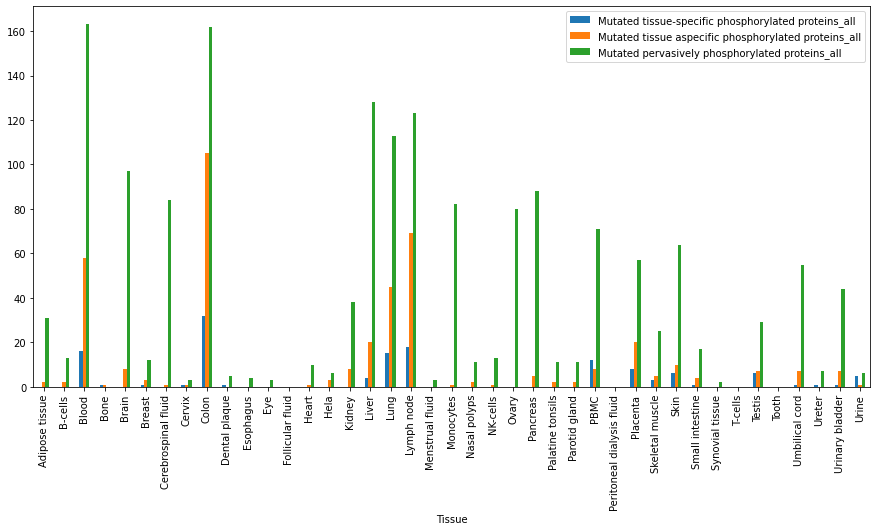

In [29]:
mut_prot_tissue = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
for tissue in list_tissues_STY:
    count_tspec = tspec_mut.loc[tspec_mut[tissue]==1, "ACC_ID"].nunique()
    count_taspec = taspec_mut.loc[taspec_mut[tissue]==1, "ACC_ID"].nunique()
    count_gen = gen_mut.loc[gen_mut[tissue]==1, "ACC_ID"].nunique()
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
mut_prot_tissue["Mutated tissue-specific phosphorylated proteins_all"] = list_tspec
mut_prot_tissue["Mutated tissue aspecific phosphorylated proteins_all"] = list_taspec
mut_prot_tissue["Mutated pervasively phosphorylated proteins_all"] = list_gen
mut_prot_tissue.plot(kind="bar", figsize=(15,7), x="Tissue")
#plt.savefig("Humsavar_abs_all_mutated_proteins.png", format="png", bbox_inches="tight")

In [30]:
prot_three_cat = pd.read_csv("number of three categories per tissue.tsv", sep="\t")
prot_three_cat.head()

,Tissue,number of tissue-specific proteins,number of non tissue-specific proteins,number of generally expressed proteins,Total
0,Adipose tissue,0,39,311,350
1,B-cells,4,27,202,233
2,Blood,241,966,1530,2737
3,Bone,1,1,9,11
4,Brain,19,56,951,1026


<AxesSubplot:title={'center':'Ratio mutated proteins'}, xlabel='Tissue'>

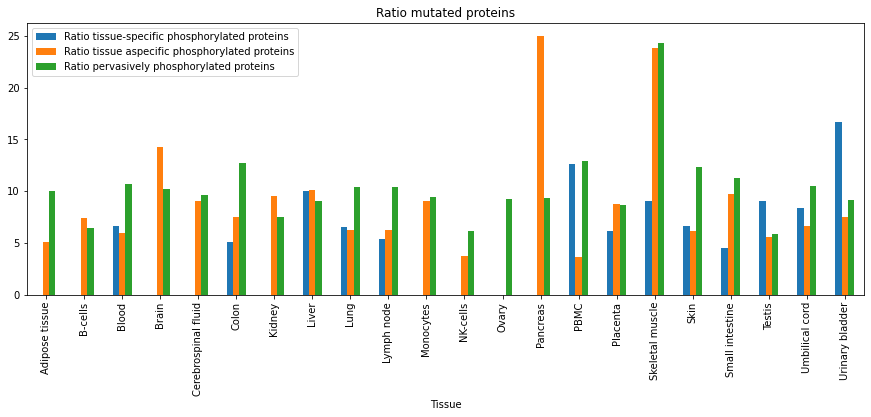

In [31]:
mut_prot_tissue_ratio = prot_three_cat.copy()
mut_prot_tissue_ratio["Ratio tissue-specific phosphorylated proteins"] = mut_prot_tissue["Mutated tissue-specific phosphorylated proteins_all"]*100/mut_prot_tissue_ratio["number of tissue-specific proteins"]
mut_prot_tissue_ratio["Ratio tissue aspecific phosphorylated proteins"] = mut_prot_tissue["Mutated tissue aspecific phosphorylated proteins_all"]*100/mut_prot_tissue_ratio["number of non tissue-specific proteins"]
mut_prot_tissue_ratio["Ratio pervasively phosphorylated proteins"] = mut_prot_tissue["Mutated pervasively phosphorylated proteins_all"]*100/mut_prot_tissue_ratio["number of generally expressed proteins"]
mut_prot_tissue_ratio[((mut_prot_tissue_ratio["number of tissue-specific proteins"]>=100)|
                     (mut_prot_tissue_ratio["number of non tissue-specific proteins"]>=100)|
                     (mut_prot_tissue_ratio["number of generally expressed proteins"]>=100))][["Tissue", "Ratio tissue-specific phosphorylated proteins",
                                                                                          "Ratio tissue aspecific phosphorylated proteins", 
                                                                                          "Ratio pervasively phosphorylated proteins"]].plot(kind="bar", figsize=(15,5), x="Tissue", title="Ratio mutated proteins")
#plt.savefig("Humsavar_ratio_all_mutated_proteins.png", format="png", bbox_inches="tight")

<AxesSubplot:xlabel='Tissue'>

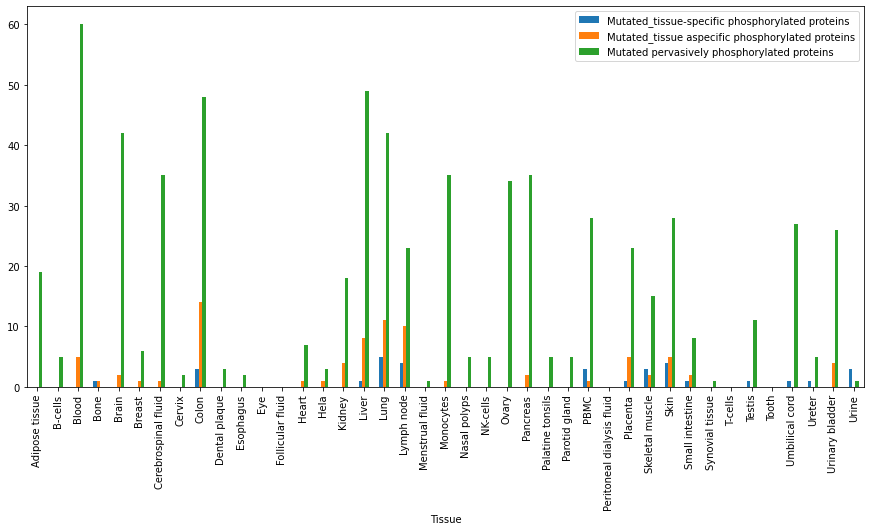

In [32]:
mut_prot_tissue_path = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
for tissue in list_tissues_STY:
    count_tspec = tspec_mut.loc[(tspec_mut[tissue]==1)&(tspec_mut["Variant category"]=="LP/P"), "ACC_ID"].nunique()
    count_taspec = taspec_mut.loc[(taspec_mut[tissue]==1)&(taspec_mut["Variant category"]=="LP/P"), "ACC_ID"].nunique()
    count_gen = gen_mut.loc[(gen_mut[tissue]==1)&(gen_mut["Variant category"]=="LP/P"), "ACC_ID"].nunique()
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
mut_prot_tissue_path["Mutated_tissue-specific phosphorylated proteins"] = list_tspec
mut_prot_tissue_path["Mutated_tissue aspecific phosphorylated proteins"] = list_taspec
mut_prot_tissue_path["Mutated pervasively phosphorylated proteins"] = list_gen
mut_prot_tissue_path.plot(kind="bar", figsize=(15,7), x="Tissue")

In [33]:
mut_prot_tissue_ratio_path = mut_prot_tissue[["Tissue", "Mutated tissue-specific phosphorylated proteins_all", "Mutated tissue aspecific phosphorylated proteins_all", "Mutated pervasively phosphorylated proteins_all"]].copy()
mut_prot_tissue_ratio_path["Ratio tissue-specific phosphorylated proteins (pathogenic mutation)"] = mut_prot_tissue_path["Mutated_tissue-specific phosphorylated proteins"]*100/mut_prot_tissue_ratio_path["Mutated tissue-specific phosphorylated proteins_all"]
mut_prot_tissue_ratio_path["Ratio tissue aspecific phosphorylated proteins (pathogenic mutation)"] = mut_prot_tissue_path["Mutated_tissue aspecific phosphorylated proteins"]*100/mut_prot_tissue_ratio_path["Mutated tissue aspecific phosphorylated proteins_all"]
mut_prot_tissue_ratio_path["Ratio pervasively phosphorylated proteins (pathogenic mutation)"] = mut_prot_tissue_path["Mutated pervasively phosphorylated proteins"]*100/mut_prot_tissue_ratio_path["Mutated pervasively phosphorylated proteins_all"]

In [34]:
print(mut_prot_tissue_ratio_path["Ratio tissue-specific phosphorylated proteins (pathogenic mutation)"].describe())
print(mut_prot_tissue_ratio_path["Ratio tissue aspecific phosphorylated proteins (pathogenic mutation)"].describe())
print(mut_prot_tissue_ratio_path["Ratio pervasively phosphorylated proteins (pathogenic mutation)"].describe())

count     19.000000
mean      40.566520
std       40.929541
min        0.000000
25%        4.687500
50%       25.000000
75%       83.333333
max      100.000000
Name: Ratio tissue-specific phosphorylated proteins (pathogenic mutation), dtype: float64
count     30.000000
mean      30.573358
std       33.327806
min        0.000000
25%        0.000000
50%       24.722222
75%       47.500000
max      100.000000
Name: Ratio tissue aspecific phosphorylated proteins (pathogenic mutation), dtype: float64
count    36.000000
mean     44.090533
std      14.255071
min       0.000000
25%      38.416466
50%      43.524485
75%      50.000000
max      71.428571
Name: Ratio pervasively phosphorylated proteins (pathogenic mutation), dtype: float64


In [35]:
whisker_tspec = 1.5*(83.33-4.68)
whisker_taspec = 1.5*(47.5)
whisker_gen = 1.5*(50-38.42)
print(whisker_tspec, whisker_taspec, whisker_gen)

117.97500000000001 71.25 17.369999999999997


<AxesSubplot:title={'center':'Ratio proteins having pathogenic mutation out of proteins having mutation'}, xlabel='Tissue'>

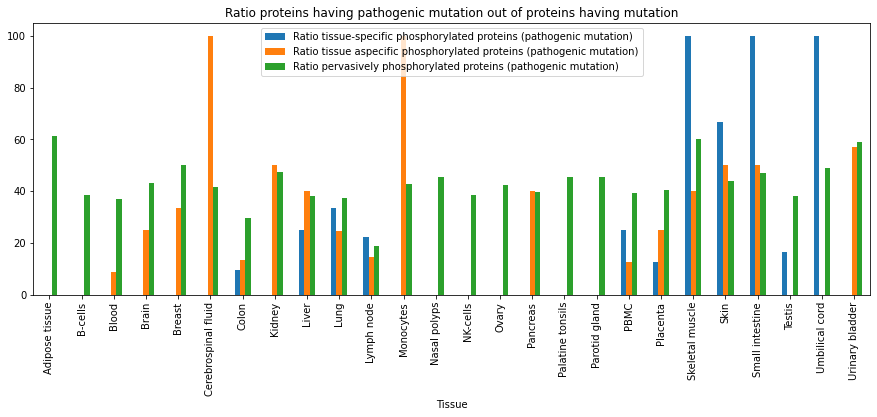

In [36]:
mut_prot_tissue_ratio_path[(((mut_prot_tissue_ratio_path["Ratio tissue-specific phosphorylated proteins (pathogenic mutation)"]>=whisker_tspec)&(mut_prot_tissue_ratio_path["Mutated tissue-specific phosphorylated proteins_all"]>10))|
                     ((mut_prot_tissue_ratio_path["Ratio tissue aspecific phosphorylated proteins (pathogenic mutation)"]>=whisker_taspec)&(mut_prot_tissue_ratio_path["Mutated tissue aspecific phosphorylated proteins_all"]>10))|
                     ((mut_prot_tissue_ratio_path["Ratio pervasively phosphorylated proteins (pathogenic mutation)"]>=whisker_gen)&(mut_prot_tissue_ratio_path["Mutated pervasively phosphorylated proteins_all"]>10)))][["Tissue", "Ratio tissue-specific phosphorylated proteins (pathogenic mutation)",
                                                                                          "Ratio tissue aspecific phosphorylated proteins (pathogenic mutation)", 
                                                                                          "Ratio pervasively phosphorylated proteins (pathogenic mutation)"]].plot(kind="bar", figsize=(15,5), x="Tissue", title="Ratio proteins having pathogenic mutation out of proteins having mutation")
#plt.savefig("Humsavar_ratio_pathmutated_proteins.png", format="png", bbox_inches="tight")

In [37]:
mut_prot_tissue_ratio_path

,Tissue,Mutated tissue-specific phosphorylated proteins_all,Mutated tissue aspecific phosphorylated proteins_all,Mutated pervasively phosphorylated proteins_all,Ratio tissue-specific phosphorylated proteins (pathogenic mutation),Ratio tissue aspecific phosphorylated proteins (pathogenic mutation),Ratio pervasively phosphorylated proteins (pathogenic mutation)
0,Adipose tissue,0,2,31,NaN,0.000000,61.290323
1,B-cells,0,2,13,NaN,0.000000,38.461538
2,Blood,16,58,163,0.000000,8.620690,36.809816
3,Bone,1,1,0,100.000000,100.000000,NaN
4,Brain,0,8,97,NaN,25.000000,43.298969
5,Breast,1,3,12,0.000000,33.333333,50.000000
6,Cerebrospinal fluid,0,1,84,NaN,100.000000,41.666667
7,Cervix,1,1,3,0.000000,0.000000,66.666667
8,Colon,32,105,162,9.375000,13.333333,29.629630
9,Dental plaque,1,0,5,0.000000,NaN,60.000000


<AxesSubplot:xlabel='Tissue'>

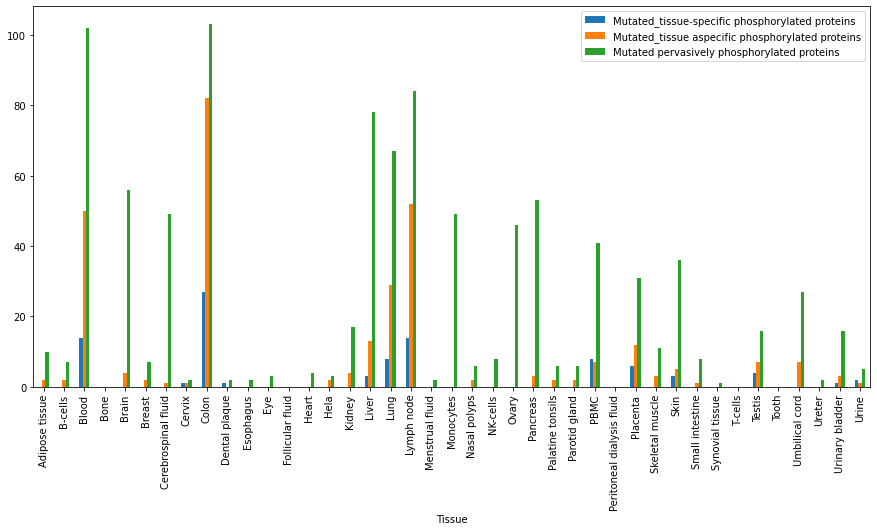

In [38]:
mut_prot_tissue_ben = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
for tissue in list_tissues_STY:
    count_tspec = tspec_mut.loc[(tspec_mut[tissue]==1)&(tspec_mut["Variant category"]=="LB/B"), "ACC_ID"].nunique()
    count_taspec = taspec_mut.loc[(taspec_mut[tissue]==1)&(taspec_mut["Variant category"]=="LB/B"), "ACC_ID"].nunique()
    count_gen = gen_mut.loc[(gen_mut[tissue]==1)&(gen_mut["Variant category"]=="LB/B"), "ACC_ID"].nunique()
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
mut_prot_tissue_ben["Mutated_tissue-specific phosphorylated proteins"] = list_tspec
mut_prot_tissue_ben["Mutated_tissue aspecific phosphorylated proteins"] = list_taspec
mut_prot_tissue_ben["Mutated pervasively phosphorylated proteins"] = list_gen
mut_prot_tissue_ben.plot(kind="bar", figsize=(15,7), x="Tissue")

In [39]:
mut_prot_tissue_ratio_ben = mut_prot_tissue[["Tissue", "Mutated tissue-specific phosphorylated proteins_all", "Mutated tissue aspecific phosphorylated proteins_all", "Mutated pervasively phosphorylated proteins_all"]].copy()
mut_prot_tissue_ratio_ben["Ratio tissue-specific phosphorylated proteins (benign mutation)"] = mut_prot_tissue_ben["Mutated_tissue-specific phosphorylated proteins"]*100/mut_prot_tissue_ratio_ben["Mutated tissue-specific phosphorylated proteins_all"]
mut_prot_tissue_ratio_ben["Ratio tissue aspecific phosphorylated proteins (benign mutation)"] = mut_prot_tissue_ben["Mutated_tissue aspecific phosphorylated proteins"]*100/mut_prot_tissue_ratio_ben["Mutated tissue aspecific phosphorylated proteins_all"]
mut_prot_tissue_ratio_ben["Ratio pervasively phosphorylated proteins (benign mutation)"] = mut_prot_tissue_ben["Mutated pervasively phosphorylated proteins"]*100/mut_prot_tissue_ratio_ben["Mutated pervasively phosphorylated proteins_all"]

In [40]:
print(mut_prot_tissue_ratio_ben["Ratio tissue-specific phosphorylated proteins (benign mutation)"].describe())
print(mut_prot_tissue_ratio_ben["Ratio tissue aspecific phosphorylated proteins (benign mutation)"].describe())
print(mut_prot_tissue_ratio_ben["Ratio pervasively phosphorylated proteins (benign mutation)"].describe())

count     19.000000
mean      51.385234
std       39.256778
min        0.000000
25%        0.000000
50%       66.666667
75%       81.076389
max      100.000000
Name: Ratio tissue-specific phosphorylated proteins (benign mutation), dtype: float64
count     30.000000
mean      66.259979
std       33.826836
min        0.000000
25%       50.000000
50%       66.666667
75%      100.000000
max      100.000000
Name: Ratio tissue aspecific phosphorylated proteins (benign mutation), dtype: float64
count     36.000000
mean      55.496760
std       13.098420
min       28.571429
25%       49.772727
50%       55.711207
75%       60.404830
max      100.000000
Name: Ratio pervasively phosphorylated proteins (benign mutation), dtype: float64


In [41]:
whisker_tspec = 1.5*(81.08)
whisker_taspec = 1.5*(100-50)
whisker_gen = 1.5*(60.4-49.77)
print(whisker_tspec, whisker_taspec, whisker_gen)

121.62 75.0 15.944999999999993


<AxesSubplot:title={'center':'Ratio proteins having benign mutation out of proteins having mutation'}, xlabel='Tissue'>

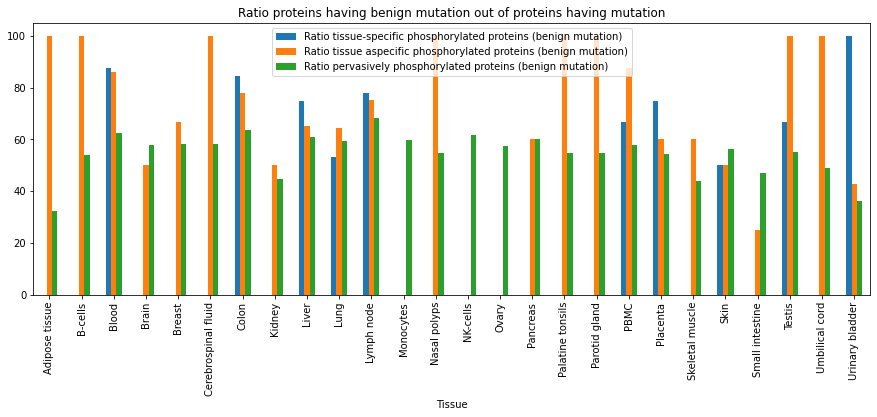

In [42]:
mut_prot_tissue_ratio_ben[(((mut_prot_tissue_ratio_ben["Ratio tissue-specific phosphorylated proteins (benign mutation)"]>=whisker_tspec)&(mut_prot_tissue_ratio_ben["Mutated tissue-specific phosphorylated proteins_all"]>10))|
                     ((mut_prot_tissue_ratio_ben["Ratio tissue aspecific phosphorylated proteins (benign mutation)"]>=whisker_taspec)&(mut_prot_tissue_ratio_ben["Mutated tissue aspecific phosphorylated proteins_all"]>10))|
                     ((mut_prot_tissue_ratio_ben["Ratio pervasively phosphorylated proteins (benign mutation)"]>=whisker_gen)&(mut_prot_tissue_ratio_ben["Mutated pervasively phosphorylated proteins_all"]>10)))][["Tissue", "Ratio tissue-specific phosphorylated proteins (benign mutation)",
                                                                                          "Ratio tissue aspecific phosphorylated proteins (benign mutation)", 
                                                                                          "Ratio pervasively phosphorylated proteins (benign mutation)"]].plot(kind="bar", figsize=(15,5), x="Tissue", title="Ratio proteins having benign mutation out of proteins having mutation")
#plt.savefig("Humsavar_ratio_ben_mutated_proteins.png", format="png", bbox_inches="tight")

<AxesSubplot:xlabel='Tissue'>

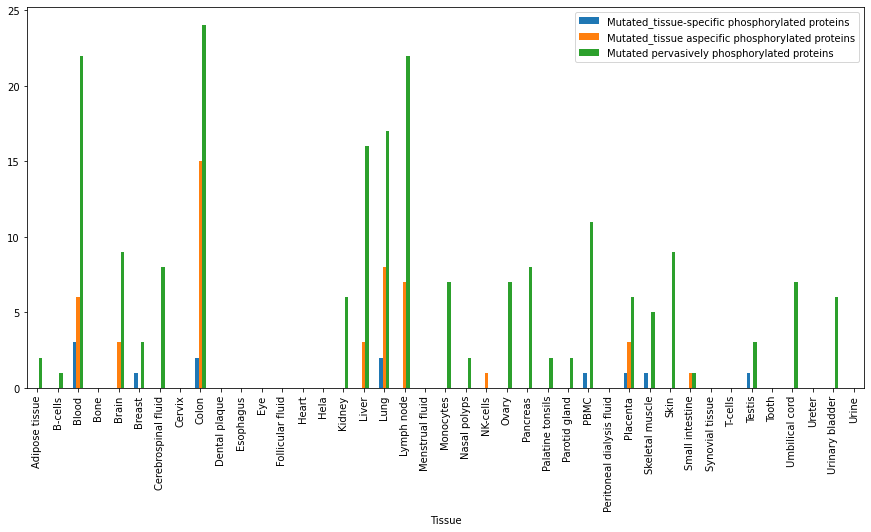

In [43]:
mut_prot_tissue_us = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
for tissue in list_tissues_STY:
    count_tspec = tspec_mut.loc[(tspec_mut[tissue]==1)&(tspec_mut["Variant category"]=="US"), "ACC_ID"].nunique()
    count_taspec = taspec_mut.loc[(taspec_mut[tissue]==1)&(taspec_mut["Variant category"]=="US"), "ACC_ID"].nunique()
    count_gen = gen_mut.loc[(gen_mut[tissue]==1)&(gen_mut["Variant category"]=="US"), "ACC_ID"].nunique()
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
mut_prot_tissue_us["Mutated_tissue-specific phosphorylated proteins"] = list_tspec
mut_prot_tissue_us["Mutated_tissue aspecific phosphorylated proteins"] = list_taspec
mut_prot_tissue_us["Mutated pervasively phosphorylated proteins"] = list_gen
mut_prot_tissue_us.plot(kind="bar", figsize=(15,7), x="Tissue")

In [44]:
mut_prot_tissue_ratio_us = mut_prot_tissue[["Tissue", "Mutated tissue-specific phosphorylated proteins_all", "Mutated tissue aspecific phosphorylated proteins_all", "Mutated pervasively phosphorylated proteins_all"]].copy()
mut_prot_tissue_ratio_us["Ratio tissue-specific phosphorylated proteins (unknown significance)"] = mut_prot_tissue_us["Mutated_tissue-specific phosphorylated proteins"]*100/mut_prot_tissue_ratio_us["Mutated tissue-specific phosphorylated proteins_all"]
mut_prot_tissue_ratio_us["Ratio tissue aspecific phosphorylated proteins (unknown significance)"] = mut_prot_tissue_us["Mutated_tissue aspecific phosphorylated proteins"]*100/mut_prot_tissue_ratio_us["Mutated tissue aspecific phosphorylated proteins_all"]
mut_prot_tissue_ratio_us["Ratio pervasively phosphorylated proteins (unknown significance)"] = mut_prot_tissue_us["Mutated pervasively phosphorylated proteins"]*100/mut_prot_tissue_ratio_us["Mutated pervasively phosphorylated proteins_all"]

In [45]:
print(mut_prot_tissue_ratio_us["Ratio tissue-specific phosphorylated proteins (unknown significance)"].describe())
print(mut_prot_tissue_ratio_us["Ratio tissue aspecific phosphorylated proteins (unknown significance)"].describe())
print(mut_prot_tissue_ratio_us["Ratio pervasively phosphorylated proteins (unknown significance)"].describe())

count     19.000000
mean      11.008772
std       23.428755
min        0.000000
25%        0.000000
50%        0.000000
75%       12.916667
max      100.000000
Name: Ratio tissue-specific phosphorylated proteins (unknown significance), dtype: float64
count     30.000000
mean       8.168442
std       19.660579
min        0.000000
25%        0.000000
50%        0.000000
75%       10.294853
max      100.000000
Name: Ratio tissue aspecific phosphorylated proteins (unknown significance), dtype: float64
count    36.000000
mean      9.196480
std       7.315896
min       0.000000
25%       0.000000
50%       9.401080
75%      14.872173
max      25.000000
Name: Ratio pervasively phosphorylated proteins (unknown significance), dtype: float64


In [46]:
whisker_tspec = 1.5*(12.91)
whisker_taspec = 1.5*(10.29)
whisker_gen = 1.5*(14.87)
print(whisker_tspec, whisker_taspec, whisker_gen)

19.365000000000002 15.434999999999999 22.305


<AxesSubplot:title={'center':'Ratio proteins having unknown significance out of proteins having mutation'}, xlabel='Tissue'>

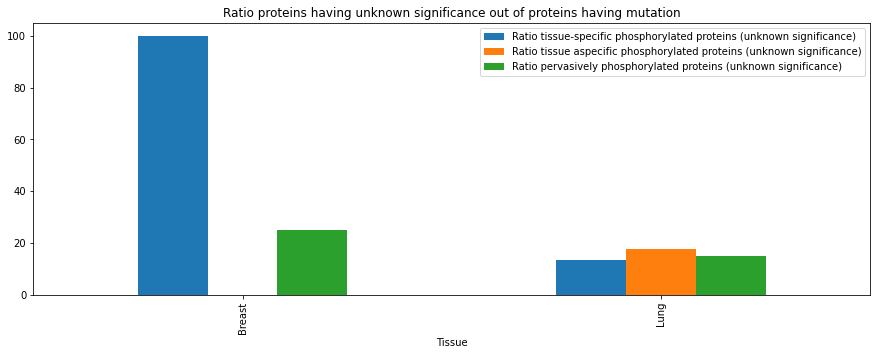

In [47]:
mut_prot_tissue_ratio_us[(((mut_prot_tissue_ratio_us["Ratio tissue-specific phosphorylated proteins (unknown significance)"]>=whisker_tspec)&(mut_prot_tissue_ratio_us["Mutated tissue-specific phosphorylated proteins_all"]>10))|
                     ((mut_prot_tissue_ratio_us["Ratio tissue aspecific phosphorylated proteins (unknown significance)"]>=whisker_taspec)&(mut_prot_tissue_ratio_us["Mutated tissue aspecific phosphorylated proteins_all"]>10))|
                     ((mut_prot_tissue_ratio_us["Ratio pervasively phosphorylated proteins (unknown significance)"]>=whisker_gen)&(mut_prot_tissue_ratio_us["Mutated pervasively phosphorylated proteins_all"]>10)))][["Tissue", "Ratio tissue-specific phosphorylated proteins (unknown significance)",
                                                                                          "Ratio tissue aspecific phosphorylated proteins (unknown significance)", 
                                                                                          "Ratio pervasively phosphorylated proteins (unknown significance)"]].plot(kind="bar", figsize=(15,5), x="Tissue", title="Ratio proteins having unknown significance out of proteins having mutation")
#plt.savefig("Humsavar_ratio_us_mutated_proteins.png", format="png", bbox_inches="tight")

In [48]:
mut_prot_tissue_ratio_us

,Tissue,Mutated tissue-specific phosphorylated proteins_all,Mutated tissue aspecific phosphorylated proteins_all,Mutated pervasively phosphorylated proteins_all,Ratio tissue-specific phosphorylated proteins (unknown significance),Ratio tissue aspecific phosphorylated proteins (unknown significance),Ratio pervasively phosphorylated proteins (unknown significance)
0,Adipose tissue,0,2,31,NaN,0.000000,6.451613
1,B-cells,0,2,13,NaN,0.000000,7.692308
2,Blood,16,58,163,18.750000,10.344828,13.496933
3,Bone,1,1,0,0.000000,0.000000,NaN
4,Brain,0,8,97,NaN,37.500000,9.278351
5,Breast,1,3,12,100.000000,0.000000,25.000000
6,Cerebrospinal fluid,0,1,84,NaN,0.000000,9.523810
7,Cervix,1,1,3,0.000000,0.000000,0.000000
8,Colon,32,105,162,6.250000,14.285714,14.814815
9,Dental plaque,1,0,5,0.000000,NaN,0.000000


In [49]:
tspec_mut["Disease name"].value_counts()

-                                                                                   118
Amyotrophic lateral sclerosis 1 (ALS1) [MIM:105400]                                  11
Ornithine carbamoyltransferase deficiency (OTCD) [MIM:311250]                         8
Phenylketonuria (PKU) [MIM:261600]                                                    7
Tubulointerstitial kidney disease, autosomal dominant, 1 (ADTKD1) [MIM:162000]        6
Mowat-Wilson syndrome (MOWS) [MIM:235730]                                             3
Hypophosphatasia (HOPS) [MIM:146300]                                                  3
Arthrogryposis, distal, 1C (DA1C) [MIM:619110]                                        3
Diabetes insipidus, nephrogenic, autosomal (ANDI) [MIM:125800]                        3
A breast cancer sample                                                                3
Diamond-Blackfan anemia 1 (DBA1) [MIM:105650]                                         3
A hepatocellular carcinoma sampl

In [50]:
taspec_mut["Disease name"].value_counts()

-                                                                                     282
A sporadic cancer                                                                      72
Amyloidosis, transthyretin-related (AMYL-TTR) [MIM:105210]                             64
Sporadic cancers                                                                       38
Neutropenia, severe congenital 1, autosomal dominant (SCN1) [MIM:202700]               35
                                                                                     ... 
Breast cancer (BC) [MIM:114480]                                                         1
Breast-ovarian cancer, familial, 1 (BROVCA1) [MIM:604370]                               1
Anemia, sideroblastic, 4 (SIDBA4) [MIM:182170]                                          1
Epilepsy, idiopathic generalized 8 (EIG8) [MIM:612899]                                  1
Rajab interstitial lung disease with brain calcifications 2 (RILDBC2) [MIM:619013]      1
Name: Dise

In [51]:
gen_mut["Disease name"].value_counts()

-                                                                                    826
Nemaline myopathy 3 (NEM3) [MIM:161800]                                               51
Noonan syndrome 5 (NS5) [MIM:611553]                                                  31
Emery-Dreifuss muscular dystrophy 2, autosomal dominant (EDMD2) [MIM:181350]          29
Cardiomyopathy, familial hypertrophic 1 (CMH1) [MIM:192600]                           18
                                                                                    ... 
Megalencephaly-capillary malformation-polymicrogyria syndrome (MCAP) [MIM:602501]      1
Immunodeficiency 31B (IMD31B) [MIM:613796]                                             1
Diabetes mellitus, non-insulin-dependent (NIDDM) [MIM:125853]                          1
Neurodegeneration with ataxia and late-onset optic atrophy (NDAXOA) [MIM:619259]       1
Cardiac valvular dysplasia, X-linked (CVD1) [MIM:314400]                               1
Name: Disease name, L

# Frequency of mutation - P-site level

In [52]:
tspec_sites = pd.read_csv("1.2 tissue-specific sites.tsv", sep="\t")
taspec_sites = pd.read_csv("1.2 non tissue-specific sites.tsv", sep="\t")
gen_sites = pd.read_csv("1.2 general P sites.tsv", sep="\t")

In [53]:
tspec_sites_mut1 = pd.merge(tspec_sites[["ACC_ID", "UP_POS"]], mutated_sites, how="inner", on=["ACC_ID", "UP_POS"])
print(tspec_sites_mut1.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"}).shape[0])
print(tspec_sites_mut1["ACC_ID"].nunique())

82
69


In [54]:
taspec_sites_mut1 = pd.merge(taspec_sites[["ACC_ID", "UP_POS"]], mutated_sites, how="inner", on=["ACC_ID", "UP_POS"])
print(taspec_sites_mut1.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"}).shape[0])
print(taspec_sites_mut1["ACC_ID"].nunique())

34
31


In [55]:
perv_sites_mut1 = pd.merge(gen_sites[["ACC_ID", "UP_POS"]], mutated_sites, how="inner", on=["ACC_ID", "UP_POS"])
print(perv_sites_mut1.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"}).shape[0])
print(perv_sites_mut1["ACC_ID"].nunique())

34
26


In [56]:
tspec_site_mut = pd.merge(tspec_sites[["ACC_ID", "UP_POS"]], data_mut5, how = "inner", on=["ACC_ID", "UP_POS"])
tspec_site_mut

,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Pos_plus4,Pos_plus5,Main gene name,FTId,AA change,Variant category,dbSNP,Disease name,Annotation,distance
0,A1L390,1037,Colon,S,0,0,0,0,0,0,...,1041,1042,PLEKHG3,VAR_035330,p.Arg1036Trp,LB/B,rs229649,-,(likely) Benign,-1
1,A1L390,1040,Colon,S,0,0,0,0,0,0,...,1044,1045,PLEKHG3,VAR_035330,p.Arg1036Trp,LB/B,rs229649,-,(likely) Benign,-4
2,A6NER3,10,"Lung,Lung,Lung",Y,0,0,0,0,0,0,...,14,15,GAGE12J,VAR_037385,p.Tyr9Cys,LB/B,rs7064096,-,(likely) Benign,-1
3,A6NER3,10,"Lung,Lung,Lung",Y,0,0,0,0,0,0,...,14,15,GAGE12J,VAR_037386,p.Arg13Ser,LB/B,rs7064105,-,(likely) Benign,3
4,B2RTY4,1364,Colon,S,0,0,0,0,0,0,...,1368,1369,MYO9A,VAR_046172,p.Ser1362Pro,LB/B,rs55738821,-,(likely) Benign,-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,Q9Y4K4,333,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colon",T,0,0,0,0,0,0,...,337,338,MAP4K5,VAR_040747,p.Ala334Thr,LB/B,rs12881869,-,(likely) Benign,1
1257,Q9Y4U1,275,"Colon,Colon,Colon,Colon",S,0,0,0,0,0,0,...,279,280,MMACHC,VAR_038805,p.Ser271Gly,LB/B,rs35219601,-,(likely) Benign,-4
1258,Q9Y618,2005,Colon,S,0,0,0,0,0,0,...,2009,2010,NCOR2,VAR_060074,p.Pro2001Ser,LB/B,rs2230944,-,(likely) Benign,-4
1259,Q9Y6H5,239,"Blood,Blood",S,0,0,1,0,0,0,...,243,244,SNCAIP,VAR_048312,p.Glu235Gly,LB/B,rs6867105,-,(likely) Benign,-4


In [57]:
taspec_site_mut = pd.merge(taspec_sites[["ACC_ID", "UP_POS"]], data_mut5, how = "inner", on=["ACC_ID", "UP_POS"])
taspec_site_mut

,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Pos_plus4,Pos_plus5,Main gene name,FTId,AA change,Variant category,dbSNP,Disease name,Annotation,distance
0,A0M8Q6,31,"Nasal polyps, Palatine tonsils, Parotid gland,...",S,0,0,0,0,0,0,...,35,36,IGLC7,VAR_077896,p.Asn34Tyr,LB/B,-,-,(likely) Benign,3
1,O00418,18,"Blood,Lymph node,Lymph node,Lymph node",S,0,0,1,0,0,0,...,22,23,EEF2K,VAR_033915,p.His23Arg,LB/B,rs9935059,-,(likely) Benign,5
2,O14558,16,"Adipose tissue, Umbilical cord",S,1,0,0,0,0,0,...,20,21,HSPB6,VAR_077818,p.Pro20Leu,LB/B,rs11549029,-,(likely) Benign,4
3,O14639,429,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Lymp...",T,0,0,0,0,0,0,...,433,434,ABLIM1,VAR_050141,p.Pro434Thr,LB/B,rs11593544,-,(likely) Benign,5
4,O14681,317,"Placenta,Lymph node",S,0,0,0,0,0,0,...,321,322,EI24,VAR_065464,p.Thr319Ala,US,rs375652371,Some patients with early onset breast cancer,Unknown significance,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,Q9UNF1,190,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,0,0,0,0,...,194,195,MAGED2,VAR_053508,p.Glu187Asp,LB/B,rs12014977,-,(likely) Benign,-3
605,Q9UNF1,191,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,0,0,0,0,...,195,196,MAGED2,VAR_053508,p.Glu187Asp,LB/B,rs12014977,-,(likely) Benign,-4
606,Q9UPN4,47,"Blood,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,1,0,0,0,...,51,52,CEP131,VAR_056740,p.Val43Ile,LB/B,rs8067409,-,(likely) Benign,-4
607,Q9Y4K4,335,"Colon,Colon,Colon,Colon,Colon,Colon,Colon,Colo...",S,0,0,0,0,0,0,...,339,340,MAP4K5,VAR_040747,p.Ala334Thr,LB/B,rs12881869,-,(likely) Benign,-1


In [58]:
gen_site_mut = pd.merge(gen_sites[["ACC_ID", "UP_POS"]], data_mut5, how = "inner", on=["ACC_ID", "UP_POS"])
gen_site_mut

,ACC_ID,UP_POS,tissue,modres,Adipose tissue,B-cells,Blood,Bone,Brain,Breast,...,Pos_plus4,Pos_plus5,Main gene name,FTId,AA change,Variant category,dbSNP,Disease name,Annotation,distance
0,O14523,411,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",S,0,0,1,0,1,0,...,415,416,C2CD2L,VAR_028797,p.Arg413Trp,LB/B,rs2239896,-,(likely) Benign,2
1,O14523,417,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",T,0,0,1,0,1,0,...,421,422,C2CD2L,VAR_028797,p.Arg413Trp,LB/B,rs2239896,-,(likely) Benign,-4
2,O14639,431,"Liver,Liver,Liver,PBMC,PBMC,PBMC,PBMC,PBMC,PBM...",S,0,1,1,0,1,0,...,435,436,ABLIM1,VAR_050141,p.Pro434Thr,LB/B,rs11593544,-,(likely) Benign,3
3,O14639,433,"Liver,Liver,PBMC,PBMC,PBMC,PBMC,PBMC,Pancreas,...",T,0,0,1,0,1,0,...,437,438,ABLIM1,VAR_050141,p.Pro434Thr,LB/B,rs11593544,-,(likely) Benign,1
4,O14994,470,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",S,0,0,1,0,1,0,...,474,475,SYN3,VAR_068906,p.Ser470Asn,LB/B,rs5998526,-,(likely) Benign,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,Q9UQB3,457,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",T,0,0,1,0,1,0,...,461,462,CTNND2,VAR_073391,p.Arg454His,LP/P,rs750266236,-,(likely) Pathogenic,-3
455,Q9UQB3,460,"Brain,Brain,Blood, Cerebrospinal fluid, Liver,...",S,0,0,1,0,1,0,...,464,465,CTNND2,VAR_073392,p.Asp465Asn,LB/B,rs200377770,-,(likely) Benign,5
456,Q9UQM7,234,"Blood, Cerebrospinal fluid, Liver, Ovary, Panc...",S,0,0,1,0,1,0,...,238,239,CAMK2A,VAR_080585,p.Pro235Leu,US,rs864309606,"Mental retardation, autosomal dominant 53 (MRD...",Unknown significance,1
457,Q9Y463,273,"Blood,Blood,Lung,Lung,Lung,Lung,Lung,Lung,Lung...",Y,0,0,1,0,1,0,...,277,278,DYRK1B,VAR_040457,p.Gln275Arg,US,-,A metastatic melanoma sample,Unknown significance,2


In [59]:
print(tspec_site_mut["ACC_ID"].nunique())
print(tspec_site_mut.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"}).shape[0])
print(taspec_site_mut["ACC_ID"].nunique())
print(taspec_site_mut.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"}).shape[0])
print(gen_site_mut["ACC_ID"].nunique())
print(gen_site_mut.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"}).shape[0])

516
775
234
344
120
226


<AxesSubplot:xlabel='Tissue'>

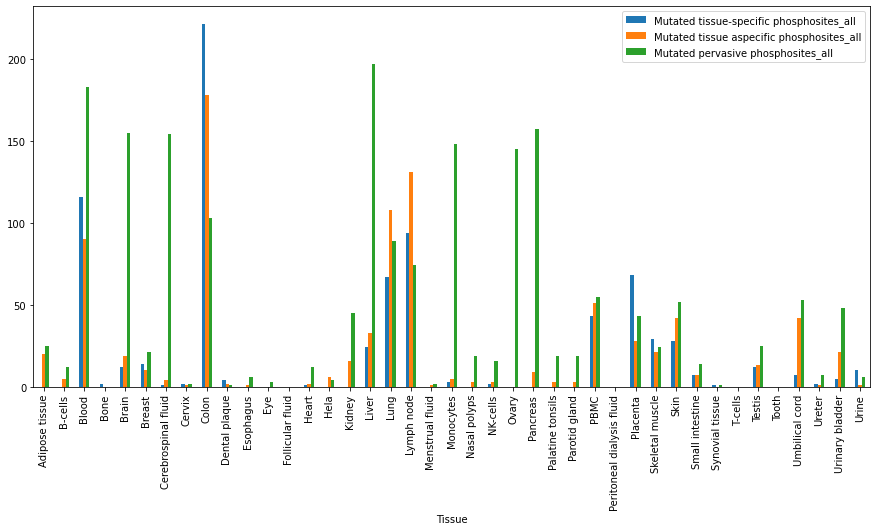

In [60]:
mut_sites_tissue = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
for tissue in list_tissues_STY:
    tspec_mut_tissue = tspec_site_mut.loc[tspec_site_mut[tissue]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"})
    taspec_mut_tissue = taspec_site_mut.loc[taspec_site_mut[tissue]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"})
    gen_mut_tissue = gen_site_mut.loc[gen_site_mut[tissue]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"})
    count_tspec = tspec_mut_tissue.shape[0]
    count_taspec = taspec_mut_tissue.shape[0]
    count_gen = gen_mut_tissue.shape[0]
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
mut_sites_tissue["Mutated tissue-specific phosphosites_all"] = list_tspec
mut_sites_tissue["Mutated tissue aspecific phosphosites_all"] = list_taspec
mut_sites_tissue["Mutated pervasive phosphosites_all"] = list_gen
mut_sites_tissue.plot(kind="bar", figsize=(15,7), x="Tissue")
#plt.savefig("Humsavar_abs_all_mutated_sites.png", format="png", bbox_inches="tight")

In [61]:
mut_sites_tissue

,Tissue,Mutated tissue-specific phosphosites_all,Mutated tissue aspecific phosphosites_all,Mutated pervasive phosphosites_all
0,Adipose tissue,0,20,25
1,B-cells,0,5,12
2,Blood,116,90,183
3,Bone,2,0,0
4,Brain,12,19,155
5,Breast,14,10,21
6,Cerebrospinal fluid,1,4,154
7,Cervix,2,1,2
8,Colon,221,178,103
9,Dental plaque,4,2,1


In [62]:
sites_three_cat = pd.read_csv("number of three categories per tissue_sites.tsv", sep="\t")
sites_three_cat.head()

,Tissue,number of tissue-specific sites,number of non tissue-specific sites,number of generally expressed sites,Total
0,Adipose tissue,0,221,390,611
1,B-cells,16,95,250,361
2,Blood,1642,2466,2961,7069
3,Bone,2,2,9,13
4,Brain,121,176,2307,2604


In [63]:
print(humsavar.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"}).shape[0])
print(humsavar[humsavar["Variant category"]=="LP/P"].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"}).shape[0])
print(humsavar[humsavar["Variant category"]=="LB/B"].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"}).shape[0])
print(humsavar[humsavar["Variant category"]=="US"].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"}).shape[0])

73256
27084
38835
8043


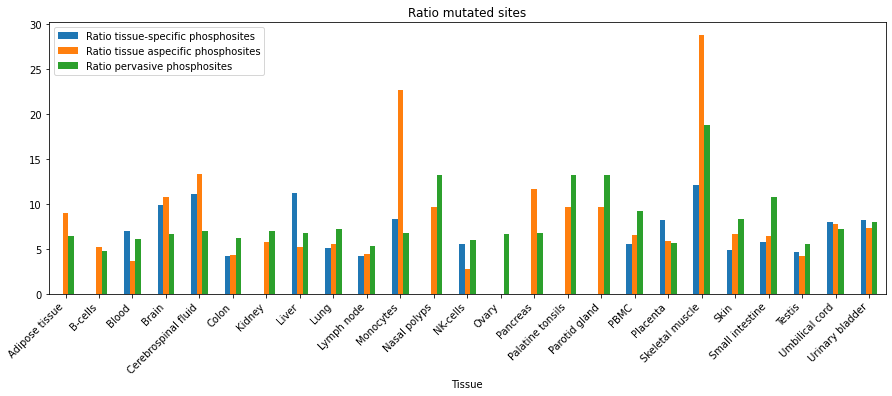

In [67]:
mut_sites_tissue_ratio = sites_three_cat.copy()
mut_sites_tissue_ratio["Ratio tissue-specific phosphosites"] = mut_sites_tissue["Mutated tissue-specific phosphosites_all"]*100/mut_sites_tissue_ratio["number of tissue-specific sites"]
mut_sites_tissue_ratio["Ratio tissue aspecific phosphosites"] = mut_sites_tissue["Mutated tissue aspecific phosphosites_all"]*100/mut_sites_tissue_ratio["number of non tissue-specific sites"]
mut_sites_tissue_ratio["Ratio pervasive phosphosites"] = mut_sites_tissue["Mutated pervasive phosphosites_all"]*100/mut_sites_tissue_ratio["number of generally expressed sites"]
mut_sites_tissue_ratio[((mut_sites_tissue_ratio["number of tissue-specific sites"]>=100)|
                     (mut_sites_tissue_ratio["number of non tissue-specific sites"]>=100)|
                     (mut_sites_tissue_ratio["number of generally expressed sites"]>=100))][["Tissue", "Ratio tissue-specific phosphosites",
                                                                                          "Ratio tissue aspecific phosphosites", 
                                                                                          "Ratio pervasive phosphosites"]].plot(kind="bar", figsize=(15,5), x="Tissue", title="Ratio mutated sites")
plt.xticks(rotation=45, ha="right")
#plt.savefig("Humsavar_ratio_mutated_sites.png", format="png", bbox_inches="tight")
plt.show()

<AxesSubplot:title={'center':'Ratio mutated sites'}, xlabel='Tissue'>

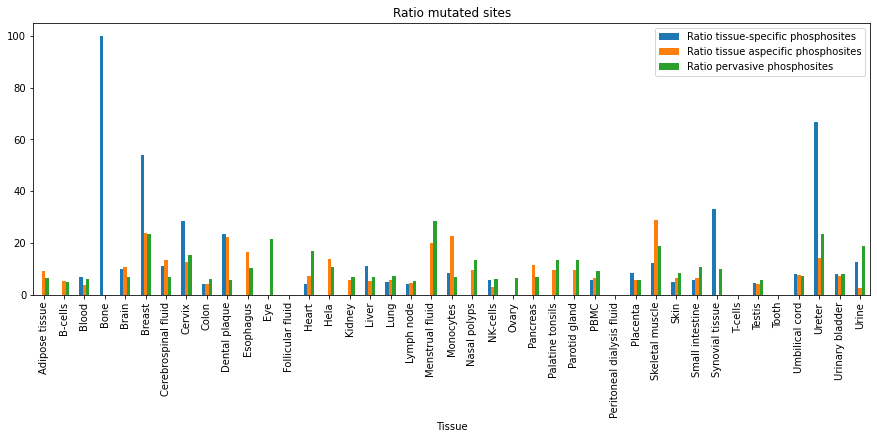

In [65]:
mut_sites_tissue_ratio = sites_three_cat.copy()
mut_sites_tissue_ratio["Ratio tissue-specific phosphosites"] = mut_sites_tissue["Mutated tissue-specific phosphosites_all"]*100/mut_sites_tissue_ratio["number of tissue-specific sites"]
mut_sites_tissue_ratio["Ratio tissue aspecific phosphosites"] = mut_sites_tissue["Mutated tissue aspecific phosphosites_all"]*100/mut_sites_tissue_ratio["number of non tissue-specific sites"]
mut_sites_tissue_ratio["Ratio pervasive phosphosites"] = mut_sites_tissue["Mutated pervasive phosphosites_all"]*100/mut_sites_tissue_ratio["number of generally expressed sites"]
mut_sites_tissue_ratio[["Tissue", "Ratio tissue-specific phosphosites",
                                                                                          "Ratio tissue aspecific phosphosites", 
                                                                                          "Ratio pervasive phosphosites"]].plot(kind="bar", figsize=(15,5), x="Tissue", title="Ratio mutated sites")
#plt.savefig("Humsavar_ratio_mutated_sites_nonfiltered.png", format="png", bbox_inches="tight")

In [66]:
mut_sites_tissue_ratio

,Tissue,number of tissue-specific sites,number of non tissue-specific sites,number of generally expressed sites,Total,Ratio tissue-specific phosphosites,Ratio tissue aspecific phosphosites,Ratio pervasive phosphosites
0,Adipose tissue,0,221,390,611,NaN,9.049774,6.410256
1,B-cells,16,95,250,361,0.000000,5.263158,4.800000
2,Blood,1642,2466,2961,7069,7.064555,3.649635,6.180344
3,Bone,2,2,9,13,100.000000,0.000000,0.000000
4,Brain,121,176,2307,2604,9.917355,10.795455,6.718682
5,Breast,26,42,89,157,53.846154,23.809524,23.595506
6,Cerebrospinal fluid,9,30,2203,2242,11.111111,13.333333,6.990468
7,Cervix,7,8,13,28,28.571429,12.500000,15.384615
8,Colon,5252,4089,1651,10992,4.207921,4.353143,6.238643
9,Dental plaque,17,9,18,44,23.529412,22.222222,5.555556


<AxesSubplot:xlabel='Tissue'>

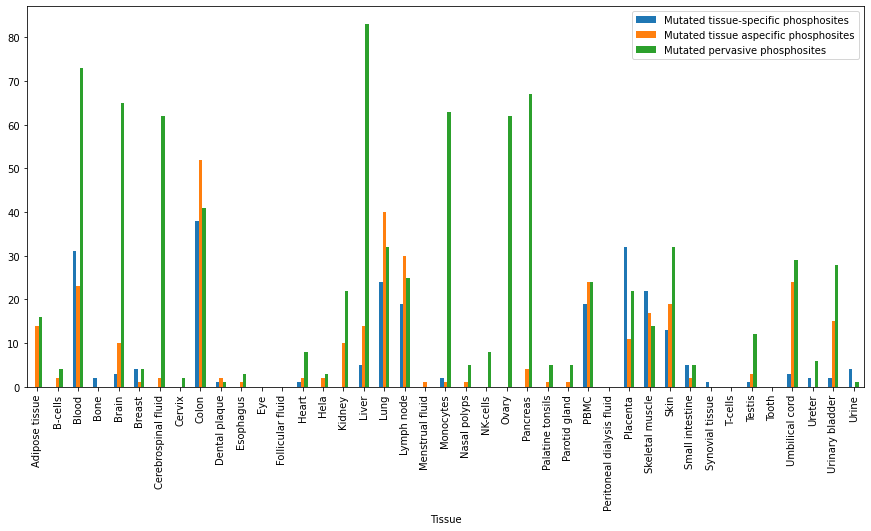

In [67]:
mut_sites_tissue_path = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
for tissue in list_tissues_STY:
    tspec_mut_tissue = tspec_site_mut.loc[(tspec_site_mut[tissue]==1)&(tspec_site_mut["Variant category"]=="LP/P"), :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"})
    taspec_mut_tissue = taspec_site_mut.loc[(taspec_site_mut[tissue]==1)&(taspec_site_mut["Variant category"]=="LP/P"), :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"})
    gen_mut_tissue = gen_site_mut.loc[(gen_site_mut[tissue]==1)&(gen_site_mut["Variant category"]=="LP/P"), :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"})
    count_tspec = tspec_mut_tissue.shape[0]
    count_taspec = taspec_mut_tissue.shape[0]
    count_gen = gen_mut_tissue.shape[0]
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
mut_sites_tissue_path["Mutated tissue-specific phosphosites"] = list_tspec
mut_sites_tissue_path["Mutated tissue aspecific phosphosites"] = list_taspec
mut_sites_tissue_path["Mutated pervasive phosphosites"] = list_gen
mut_sites_tissue_path.plot(kind="bar", figsize=(15,7), x="Tissue")

In [68]:
mut_sites_tissue_ratio_path = mut_sites_tissue[["Tissue", "Mutated tissue-specific phosphosites_all", "Mutated tissue aspecific phosphosites_all", "Mutated pervasive phosphosites_all"]].copy()
mut_sites_tissue_ratio_path["Ratio tissue-specific phosphosites (pathogenic mutation)"] = mut_sites_tissue_path["Mutated tissue-specific phosphosites"]*100/mut_sites_tissue_ratio_path["Mutated tissue-specific phosphosites_all"]
mut_sites_tissue_ratio_path["Ratio tissue aspecific phosphosites (pathogenic mutation)"] = mut_sites_tissue_path["Mutated tissue aspecific phosphosites"]*100/mut_sites_tissue_ratio_path["Mutated tissue aspecific phosphosites_all"]
mut_sites_tissue_ratio_path["Ratio pervasive phosphosites (pathogenic mutation)"] = mut_sites_tissue_path["Mutated pervasive phosphosites"]*100/mut_sites_tissue_ratio_path["Mutated pervasive phosphosites_all"]

In [69]:
print(mut_sites_tissue_ratio_path["Ratio tissue-specific phosphosites (pathogenic mutation)"].describe())
print(mut_sites_tissue_ratio_path["Ratio tissue aspecific phosphosites (pathogenic mutation)"].describe())
print(mut_sites_tissue_ratio_path["Ratio pervasive phosphosites (pathogenic mutation)"].describe())

count     25.000000
mean      43.287134
std       32.331454
min        0.000000
25%       20.833333
50%       40.000000
75%       66.666667
max      100.000000
Name: Ratio tissue-specific phosphosites (pathogenic mutation), dtype: float64
count     33.000000
mean      43.418037
std       29.402029
min        0.000000
25%       25.555556
50%       39.285714
75%       57.142857
max      100.000000
Name: Ratio tissue aspecific phosphosites (pathogenic mutation), dtype: float64
count     36.000000
mean      44.485120
std       23.545750
min        0.000000
25%       33.671171
50%       42.621363
75%       55.621069
max      100.000000
Name: Ratio pervasive phosphosites (pathogenic mutation), dtype: float64


In [70]:
whisker_tspec = 1.5*(66.67-20.83)
whisker_taspec = 1.5*(57.14-25.56)
whisker_gen = 1.5*(55.62-33.67)
print(whisker_tspec, whisker_taspec, whisker_gen)

68.76 47.370000000000005 32.925


<AxesSubplot:title={'center':'Ratio sites having pathogenic mutation out of sites having mutation'}, xlabel='Tissue'>

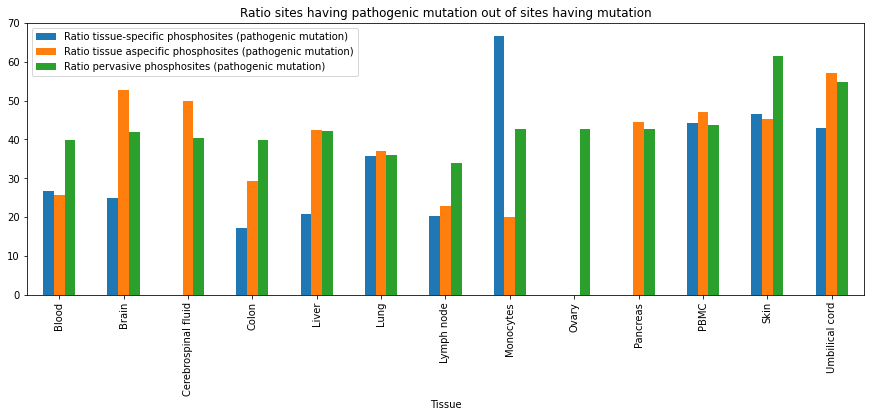

In [71]:
mut_sites_tissue_ratio_path[(((mut_sites_tissue_ratio_path["Ratio tissue-specific phosphosites (pathogenic mutation)"]>=whisker_tspec)&(mut_sites_tissue_ratio_path["Mutated tissue-specific phosphosites_all"]>50))|
                     ((mut_sites_tissue_ratio_path["Ratio tissue aspecific phosphosites (pathogenic mutation)"]>=whisker_taspec)&(mut_sites_tissue_ratio_path["Mutated tissue aspecific phosphosites_all"]>50))|
                     ((mut_sites_tissue_ratio_path["Ratio pervasive phosphosites (pathogenic mutation)"]>=whisker_gen)&(mut_sites_tissue_ratio_path["Mutated pervasive phosphosites_all"]>50)))][["Tissue", "Ratio tissue-specific phosphosites (pathogenic mutation)",
                                                                                          "Ratio tissue aspecific phosphosites (pathogenic mutation)", 
                                                                                          "Ratio pervasive phosphosites (pathogenic mutation)"]].plot(kind="bar", figsize=(15,5), x="Tissue", title="Ratio sites having pathogenic mutation out of sites having mutation")
#plt.savefig("Humsavar_ratio_pathmutated_siteseins.png", format="png", bbox_inches="tight")

In [72]:
mut_sites_tissue_ratio_path[(mut_sites_tissue_ratio_path["Tissue"]=="Monocytes")|
                           (mut_sites_tissue_ratio_path["Tissue"]=="Skin")|
                           (mut_sites_tissue_ratio_path["Tissue"]=="Umbilical cord")]

,Tissue,Mutated tissue-specific phosphosites_all,Mutated tissue aspecific phosphosites_all,Mutated pervasive phosphosites_all,Ratio tissue-specific phosphosites (pathogenic mutation),Ratio tissue aspecific phosphosites (pathogenic mutation),Ratio pervasive phosphosites (pathogenic mutation)
20,Monocytes,3,5,148,66.666667,20.000000,42.567568
31,Skin,28,42,52,46.428571,45.238095,61.538462
37,Umbilical cord,7,42,53,42.857143,57.142857,54.716981


<AxesSubplot:xlabel='Tissue'>

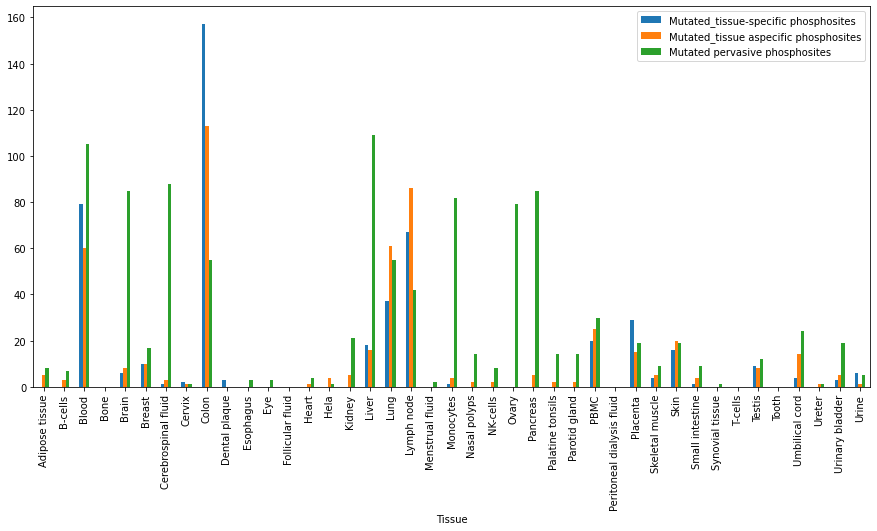

In [73]:
mut_sites_tissue_ben = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
for tissue in list_tissues_STY:
    tspec_mut_tissue = tspec_site_mut.loc[(tspec_site_mut[tissue]==1)&(tspec_site_mut["Variant category"]=="LB/B"), :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"})
    taspec_mut_tissue = taspec_site_mut.loc[(taspec_site_mut[tissue]==1)&(taspec_site_mut["Variant category"]=="LB/B"), :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"})
    gen_mut_tissue = gen_site_mut.loc[(gen_site_mut[tissue]==1)&(gen_site_mut["Variant category"]=="LB/B"), :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"})
    count_tspec = tspec_mut_tissue.shape[0]
    count_taspec = taspec_mut_tissue.shape[0]
    count_gen = gen_mut_tissue.shape[0]
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
mut_sites_tissue_ben["Mutated_tissue-specific phosphosites"] = list_tspec
mut_sites_tissue_ben["Mutated_tissue aspecific phosphosites"] = list_taspec
mut_sites_tissue_ben["Mutated pervasive phosphosites"] = list_gen
mut_sites_tissue_ben.plot(kind="bar", figsize=(15,7), x="Tissue")

In [74]:
mut_sites_tissue_ratio_ben = mut_sites_tissue[["Tissue", "Mutated tissue-specific phosphosites_all", "Mutated tissue aspecific phosphosites_all", "Mutated pervasive phosphosites_all"]].copy()
mut_sites_tissue_ratio_ben["Ratio tissue-specific phosphosites (benign mutation)"] = mut_sites_tissue_ben["Mutated_tissue-specific phosphosites"]*100/mut_sites_tissue_ratio_ben["Mutated tissue-specific phosphosites_all"]
mut_sites_tissue_ratio_ben["Ratio tissue aspecific phosphosites (benign mutation)"] = mut_sites_tissue_ben["Mutated_tissue aspecific phosphosites"]*100/mut_sites_tissue_ratio_ben["Mutated tissue aspecific phosphosites_all"]
mut_sites_tissue_ratio_ben["Ratio pervasive phosphosites (benign mutation)"] = mut_sites_tissue_ben["Mutated pervasive phosphosites"]*100/mut_sites_tissue_ratio_ben["Mutated pervasive phosphosites_all"]

In [75]:
print(mut_sites_tissue_ratio_ben["Ratio tissue-specific phosphosites (benign mutation)"].describe())
print(mut_sites_tissue_ratio_ben["Ratio tissue aspecific phosphosites (benign mutation)"].describe())
print(mut_sites_tissue_ratio_ben["Ratio pervasive phosphosites (benign mutation)"].describe())

count     25.000000
mean      47.877191
std       31.757189
min        0.000000
25%       14.285714
50%       57.142857
75%       71.276596
max      100.000000
Name: Ratio tissue-specific phosphosites (benign mutation), dtype: float64
count     33.000000
mean      54.631907
std       27.086441
min        0.000000
25%       42.105263
50%       57.142857
75%       66.666667
max      100.000000
Name: Ratio tissue aspecific phosphosites (benign mutation), dtype: float64
count     36.000000
mean      54.876357
std       21.797549
min        0.000000
25%       45.008776
50%       54.514107
75%       62.419743
max      100.000000
Name: Ratio pervasive phosphosites (benign mutation), dtype: float64


In [76]:
whisker_tspec = 1.5*(71.28-14.29)
whisker_taspec = 1.5*(66.67-42.11)
whisker_gen = 1.5*(62.42-45)
print(whisker_tspec, whisker_taspec, whisker_gen)

85.485 36.84 26.130000000000003


<AxesSubplot:title={'center':'Ratio sites having benign mutation out of sites having mutation'}, xlabel='Tissue'>

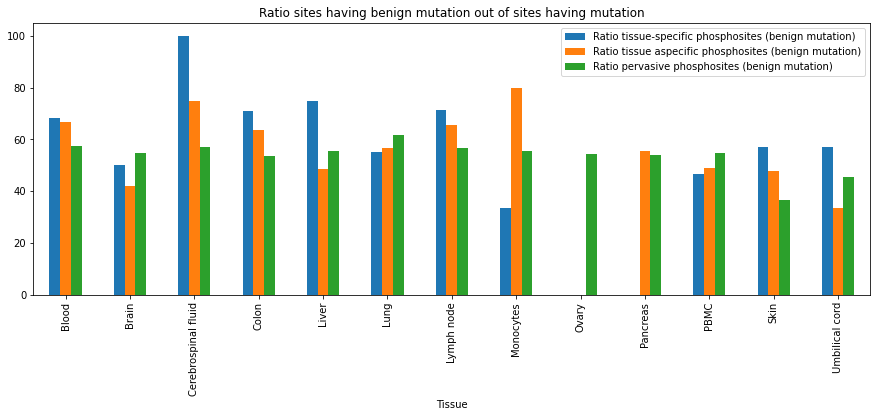

In [77]:
mut_sites_tissue_ratio_ben[(((mut_sites_tissue_ratio_ben["Ratio tissue-specific phosphosites (benign mutation)"]>=whisker_tspec)&(mut_sites_tissue_ratio_ben["Mutated tissue-specific phosphosites_all"]>50))|
                     ((mut_sites_tissue_ratio_ben["Ratio tissue aspecific phosphosites (benign mutation)"]>=whisker_taspec)&(mut_sites_tissue_ratio_ben["Mutated tissue aspecific phosphosites_all"]>50))|
                     ((mut_sites_tissue_ratio_ben["Ratio pervasive phosphosites (benign mutation)"]>=whisker_gen)&(mut_sites_tissue_ratio_ben["Mutated pervasive phosphosites_all"]>50)))][["Tissue", "Ratio tissue-specific phosphosites (benign mutation)",
                                                                                          "Ratio tissue aspecific phosphosites (benign mutation)", 
                                                                                          "Ratio pervasive phosphosites (benign mutation)"]].plot(kind="bar", figsize=(15,5), x="Tissue", title="Ratio sites having benign mutation out of sites having mutation")
#plt.savefig("Humsavar_ratio_ben_mutated_sites.png", format="png", bbox_inches="tight")

In [78]:
mut_sites_tissue_ratio_ben

,Tissue,Mutated tissue-specific phosphosites_all,Mutated tissue aspecific phosphosites_all,Mutated pervasive phosphosites_all,Ratio tissue-specific phosphosites (benign mutation),Ratio tissue aspecific phosphosites (benign mutation),Ratio pervasive phosphosites (benign mutation)
0,Adipose tissue,0,20,25,NaN,25.000000,32.000000
1,B-cells,0,5,12,NaN,60.000000,58.333333
2,Blood,116,90,183,68.103448,66.666667,57.377049
3,Bone,2,0,0,0.000000,NaN,NaN
4,Brain,12,19,155,50.000000,42.105263,54.838710
5,Breast,14,10,21,71.428571,100.000000,80.952381
6,Cerebrospinal fluid,1,4,154,100.000000,75.000000,57.142857
7,Cervix,2,1,2,100.000000,100.000000,50.000000
8,Colon,221,178,103,71.040724,63.483146,53.398058
9,Dental plaque,4,2,1,75.000000,0.000000,0.000000


<AxesSubplot:xlabel='Tissue'>

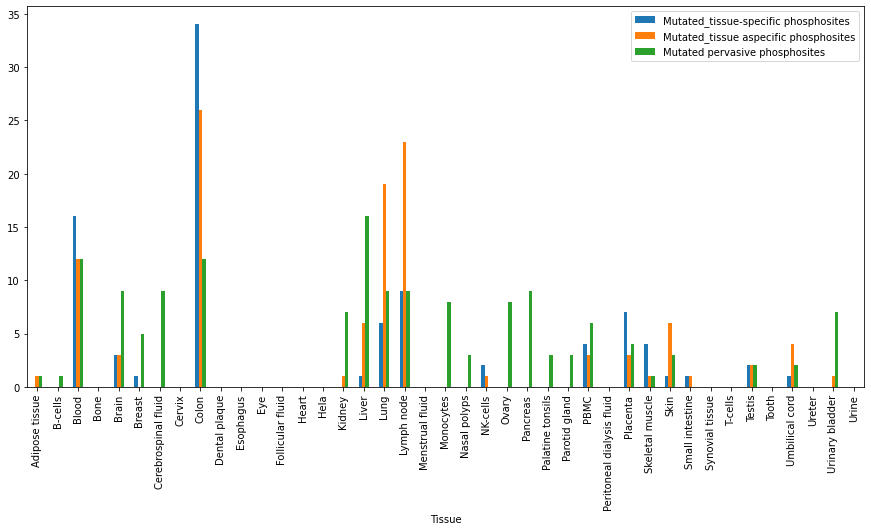

In [79]:
mut_sites_tissue_us = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
for tissue in list_tissues_STY:
    tspec_mut_tissue = tspec_site_mut.loc[(tspec_site_mut[tissue]==1)&(tspec_site_mut["Variant category"]=="US"), :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"})
    taspec_mut_tissue = taspec_site_mut.loc[(taspec_site_mut[tissue]==1)&(taspec_site_mut["Variant category"]=="US"), :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"})
    gen_mut_tissue = gen_site_mut.loc[(gen_site_mut[tissue]==1)&(gen_site_mut["Variant category"]=="US"), :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"})
    count_tspec = tspec_mut_tissue.shape[0]
    count_taspec = taspec_mut_tissue.shape[0]
    count_gen = gen_mut_tissue.shape[0]
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
mut_sites_tissue_us["Mutated_tissue-specific phosphosites"] = list_tspec
mut_sites_tissue_us["Mutated_tissue aspecific phosphosites"] = list_taspec
mut_sites_tissue_us["Mutated pervasive phosphosites"] = list_gen
mut_sites_tissue_us.plot(kind="bar", figsize=(15,7), x="Tissue")

In [80]:
mut_sites_tissue_ratio_us = mut_sites_tissue[["Tissue", "Mutated tissue-specific phosphosites_all", "Mutated tissue aspecific phosphosites_all", "Mutated pervasive phosphosites_all"]].copy()
mut_sites_tissue_ratio_us["Ratio tissue-specific phosphosites (unknown significance)"] = mut_sites_tissue_us["Mutated_tissue-specific phosphosites"]*100/mut_sites_tissue_ratio_us["Mutated tissue-specific phosphosites_all"]
mut_sites_tissue_ratio_us["Ratio tissue aspecific phosphosites (unknown significance)"] = mut_sites_tissue_us["Mutated_tissue aspecific phosphosites"]*100/mut_sites_tissue_ratio_us["Mutated tissue aspecific phosphosites_all"]
mut_sites_tissue_ratio_us["Ratio pervasive phosphosites (unknown significance)"] = mut_sites_tissue_us["Mutated pervasive phosphosites"]*100/mut_sites_tissue_ratio_us["Mutated pervasive phosphosites_all"]

In [81]:
print(mut_sites_tissue_ratio_us["Ratio tissue-specific phosphosites (unknown significance)"].describe())
print(mut_sites_tissue_ratio_us["Ratio tissue aspecific phosphosites (unknown significance)"].describe())
print(mut_sites_tissue_ratio_us["Ratio pervasive phosphosites (unknown significance)"].describe())

count     25.000000
mean      10.648640
std       19.936141
min        0.000000
25%        0.000000
50%        7.142857
75%       13.793103
max      100.000000
Name: Ratio tissue-specific phosphosites (unknown significance), dtype: float64
count    33.000000
mean      6.704389
std       8.312154
min       0.000000
25%       0.000000
50%       4.761905
75%      14.285714
max      33.333333
Name: Ratio tissue aspecific phosphosites (unknown significance), dtype: float64
count    36.000000
mean      6.457806
std       6.195119
min       0.000000
25%       0.000000
50%       5.750857
75%      10.311542
max      23.809524
Name: Ratio pervasive phosphosites (unknown significance), dtype: float64


In [82]:
whisker_tspec = 1.5*(13.79)
whisker_taspec = 1.5*(14.29)
whisker_gen = 1.5*(10.31)
print(whisker_tspec, whisker_taspec, whisker_gen)

20.685 21.435 15.465


None of the ratios exceeds the whisker.

<AxesSubplot:title={'center':'Ratio sites having unknown significance out of sites having mutation'}, xlabel='Tissue'>

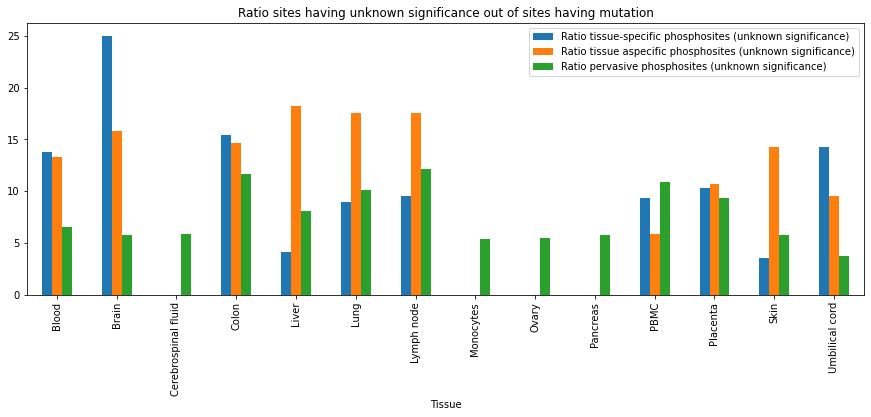

In [83]:
mut_sites_tissue_ratio_us[(((mut_sites_tissue_ratio_us["Ratio tissue-specific phosphosites (unknown significance)"]>=0)&(mut_sites_tissue_ratio_us["Mutated tissue-specific phosphosites_all"]>50))|
                     ((mut_sites_tissue_ratio_us["Ratio tissue aspecific phosphosites (unknown significance)"]>=0)&(mut_sites_tissue_ratio_us["Mutated tissue aspecific phosphosites_all"]>50))|
                     ((mut_sites_tissue_ratio_us["Ratio pervasive phosphosites (unknown significance)"]>=0)&(mut_sites_tissue_ratio_us["Mutated pervasive phosphosites_all"]>50)))][["Tissue", "Ratio tissue-specific phosphosites (unknown significance)",
                                                                                          "Ratio tissue aspecific phosphosites (unknown significance)", 
                                                                                          "Ratio pervasive phosphosites (unknown significance)"]].plot(kind="bar", figsize=(15,5), x="Tissue", title="Ratio sites having unknown significance out of sites having mutation")
#plt.savefig("Humsavar_ratio_us_mutated_sites.png", format="png", bbox_inches="tight")

In [84]:
mut_sites_tissue_ratio_us

,Tissue,Mutated tissue-specific phosphosites_all,Mutated tissue aspecific phosphosites_all,Mutated pervasive phosphosites_all,Ratio tissue-specific phosphosites (unknown significance),Ratio tissue aspecific phosphosites (unknown significance),Ratio pervasive phosphosites (unknown significance)
0,Adipose tissue,0,20,25,NaN,5.000000,4.000000
1,B-cells,0,5,12,NaN,0.000000,8.333333
2,Blood,116,90,183,13.793103,13.333333,6.557377
3,Bone,2,0,0,0.000000,NaN,NaN
4,Brain,12,19,155,25.000000,15.789474,5.806452
5,Breast,14,10,21,7.142857,0.000000,23.809524
6,Cerebrospinal fluid,1,4,154,0.000000,0.000000,5.844156
7,Cervix,2,1,2,0.000000,0.000000,0.000000
8,Colon,221,178,103,15.384615,14.606742,11.650485
9,Dental plaque,4,2,1,0.000000,0.000000,0.000000


In [85]:
tspec_site_mut["Disease name"].value_counts()

-                                                                                     626
Amyloidosis, transthyretin-related (AMYL-TTR) [MIM:105210]                             55
A sporadic cancer                                                                      55
Marfan syndrome (MFS) [MIM:154700]                                                     29
Sporadic cancers                                                                       28
                                                                                     ... 
Diamond-Blackfan anemia 5 (DBA5) [MIM:612528]                                           1
Myopathy, myofibrillar, 1 (MFM1) [MIM:601419]                                           1
Cardiomyopathy, dilated 1I (CMD1I) [MIM:604765]                                         1
Hypoplastic left heart syndrome 1 (HLHS1) [MIM:241550]                                  1
Rajab interstitial lung disease with brain calcifications 2 (RILDBC2) [MIM:619013]      1
Name: Dise

In [86]:
tspec_site_mut[tspec_site_mut["Disease name"].str.contains("cancer")].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"}).shape[0]

43

In [87]:
taspec_site_mut["Disease name"].value_counts()

-                                                                           308
Nemaline myopathy 3 (NEM3) [MIM:161800]                                      32
A sporadic cancer                                                            17
Noonan syndrome 5 (NS5) [MIM:611553]                                         16
Neutropenia, severe congenital 1, autosomal dominant (SCN1) [MIM:202700]     11
                                                                           ... 
Dystonia, juvenile-onset (DJO) [MIM:607371]                                   1
Neuronopathy, distal hereditary motor, 2B (HMN2B) [MIM:608634]                1
Mandibuloacral dysplasia with type A lipodystrophy (MADA) [MIM:248370]        1
Atrial septal defect 5 (ASD5) [MIM:612794]                                    1
Spinocerebellar ataxia, autosomal recessive, 16 (SCAR16) [MIM:615768]         1
Name: Disease name, Length: 114, dtype: int64

In [88]:
taspec_site_mut[taspec_site_mut["Disease name"].str.contains("cancer")].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"}).shape[0]

11

In [89]:
gen_site_mut["Disease name"].value_counts()

-                                                                  292
Noonan syndrome 5 (NS5) [MIM:611553]                                15
Nemaline myopathy 3 (NEM3) [MIM:161800]                             12
Alexander disease (ALXDRD) [MIM:203450]                              8
Baraitser-Winter syndrome 2 (BRWS2) [MIM:614583]                     7
                                                                  ... 
A breast cancer sample                                               1
Deafness, autosomal dominant, 70 (DFNA70) [MIM:616968]               1
Migraine, familial hemiplegic, 2 (FHM2) [MIM:602481]                 1
Symptomatic deficiency in lactate transport (SDLT) [MIM:245340]      1
Mental retardation, autosomal dominant 53 (MRD53) [MIM:617798]       1
Name: Disease name, Length: 70, dtype: int64

In [90]:
gen_site_mut[gen_site_mut["Disease name"].str.contains("cancer")].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"}).shape[0]

1

# Proteins having tissue-specific P-sites

In [91]:
tpsecsites_tspecproteins = pd.merge(tspec_proteins["ACC_ID"], data_site, how="inner", on=["ACC_ID"])
print(tpsecsites_tspecproteins.shape[0])
print(tpsecsites_tspecproteins["ACC_ID"].nunique())

2794
2029


In [92]:
tspecsites_taspecproteins = pd.merge(taspec_proteins["ACC_ID"], data_site, how="inner", on=["ACC_ID"])
tspecsites_taspecproteins = pd.merge(tspecsites_taspecproteins[["ACC_ID", "UP_POS"]], tspec_sites, how="inner", on=["ACC_ID", "UP_POS"])
print(tspecsites_taspecproteins.shape[0])
print(tspecsites_taspecproteins["ACC_ID"].nunique())

4989
1596


In [93]:
tspecsites_genproteins = pd.merge(gen_proteins, data_site, how="inner", on=["ACC_ID"])
tspecsites_genproteins = pd.merge(tspecsites_genproteins[["ACC_ID", "UP_POS"]], tspec_sites, how="inner", on=["ACC_ID", "UP_POS"])
print(tspecsites_genproteins.shape[0])
print(tspecsites_genproteins["ACC_ID"].nunique())

6236
1352


In [94]:
tspecsites_tspecproteins_mut = pd.merge(tpsecsites_tspecproteins, data_mut5, how="inner", on=["ACC_ID", "UP_POS"])
print(tspecsites_tspecproteins_mut.shape[0])
print(tspecsites_tspecproteins_mut["ACC_ID"].nunique())

200
133


In [95]:
tspecsites_taspecproteins_mut = pd.merge(tspecsites_taspecproteins, data_mut5, how="inner", on=["ACC_ID", "UP_POS"])
print(tspecsites_taspecproteins_mut.shape[0])
print(tspecsites_taspecproteins_mut["ACC_ID"].nunique())

495
187


In [96]:
tspecsites_genproteins_mut = pd.merge(tspecsites_genproteins, data_mut5, how="inner", on=["ACC_ID", "UP_POS"])
print(tspecsites_genproteins_mut.shape[0])
print(tspecsites_genproteins_mut["ACC_ID"].nunique())

566
196


<AxesSubplot:xlabel='Tissue'>

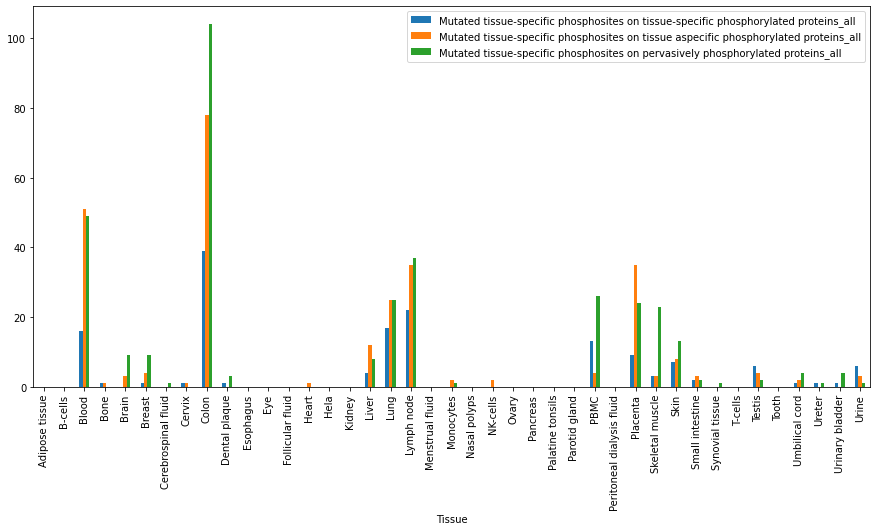

In [97]:
mut_tspecsites_tissue = pd.DataFrame({"Tissue": list_tissues_STY})
list_tspec = []
list_taspec = []
list_gen = []
for tissue in list_tissues_STY:
    tissue = tissue+"_x"
    tspec_mut_tissue = tspecsites_tspecproteins_mut.loc[tspecsites_tspecproteins_mut[tissue]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"})
    taspec_mut_tissue = tspecsites_taspecproteins_mut.loc[tspecsites_taspecproteins_mut[tissue]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"})
    gen_mut_tissue = tspecsites_genproteins_mut.loc[tspecsites_genproteins_mut[tissue]==1, :].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"dbSNP": "first"})
    count_tspec = tspec_mut_tissue.shape[0]
    count_taspec = taspec_mut_tissue.shape[0]
    count_gen = gen_mut_tissue.shape[0]
    list_tspec.append(count_tspec)
    list_taspec.append(count_taspec)
    list_gen.append(count_gen)
mut_tspecsites_tissue["Mutated tissue-specific phosphosites on tissue-specific phosphorylated proteins_all"] = list_tspec
mut_tspecsites_tissue["Mutated tissue-specific phosphosites on tissue aspecific phosphorylated proteins_all"] = list_taspec
mut_tspecsites_tissue["Mutated tissue-specific phosphosites on pervasively phosphorylated proteins_all"] = list_gen
mut_tspecsites_tissue.plot(kind="bar", figsize=(15,7), x="Tissue")
#plt.savefig("Humsavar_abs_all_mutated_tspecsites.png", format="png", bbox_inches="tight")

<AxesSubplot:title={'center':'Ratio mutated sites'}, xlabel='Tissue'>

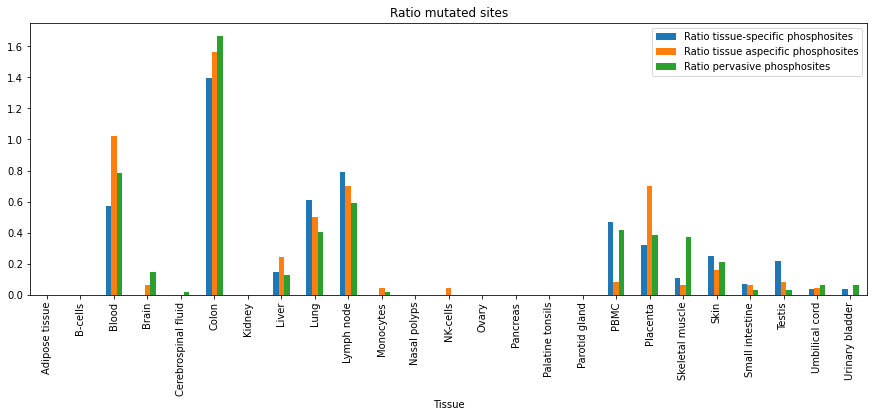

In [98]:
mut_tspecsites_tissue_ratio = pd.DataFrame({"Tissue": list_tissues_STY})
mut_tspecsites_tissue_ratio["Ratio tissue-specific phosphosites"] = mut_tspecsites_tissue["Mutated tissue-specific phosphosites on tissue-specific phosphorylated proteins_all"]*100/tpsecsites_tspecproteins.shape[0]
mut_tspecsites_tissue_ratio["Ratio tissue aspecific phosphosites"] = mut_tspecsites_tissue["Mutated tissue-specific phosphosites on tissue aspecific phosphorylated proteins_all"]*100/tspecsites_taspecproteins.shape[0]
mut_tspecsites_tissue_ratio["Ratio pervasive phosphosites"] = mut_tspecsites_tissue["Mutated tissue-specific phosphosites on pervasively phosphorylated proteins_all"]*100/tspecsites_genproteins.shape[0]
mut_tspecsites_tissue_ratio[((mut_sites_tissue_ratio["number of tissue-specific sites"]>=100)|
                     (mut_sites_tissue_ratio["number of non tissue-specific sites"]>=100)|
                     (mut_sites_tissue_ratio["number of generally expressed sites"]>=100))][["Tissue", "Ratio tissue-specific phosphosites",
                                                                                          "Ratio tissue aspecific phosphosites", 
                                                                                          "Ratio pervasive phosphosites"]].plot(kind="bar", figsize=(15,5), x="Tissue", title="Ratio mutated sites")
#plt.savefig("Humsavar_ratio_mutated_tspecsites.png", format="png", bbox_inches="tight")

# Comparison of the frequency of mutation on non-P STY sites

In [99]:
data = pd.read_csv("phospho_data_tissue_annotation.tsv", sep="\t")
data.dropna(inplace=True)
print(data.shape[0])
data.head()

586479


,proj,peptide,modres,UP_POS,ACC_ID,pep_start,pep_end,tissue
0,PXD000004,RPPSPEPSTK,S,2102,Q01082,2099,2108,Brain
1,PXD000004,ACVVHGSDLK,C,660,P50993,659,668,Brain
2,PXD000004,ACVVHGSDLK,C,663,P05023,662,671,Brain
3,PXD000004,AISPTSATSSGR,S,600,Q9Y4I1,598,609,Brain
4,PXD000004,FYYTAGSSSPTHAK,S,198,O75508,190,203,Brain


We summarise the data on the phosphosite level. For these sites identified on multiple peptides, we select the longest.

In [100]:
data = data[(data["modres"]=="S")|(data["modres"]=="T")|(data["modres"]=="Y")]
data_gr = data.groupby(["ACC_ID", "UP_POS", "modres"], as_index=False).agg({"peptide": lambda x: max(x, key=len),
                                                                 "pep_start": lambda x: min(x), "pep_end": lambda x: max(x)})
data_gr.head()

,ACC_ID,UP_POS,modres,peptide,pep_start,pep_end
0,A0A075B6H7,30,T,EIVMTQSPPTLSLSPGER,21,38
1,A0A075B6S5,52,S,ASQGISNYLAWYQQK,47,61
2,A0A087WXM9,223,S,TVMTVADQNVSPK,213,225
3,A0A0B4J2D5,124,S,GKITDLANLSAANHDAAIFPGGFGAAK,115,141
4,A0A0B4J2D5,145,T,NLSTFAVDGKDCK,142,154


In [101]:
data_gr["length"] = data_gr["peptide"].str.len()
data_gr["length"].max()

30

In [103]:
list_S = []
list_T = []
list_Y = []
for i in range(30):
    col = "S"+ str(i)
    data_gr[col] = None
    data_gr.loc[(data_gr["peptide"].str[i]=="S") & (data_gr["pep_start"]+i<=data_gr["pep_end"]) & (data_gr["pep_start"]+i != data_gr["UP_POS"]) , col] = data_gr["pep_start"]+i
    list_S.append(col)
    col_T = "T"+ str(i)
    data_gr[col_T] = None
    data_gr.loc[(data_gr["peptide"].str[i]=="T") & (data_gr["pep_start"]+i<=data_gr["pep_end"]) & (data_gr["pep_start"]+i != data_gr["UP_POS"]) , col_T] = data_gr["pep_start"]+i
    list_T.append(col_T)
    col_Y = "Y"+ str(i)
    data_gr[col_Y] = None
    data_gr.loc[(data_gr["peptide"].str[i]=="Y") & (data_gr["pep_start"]+i<=data_gr["pep_end"]) & (data_gr["pep_start"]+i != data_gr["UP_POS"]) , col_Y] = data_gr["pep_start"]+i
    list_Y.append(col_Y)
data_gr

,ACC_ID,UP_POS,modres,peptide,pep_start,pep_end,length,S0,T0,Y0,...,Y26,S27,T27,Y27,S28,T28,Y28,S29,T29,Y29
0,A0A075B6H7,30,T,EIVMTQSPPTLSLSPGER,21,38,18,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,A0A075B6S5,52,S,ASQGISNYLAWYQQK,47,61,15,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,A0A087WXM9,223,S,TVMTVADQNVSPK,213,225,13,None,213,None,...,None,None,None,None,None,None,None,None,None,None
3,A0A0B4J2D5,124,S,GKITDLANLSAANHDAAIFPGGFGAAK,115,141,27,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,A0A0B4J2D5,145,T,NLSTFAVDGKDCK,142,154,13,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23898,Q9Y6Y0,326,S,NSPQSSPTSTPK,321,332,12,None,None,None,...,None,None,None,None,None,None,None,None,None,None
23899,Q9Y6Y0,336,S,SLSFEMQQDELIEK,336,349,14,None,None,None,...,None,None,None,None,None,None,None,None,None,None
23900,Q9Y6Y0,338,S,SLSFEMQQDELIEK,336,349,14,336,None,None,...,None,None,None,None,None,None,None,None,None,None
23901,Q9Y6Y8,737,S,DMASLPSESNEPK,734,746,13,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [108]:
mutated_res = pd.DataFrame({})
for n in list_S:
    print(n)
    data_gr_sub = data_gr[~data_gr[n].isnull()]
    if data_gr_sub.shape[0] != 0:
        data_gr_sub[n]= data_gr_sub[n].astype(int)
        humsavar.rename({"UP_POS": "pos_int"}, axis=1, inplace=True)
        data_gr_sub.rename({n: "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "pos_int"])
        sub["res"] = "S"
        humsavar.rename({"pos_int": "UP_POS"}, axis=1, inplace=True)
        data_gr_sub.rename({"pos_int": n}, axis=1, inplace=True)
        mutated_res = mutated_res.append(sub)
for n in list_T:
    print(n)
    data_gr_sub = data_gr[~data_gr[n].isnull()]
    if data_gr_sub.shape[0] != 0:
        data_gr_sub[n]=data_gr_sub[n].astype(int)
        humsavar.rename({"UP_POS": "pos_int"}, axis=1, inplace=True)
        data_gr_sub.rename({n: "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "pos_int"])
        sub["res"] = "T"
        humsavar.rename({"pos_int": "UP_POS"}, axis=1, inplace=True)
        data_gr_sub.rename({"pos_int": n}, axis=1, inplace=True)
        mutated_res = mutated_res.append(sub)
for n in list_Y:
    print(n)
    data_gr_sub = data_gr[~data_gr[n].isnull()]
    if data_gr_sub.shape[0] != 0:
        data_gr_sub[n]=data_gr_sub[n].astype(int)
        humsavar.rename({"UP_POS": "pos_int"}, axis=1, inplace=True)
        data_gr_sub.rename({n: "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "pos_int"])
        sub["res"] = "Y"
        humsavar.rename({"pos_int": "UP_POS"}, axis=1, inplace=True)
        data_gr_sub.rename({"pos_int": n}, axis=1, inplace=True)
        mutated_res = mutated_res.append(sub)

S0
S1
S2


C:\Users\hannedvo\AppData\Local\Temp\21/ipykernel_18624/2131653341.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gr_sub[n]= data_gr_sub[n].astype(int)
C:\Anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


S3
S4
S5
S6
S7
S8
S9
S10
S11
S12
S13
S14
S15
S16
S17
S18
S19
S20
S21
S22
S23
S24
S25
S26
S27
S28
S29
T0
T1


C:\Users\hannedvo\AppData\Local\Temp\21/ipykernel_18624/2131653341.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gr_sub[n]=data_gr_sub[n].astype(int)


T2
T3
T4
T5
T6
T7
T8
T9
T10
T11
T12
T13
T14
T15
T16
T17
T18
T19
T20
T21
T22
T23
T24
T25
T26
T27
T28
T29
Y0


C:\Users\hannedvo\AppData\Local\Temp\21/ipykernel_18624/2131653341.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gr_sub[n]=data_gr_sub[n].astype(int)


Y1
Y2
Y3
Y4
Y5
Y6
Y7
Y8
Y9
Y10
Y11
Y12
Y13
Y14
Y15
Y16
Y17
Y18
Y19
Y20
Y21
Y22
Y23
Y24
Y25
Y26
Y27
Y28
Y29


In [109]:
for x in list_S:
    mutated_res.drop(x, axis=1, inplace=True)
for x in list_T:
    mutated_res.drop(x, axis=1, inplace=True)
for x in list_Y:
    mutated_res.drop(x, axis=1, inplace=True)
mutated_res

,ACC_ID,UP_POS,modres,peptide,pep_start,pep_end,length,pos_int,Main gene name,FTId,AA change,Variant category,dbSNP,Disease name,Annotation,res
0,P02730,733,T,SVTHANALTVMGK,731,743,13,731,SLC4A1,VAR_039295,p.Ser731Pro,LP/P,rs863225461,Cryohydrocytosis (CHC) [MIM:185020],(likely) Pathogenic,S
1,P04049,258,T,STSTPNVHMVSTTLPVDSR,257,275,19,257,RAF1,VAR_037808,p.Ser257Leu,LP/P,rs80338796,LEOPARD syndrome 2 (LPRD2) [MIM:611554],(likely) Pathogenic,S
2,P04049,258,T,STSTPNVHMVSTTLPVDSR,257,275,19,257,RAF1,VAR_037808,p.Ser257Leu,LP/P,rs80338796,Noonan syndrome 5 (NS5) [MIM:611553],(likely) Pathogenic,S
3,P04049,259,S,STSTPNVHMVSTTLPVDSR,257,275,19,257,RAF1,VAR_037808,p.Ser257Leu,LP/P,rs80338796,LEOPARD syndrome 2 (LPRD2) [MIM:611554],(likely) Pathogenic,S
4,P04049,259,S,STSTPNVHMVSTTLPVDSR,257,275,19,257,RAF1,VAR_037808,p.Ser257Leu,LP/P,rs80338796,Noonan syndrome 5 (NS5) [MIM:611553],(likely) Pathogenic,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,P68133,273,S,CPETLFQPSFIGMESAGIHETTYNSIMK,259,286,28,281,ACTA1,VAR_062471,p.Tyr281His,LP/P,-,Nemaline myopathy 3 (NEM3) [MIM:161800],(likely) Pathogenic,Y
0,P62736,122,T,MTQIMFETFNVPAMYVAIQAVLSLYASGR,121,149,29,145,ACTA2,VAR_062578,p.Tyr145Cys,LP/P,-,"Aortic aneurysm, familial thoracic 6 (AAT6) [M...",(likely) Pathogenic,Y
1,P62736,135,Y,MTQIMFETFNVPAMYVAIQAVLSLYASGR,121,149,29,145,ACTA2,VAR_062578,p.Tyr145Cys,LP/P,-,"Aortic aneurysm, familial thoracic 6 (AAT6) [M...",(likely) Pathogenic,Y
0,P68871,124,T,LLGNVLVCVLAHHFGKEFTPPVQAAYQK,106,133,28,131,HBB,VAR_003063,p.Tyr131Asp,LB/B,rs35834416,-,(likely) Benign,Y


In [110]:
data_gr["countSTY"] = data_gr["peptide"].str.count("S") + data_gr["peptide"].str.count("T") + data_gr["peptide"].str.count("Y")
data_gr["countS"] = data_gr["peptide"].str.count("S")
data_gr["countT"] = data_gr["peptide"].str.count("T")
data_gr["countY"] = data_gr["peptide"].str.count("Y")
data_gr = pd.get_dummies(data_gr, columns=["modres"])
data_gr_peptide = data_gr.groupby(["peptide"], as_index=False).agg({"countSTY": "first", "countS": "first", "countT": "first",
                                                                   "countY": "first", "UP_POS": "count", "modres_S": "sum",
                                                                   "modres_T": "sum", "modres_Y": "sum"})

data_gr_peptide["countSTYnonP"] = data_gr_peptide["countSTY"] - data_gr_peptide["UP_POS"]
data_gr_peptide["countSnonP"] = data_gr_peptide["countS"] - data_gr_peptide["modres_S"]
data_gr_peptide["countTnonP"] = data_gr_peptide["countT"] - data_gr_peptide["modres_T"]
data_gr_peptide["countYnonP"] = data_gr_peptide["countY"] - data_gr_peptide["modres_Y"]
data_gr_peptide.head()

,peptide,countSTY,countS,countT,countY,UP_POS,modres_S,modres_T,modres_Y,countSTYnonP,countSnonP,countTnonP,countYnonP
0,AAAAAAAATMALAAPSSPTPESPTMLTK,7,3,4,0,3,3,0,0,4,0,4,0
1,AAAAAATAPPSPGPAQPGPR,2,1,1,0,1,1,0,0,1,0,1,0
2,AAAAAATAPPSPGPAQPGPRAQR,2,1,1,0,1,0,1,0,1,1,0,0
3,AAAAGLGHPASPGGSEDGPPGSEEEDAAR,3,3,0,0,1,1,0,0,2,2,0,0
4,AAAAGSLDRSR,2,2,0,0,1,1,0,0,1,1,0,0


In [111]:
print(data_gr_peptide["countSTY"].sum())
print(data_gr_peptide["countS"].sum())
print(data_gr_peptide["countT"].sum())
print(data_gr_peptide["countY"].sum())
print(data_gr_peptide["countS"].sum()+data_gr_peptide["countT"].sum()+data_gr_peptide["countY"].sum())

63197
40486
17426
5285
63197


In [112]:
print(data_gr_peptide["countS"].sum()*100/data_gr_peptide["countSTY"].sum())
print(data_gr_peptide["countT"].sum()*100/data_gr_peptide["countSTY"].sum())
print(data_gr_peptide["countY"].sum()*100/data_gr_peptide["countSTY"].sum())

64.06316755542194
27.574093706979763
8.362738737598304


In [113]:
print(data_gr_peptide["countSTYnonP"].sum())
print(data_gr_peptide["countSnonP"].sum())
print(data_gr_peptide["countTnonP"].sum())
print(data_gr_peptide["countYnonP"].sum())
print(data_gr_peptide["countSnonP"].sum()+data_gr_peptide["countTnonP"].sum()+data_gr_peptide["countYnonP"].sum())

39294
23791
11810
3693
39294


In [114]:
print(data_gr_peptide["countSnonP"].sum()*100/data_gr_peptide["countSTYnonP"].sum())
print(data_gr_peptide["countTnonP"].sum()*100/data_gr_peptide["countSTYnonP"].sum())
print(data_gr_peptide["countYnonP"].sum()*100/data_gr_peptide["countSTYnonP"].sum())

60.546139359698685
30.05547920802158
9.398381432279738


In [115]:
data_gr

,ACC_ID,UP_POS,peptide,pep_start,pep_end,length,S0,T0,Y0,S1,...,S29,T29,Y29,countSTY,countS,countT,countY,modres_S,modres_T,modres_Y
0,A0A075B6H7,30,EIVMTQSPPTLSLSPGER,21,38,18,None,None,None,None,...,None,None,None,5,3,2,0,0,1,0
1,A0A075B6S5,52,ASQGISNYLAWYQQK,47,61,15,None,None,None,48,...,None,None,None,4,2,0,2,1,0,0
2,A0A087WXM9,223,TVMTVADQNVSPK,213,225,13,None,213,None,None,...,None,None,None,3,1,2,0,1,0,0
3,A0A0B4J2D5,124,GKITDLANLSAANHDAAIFPGGFGAAK,115,141,27,None,None,None,None,...,None,None,None,2,1,1,0,1,0,0
4,A0A0B4J2D5,145,NLSTFAVDGKDCK,142,154,13,None,None,None,None,...,None,None,None,2,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23898,Q9Y6Y0,326,NSPQSSPTSTPK,321,332,12,None,None,None,322,...,None,None,None,6,4,2,0,1,0,0
23899,Q9Y6Y0,336,SLSFEMQQDELIEK,336,349,14,None,None,None,None,...,None,None,None,2,2,0,0,1,0,0
23900,Q9Y6Y0,338,SLSFEMQQDELIEK,336,349,14,336,None,None,None,...,None,None,None,2,2,0,0,1,0,0
23901,Q9Y6Y8,737,DMASLPSESNEPK,734,746,13,None,None,None,None,...,None,None,None,3,3,0,0,1,0,0


In [116]:
data_gr_site = data_gr.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres_S": "sum", "modres_T": "sum",
                                                                         "modres_Y": "sum"})
print(data_gr_site.shape[0])
print(data_gr_site["modres_S"].sum())
print(data_gr_site["modres_T"].sum())
print(data_gr_site["modres_Y"].sum())

23903
16695
5616
1592


In [117]:
print(16695+5616+1592)

23903


In [118]:
print("S", data_gr_site["modres_S"].sum()*100/data_gr_site.shape[0])
print("T", data_gr_site["modres_T"].sum()*100/data_gr_site.shape[0])
print("Y", data_gr_site["modres_S"].sum()*100/data_gr_site.shape[0])

S 69.84478935698448
T 23.494958791783457
Y 69.84478935698448


Verifying whether all sites are in either the non phosphorylated group or the phosphorylated group. Every first number shoud equal the second on the same row.

In [119]:
print(data_gr_peptide["countSTYnonP"].sum()+data_gr_site.shape[0], data_gr_peptide["countSTY"].sum())
print(data_gr_peptide["countSnonP"].sum()+data_gr_site["modres_S"].sum(), data_gr_peptide["countS"].sum())
print(data_gr_peptide["countTnonP"].sum()+data_gr_site["modres_T"].sum(), data_gr_peptide["countT"].sum())
print(data_gr_peptide["countYnonP"].sum()+data_gr_site["modres_Y"].sum(), data_gr_peptide["countY"].sum())

63197 63197
40486 40486
17426 17426
5285 5285


We'll now identify all mutated non P-sites, and how many S-/T-/Y-sites there are among them.

In [120]:
mutated_res_modsites = mutated_res.groupby(["pos_int"], as_index=False).agg({"res": "first"})
print(mutated_res_modsites.shape[0])
print(mutated_res_modsites["res"].value_counts())

253
S    143
T     83
Y     27
Name: res, dtype: int64


In [121]:
print(mutated_res_modsites.shape[0]*100/data_gr_peptide["countSTYnonP"].sum())
print(mutated_res_modsites["res"].value_counts()[0]*100/data_gr_peptide["countSnonP"].sum())
print(mutated_res_modsites["res"].value_counts()[1]*100/data_gr_peptide["countTnonP"].sum())
print(mutated_res_modsites["res"].value_counts()[2]*100/data_gr_peptide["countYnonP"].sum())

0.643864203186237
0.6010676306166197
0.7027942421676545
0.7311129163281884


In [122]:
data_gr_site_mut = pd.merge(data_gr_site, humsavar, how="inner", on=["ACC_ID", "UP_POS"])

In [123]:
print(data_gr_site_mut.shape[0])
print(data_gr_site_mut["modres_S"].sum())
print(data_gr_site_mut["modres_T"].sum())
print(data_gr_site_mut["modres_Y"].sum())

169
101
53
15


In [124]:
print(data_gr_site_mut.shape[0]*100/data_gr_site.shape[0])
print(data_gr_site_mut["modres_S"].sum()*100/data_gr_site["modres_S"].sum())
print(data_gr_site_mut["modres_T"].sum()*100/data_gr_site["modres_T"].sum())
print(data_gr_site_mut["modres_Y"].sum()*100/data_gr_site["modres_Y"].sum())

0.7070242229008911
0.6049715483677748
0.9437321937321937
0.9422110552763819


In [125]:
print(data_gr_site_mut["Annotation"].value_counts())
print("Annotation of S")
print(data_gr_site_mut[data_gr_site_mut["modres_S"]==1]["Annotation"].value_counts())
print("Annotation of T")
print(data_gr_site_mut[data_gr_site_mut["modres_T"]==1]["Annotation"].value_counts())
print("Annotation of Y")
print(data_gr_site_mut[data_gr_site_mut["modres_Y"]==1]["Annotation"].value_counts())

(likely) Benign         82
(likely) Pathogenic     57
Unknown significance    30
Name: Annotation, dtype: int64
Annotation of S
(likely) Benign         51
(likely) Pathogenic     27
Unknown significance    23
Name: Annotation, dtype: int64
Annotation of T
(likely) Benign         26
(likely) Pathogenic     20
Unknown significance     7
Name: Annotation, dtype: int64
Annotation of Y
(likely) Pathogenic    10
(likely) Benign         5
Name: Annotation, dtype: int64


In [126]:
print("Relative contribution of all:")
print(data_gr_site_mut["Annotation"].value_counts()[0]*100/data_gr_site_mut.shape[0])
print(data_gr_site_mut["Annotation"].value_counts()[1]*100/data_gr_site_mut.shape[0])
print(data_gr_site_mut["Annotation"].value_counts()[2]*100/data_gr_site_mut.shape[0])
print("percentage Benign S, T, Y:")
print(data_gr_site_mut[data_gr_site_mut["modres_S"]==1]["Annotation"].value_counts()[0]*100/data_gr_site_mut[data_gr_site_mut["modres_S"]==1].shape[0])
print(data_gr_site_mut[data_gr_site_mut["modres_T"]==1]["Annotation"].value_counts()[0]*100/data_gr_site_mut[data_gr_site_mut["modres_T"]==1].shape[0])
print(data_gr_site_mut[data_gr_site_mut["modres_Y"]==1]["Annotation"].value_counts()[1]*100/data_gr_site_mut[data_gr_site_mut["modres_Y"]==1].shape[0])
print("percentage Pathogenic S, T, Y:")
print(data_gr_site_mut[data_gr_site_mut["modres_S"]==1]["Annotation"].value_counts()[1]*100/data_gr_site_mut[data_gr_site_mut["modres_S"]==1].shape[0])
print(data_gr_site_mut[data_gr_site_mut["modres_T"]==1]["Annotation"].value_counts()[1]*100/data_gr_site_mut[data_gr_site_mut["modres_T"]==1].shape[0])
print(data_gr_site_mut[data_gr_site_mut["modres_Y"]==1]["Annotation"].value_counts()[0]*100/data_gr_site_mut[data_gr_site_mut["modres_Y"]==1].shape[0])
print("percentage Unknown significance S, T, (none for Y):")
print(data_gr_site_mut[data_gr_site_mut["modres_S"]==1]["Annotation"].value_counts()[2]*100/data_gr_site_mut[data_gr_site_mut["modres_S"]==1].shape[0])
print(data_gr_site_mut[data_gr_site_mut["modres_T"]==1]["Annotation"].value_counts()[2]*100/data_gr_site_mut[data_gr_site_mut["modres_T"]==1].shape[0])
#print(data_gr_site_mut[data_gr_site_mut["modres_Y"]==1]["Annotation"].value_counts()[2]*100/data_gr_site_mut[data_gr_site_mut["modres_T"]==1].shape[0])

Relative contribution of all:
48.5207100591716
33.72781065088758
17.75147928994083
percentage Benign S, T, Y:
50.495049504950494
49.056603773584904
33.333333333333336
percentage Pathogenic S, T, Y:
26.73267326732673
37.735849056603776
66.66666666666667
percentage Unknown significance S, T, (none for Y):
22.77227722772277
13.20754716981132


In [127]:
print(mutated_res["Annotation"].value_counts())
print("Annotation of S")
print(mutated_res[mutated_res["res"]=="S"]["Annotation"].value_counts())
print("Annotation of T")
print(mutated_res[mutated_res["res"]=="T"]["Annotation"].value_counts())
print("Annotation of Y")
print(mutated_res[mutated_res["res"]=="Y"]["Annotation"].value_counts())

(likely) Benign         273
(likely) Pathogenic     205
Unknown significance     86
Name: Annotation, dtype: int64
Annotation of S
(likely) Benign         154
(likely) Pathogenic      77
Unknown significance     56
Name: Annotation, dtype: int64
Annotation of T
(likely) Benign         99
(likely) Pathogenic     85
Unknown significance    24
Name: Annotation, dtype: int64
Annotation of Y
(likely) Pathogenic     43
(likely) Benign         20
Unknown significance     6
Name: Annotation, dtype: int64


In [128]:
print("Relative contribution of all:")
print(mutated_res["Annotation"].value_counts()[0]*100/mutated_res.shape[0])
print(mutated_res["Annotation"].value_counts()[1]*100/mutated_res.shape[0])
print(mutated_res["Annotation"].value_counts()[2]*100/mutated_res.shape[0])
print("percentage Benign S, T, Y:")
print(mutated_res[mutated_res["res"]=="S"]["Annotation"].value_counts()[0]*100/mutated_res[mutated_res["res"]=="S"].shape[0])
print(mutated_res[mutated_res["res"]=="T"]["Annotation"].value_counts()[0]*100/mutated_res[mutated_res["res"]=="T"].shape[0])
print(mutated_res[mutated_res["res"]=="Y"]["Annotation"].value_counts()[1]*100/mutated_res[mutated_res["res"]=="Y"].shape[0])
print("percentage Pathogenic S, T, Y:")
print(mutated_res[mutated_res["res"]=="S"]["Annotation"].value_counts()[1]*100/mutated_res[mutated_res["res"]=="S"].shape[0])
print(mutated_res[mutated_res["res"]=="T"]["Annotation"].value_counts()[1]*100/mutated_res[mutated_res["res"]=="T"].shape[0])
print(mutated_res[mutated_res["res"]=="Y"]["Annotation"].value_counts()[0]*100/mutated_res[mutated_res["res"]=="Y"].shape[0])
print("percentage Unknown significance S, T, Y:")
print(mutated_res[mutated_res["res"]=="S"]["Annotation"].value_counts()[2]*100/mutated_res[mutated_res["res"]=="S"].shape[0])
print(mutated_res[mutated_res["res"]=="T"]["Annotation"].value_counts()[2]*100/mutated_res[mutated_res["res"]=="T"].shape[0])
print(mutated_res[mutated_res["res"]=="Y"]["Annotation"].value_counts()[2]*100/mutated_res[mutated_res["res"]=="Y"].shape[0])

Relative contribution of all:
48.40425531914894
36.347517730496456
15.24822695035461
percentage Benign S, T, Y:
53.65853658536585
47.59615384615385
28.985507246376812
percentage Pathogenic S, T, Y:
26.829268292682926
40.86538461538461
62.31884057971015
percentage Unknown significance S, T, Y:
19.51219512195122
11.538461538461538
8.695652173913043


In [129]:
mutated_res[mutated_res["res"]=="Y"].shape[0]

69

## Phosphoproteins

In [130]:
tspec_proteins_mutated_Psites = pd.merge(data_gr_site_mut, tspec_proteins, how="inner", on="ACC_ID")
taspec_proteins_mutated_Psites = pd.merge(data_gr_site_mut, taspec_proteins, how="inner", on="ACC_ID")
gen_proteins_mutated_Psites = pd.merge(data_gr_site_mut, gen_proteins, how="inner", on="ACC_ID")

In [131]:
tspec_proteins_mutated_nonPsites = pd.merge(mutated_res, tspec_proteins, how="inner", on="ACC_ID")
taspec_proteins_mutated_nonPsites = pd.merge(mutated_res, taspec_proteins, how="inner", on="ACC_ID")
gen_proteins_mutated_nonPsites = pd.merge(mutated_res, gen_proteins, how="inner", on="ACC_ID")

In [132]:
print(tspec_proteins_mutated_Psites["ACC_ID"].nunique())
print(tspec_proteins_mutated_Psites.groupby(["ACC_ID", "UP_POS"]).agg({"modres_S": "first"}).shape[0])
print(taspec_proteins_mutated_Psites["ACC_ID"].nunique())
print(taspec_proteins_mutated_Psites.groupby(["ACC_ID", "UP_POS"]).agg({"modres_S": "first"}).shape[0])
print(gen_proteins_mutated_Psites["ACC_ID"].nunique())
print(gen_proteins_mutated_Psites.groupby(["ACC_ID", "UP_POS"]).agg({"modres_S": "first"}).shape[0])

13
13
36
50
66
87


In [133]:
print(tspec_proteins_mutated_nonPsites["ACC_ID"].nunique())
print(tspec_proteins_mutated_nonPsites.groupby(["ACC_ID", "UP_POS"]).agg({"modres": "first"}).shape[0])
print(taspec_proteins_mutated_nonPsites["ACC_ID"].nunique())
print(taspec_proteins_mutated_nonPsites.groupby(["ACC_ID", "UP_POS"]).agg({"modres": "first"}).shape[0])
print(gen_proteins_mutated_nonPsites["ACC_ID"].nunique())
print(gen_proteins_mutated_nonPsites.groupby(["ACC_ID", "UP_POS"]).agg({"modres": "first"}).shape[0])

43
50
66
106
119
284


In [134]:
tspec_sites_mutated_Psites = pd.merge(data_gr_site_mut, tspec_sites, how="inner", on=["ACC_ID", "UP_POS"])
taspec_sites_mutated_Psites = pd.merge(data_gr_site_mut, taspec_sites, how="inner", on=["ACC_ID", "UP_POS"])
gen_sites_mutated_Psites = pd.merge(data_gr_site_mut, gen_sites, how="inner", on=["ACC_ID", "UP_POS"])

In [135]:
tspec_sites_mutated_nonPsites = pd.merge(mutated_res, tspec_sites, how="inner", on=["ACC_ID", "UP_POS", "modres"])
taspec_sites_mutated_nonPsites = pd.merge(mutated_res, taspec_sites, how="inner", on=["ACC_ID", "UP_POS", "modres"])
gen_sites_mutated_nonPsites = pd.merge(mutated_res, gen_sites, how="inner", on=["ACC_ID", "UP_POS", "modres"])

In [136]:
print(tspec_sites_mutated_Psites["ACC_ID"].nunique())
print(tspec_sites_mutated_Psites.groupby(["ACC_ID", "UP_POS"]).agg({"modres_S": "first"}).shape[0])
print(taspec_sites_mutated_Psites["ACC_ID"].nunique())
print(taspec_sites_mutated_Psites.groupby(["ACC_ID", "UP_POS"]).agg({"modres_S": "first"}).shape[0])
print(gen_sites_mutated_Psites["ACC_ID"].nunique())
print(gen_sites_mutated_Psites.groupby(["ACC_ID", "UP_POS"]).agg({"modres_S": "first"}).shape[0])

69
82
31
34
26
34


In [137]:
print(tspec_sites_mutated_nonPsites["ACC_ID"].nunique())
print(tspec_sites_mutated_nonPsites.groupby(["ACC_ID", "UP_POS"]).agg({"modres": "first"}).shape[0])
print(taspec_sites_mutated_nonPsites["ACC_ID"].nunique())
print(taspec_sites_mutated_nonPsites.groupby(["ACC_ID", "UP_POS"]).agg({"modres": "first"}).shape[0])
print(gen_sites_mutated_nonPsites["ACC_ID"].nunique())
print(gen_sites_mutated_nonPsites.groupby(["ACC_ID", "UP_POS"]).agg({"modres": "first"}).shape[0])

174
244
86
117
41
79


In [138]:
print(tspec_sites_mutated_Psites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres_S": "first", "modres_T": "first", "modres_Y": "first"}).shape[0])
print(tspec_sites_mutated_Psites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres_S": "first", "modres_T": "first", "modres_Y": "first"})["modres_S"].sum())
print(tspec_sites_mutated_Psites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres_S": "first", "modres_T": "first", "modres_Y": "first"})["modres_T"].sum())
print(tspec_sites_mutated_Psites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres_S": "first", "modres_T": "first", "modres_Y": "first"})["modres_Y"].sum())

82
50
25
7


In [139]:
print(tspec_sites_mutated_nonPsites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0])
print(tspec_sites_mutated_nonPsites[tspec_sites_mutated_nonPsites["res"]=="S"].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0])
print(tspec_sites_mutated_nonPsites[tspec_sites_mutated_nonPsites["res"]=="T"].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0])
print(tspec_sites_mutated_nonPsites[tspec_sites_mutated_nonPsites["res"]=="Y"].groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres": "first"}).shape[0])

244
135
90
39


In [140]:
print(tspec_sites_mutated_Psites.shape[0])
print(tspec_sites_mutated_Psites["modres_S"].sum(), tspec_sites_mutated_Psites["modres_T"].sum(), tspec_sites_mutated_Psites["modres_Y"].sum())
print(tspec_sites_mutated_Psites["Annotation"].value_counts())
print("Annotation S")
print(tspec_sites_mutated_Psites[tspec_sites_mutated_Psites["modres_S"]==1]["Annotation"].value_counts())
print("Annotation T")
print(tspec_sites_mutated_Psites[tspec_sites_mutated_Psites["modres_T"]==1]["Annotation"].value_counts())
print("Annotation Y")
print(tspec_sites_mutated_Psites[tspec_sites_mutated_Psites["modres_Y"]==1]["Annotation"].value_counts())

91
55 28 8
(likely) Benign         42
(likely) Pathogenic     31
Unknown significance    18
Name: Annotation, dtype: int64
Annotation S
(likely) Benign         27
(likely) Pathogenic     15
Unknown significance    13
Name: Annotation, dtype: int64
Annotation T
(likely) Benign         13
(likely) Pathogenic     10
Unknown significance     5
Name: Annotation, dtype: int64
Annotation Y
(likely) Pathogenic    6
(likely) Benign        2
Name: Annotation, dtype: int64


In [141]:
print(tspec_sites_mutated_nonPsites.shape[0])
print(tspec_sites_mutated_nonPsites[tspec_sites_mutated_nonPsites["res"]=="S"].shape[0], tspec_sites_mutated_nonPsites[tspec_sites_mutated_nonPsites["res"]=="T"].shape[0], tspec_sites_mutated_nonPsites[tspec_sites_mutated_nonPsites["res"]=="Y"].shape[0])
print(tspec_sites_mutated_nonPsites["Annotation"].value_counts())
print("Annotation S")
print(tspec_sites_mutated_nonPsites[tspec_sites_mutated_nonPsites["res"]=="S"]["Annotation"].value_counts())
print("Annotation T")
print(tspec_sites_mutated_nonPsites[tspec_sites_mutated_nonPsites["res"]=="T"]["Annotation"].value_counts())
print("Annotation Y")
print(tspec_sites_mutated_nonPsites[tspec_sites_mutated_nonPsites["res"]=="Y"]["Annotation"].value_counts())

309
160 105 44
(likely) Benign         161
(likely) Pathogenic     101
Unknown significance     47
Name: Annotation, dtype: int64
Annotation S
(likely) Benign         91
(likely) Pathogenic     36
Unknown significance    33
Name: Annotation, dtype: int64
Annotation T
(likely) Benign         54
(likely) Pathogenic     41
Unknown significance    10
Name: Annotation, dtype: int64
Annotation Y
(likely) Pathogenic     24
(likely) Benign         16
Unknown significance     4
Name: Annotation, dtype: int64


## Regions

As there are too few records to make adequate comparisons when we consider only specific STY-sites, we'll now expand this to comparing regions. In short, we will verify whether a mutation occurs within 5 residues of an STY-sites, both for P-sites and non P-sites, and compare this frequency for the three categories of phosphosites and phosphorylated proteins, and the tissue-specific phosphosites on the three cateogries of proteins.

In [142]:
mutated_res5 = pd.DataFrame({})
for n in list_S:
    if n == list_S[-1]:
        print("last entry: S")
    data_gr_sub = data_gr[~data_gr[n].isnull()]
    if data_gr_sub.shape[0] != 0:
        data_gr_sub[n]= data_gr_sub[n].astype(int)
        data_gr_sub["res_min5"] = data_gr_sub[n] - 5
        data_gr_sub["res_min4"] = data_gr_sub[n] - 4
        data_gr_sub["res_min3"] = data_gr_sub[n] - 3
        data_gr_sub["res_min2"] = data_gr_sub[n] - 2
        data_gr_sub["res_min1"] = data_gr_sub[n] - 1
        data_gr_sub["pos_int"] = data_gr_sub[n] - 0
        data_gr_sub["res_plus1"] = data_gr_sub[n] + 1
        data_gr_sub["res_plus2"] = data_gr_sub[n] + 2
        data_gr_sub["res_plus3"] = data_gr_sub[n] + 3
        data_gr_sub["res_plus4"] = data_gr_sub[n] + 4
        data_gr_sub["res_plus5"] = data_gr_sub[n] + 5
        humsavar.rename({"UP_POS": "res_min5"}, axis=1, inplace=True)
        sub_m5 = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "res_min5"])
        humsavar.rename({"res_min5": "res_min4"}, axis=1, inplace=True)
        sub_m4 = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "res_min4"])
        humsavar.rename({"res_min4": "res_min3"}, axis=1, inplace=True)
        sub_m3 = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "res_min3"])
        humsavar.rename({"res_min3": "res_min2"}, axis=1, inplace=True)
        sub_m2 = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "res_min2"])
        humsavar.rename({"res_min2": "res_min1"}, axis=1, inplace=True)
        sub_m1 = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "res_min1"])
        humsavar.rename({"res_min1": "res_plus5"}, axis=1, inplace=True)
        sub_p5 = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "res_plus5"])
        humsavar.rename({"res_plus5": "res_plus4"}, axis=1, inplace=True)
        sub_p4 = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "res_plus4"])
        humsavar.rename({"res_plus4": "res_plus3"}, axis=1, inplace=True)
        sub_p3 = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "res_plus3"])
        humsavar.rename({"res_plus3": "res_plus2"}, axis=1, inplace=True)
        sub_p2 = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "res_plus2"])
        humsavar.rename({"res_plus2": "res_plus1"}, axis=1, inplace=True)
        sub_p1 = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "res_plus1"])
        humsavar.rename({"res_plus1": "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "pos_int"])
        humsavar.rename({"pos_int": "UP_POS"}, axis=1, inplace=True)
        sub_m5["res"] = "S"
        mutated_res5 = mutated_res5.append(sub_m5, ignore_index=True)
        sub_m4["res"] = "S"
        mutated_res5 = mutated_res5.append(sub_m4, ignore_index=True)
        sub_m3["res"] = "S"
        mutated_res5 = mutated_res5.append(sub_m3, ignore_index=True)
        sub_m2["res"] = "S"
        mutated_res5 = mutated_res5.append(sub_m2, ignore_index=True)
        sub_m1["res"] = "S"
        mutated_res5 = mutated_res5.append(sub_m1, ignore_index=True)
        sub["res"] = "S"
        mutated_res5 = mutated_res5.append(sub, ignore_index=True)
        sub_p1["res"] = "S"
        mutated_res5 = mutated_res5.append(sub_p1, ignore_index=True)
        sub_p2["res"] = "S"
        mutated_res5 = mutated_res5.append(sub_p2, ignore_index=True)
        sub_p3["res"] = "S"
        mutated_res5 = mutated_res5.append(sub_p3, ignore_index=True)
        sub_p4["res"] = "S"
        mutated_res5 = mutated_res5.append(sub_p4, ignore_index=True)
        sub_p5["res"] = "S"
        mutated_res5 = mutated_res5.append(sub_p5, ignore_index=True)

C:\Users\hannedvo\AppData\Local\Temp\21/ipykernel_18624/34184501.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gr_sub[n]= data_gr_sub[n].astype(int)
C:\Users\hannedvo\AppData\Local\Temp\21/ipykernel_18624/34184501.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gr_sub["res_min5"] = data_gr_sub[n] - 5
C:\Users\hannedvo\AppData\Local\Temp\21/ipykernel_18624/34184501.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,

last entry: S


In [143]:
for n in list_T:
    if n == list_T[-1]:
        print("last entry: T")
    data_gr_sub = data_gr[~data_gr[n].isnull()]
    if data_gr_sub.shape[0] != 0:
        data_gr_sub[n]= data_gr_sub[n].astype(int)
        data_gr_sub["res_min5"] = data_gr_sub[n] - 5
        data_gr_sub["res_min4"] = data_gr_sub[n] - 4
        data_gr_sub["res_min3"] = data_gr_sub[n] - 3
        data_gr_sub["res_min2"] = data_gr_sub[n] - 2
        data_gr_sub["res_min1"] = data_gr_sub[n] - 1
        data_gr_sub["pos_int"] = data_gr_sub[n] - 0
        data_gr_sub["res_plus1"] = data_gr_sub[n] + 1
        data_gr_sub["res_plus2"] = data_gr_sub[n] + 2
        data_gr_sub["res_plus3"] = data_gr_sub[n] + 3
        data_gr_sub["res_plus4"] = data_gr_sub[n] + 4
        data_gr_sub["res_plus5"] = data_gr_sub[n] + 5
        humsavar.rename({"UP_POS": "res_min5"}, axis=1, inplace=True)
        sub_m5 = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "res_min5"])
        humsavar.rename({"res_min5": "res_min4"}, axis=1, inplace=True)
        sub_m4 = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "res_min4"])
        humsavar.rename({"res_min4": "res_min3"}, axis=1, inplace=True)
        sub_m3 = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "res_min3"])
        humsavar.rename({"res_min3": "res_min2"}, axis=1, inplace=True)
        sub_m2 = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "res_min2"])
        humsavar.rename({"res_min2": "res_min1"}, axis=1, inplace=True)
        sub_m1 = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "res_min1"])
        humsavar.rename({"res_min1": "res_plus5"}, axis=1, inplace=True)
        sub_p5 = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "res_plus5"])
        humsavar.rename({"res_plus5": "res_plus4"}, axis=1, inplace=True)
        sub_p4 = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "res_plus4"])
        humsavar.rename({"res_plus4": "res_plus3"}, axis=1, inplace=True)
        sub_p3 = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "res_plus3"])
        humsavar.rename({"res_plus3": "res_plus2"}, axis=1, inplace=True)
        sub_p2 = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "res_plus2"])
        humsavar.rename({"res_plus2": "res_plus1"}, axis=1, inplace=True)
        sub_p1 = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "res_plus1"])
        humsavar.rename({"res_plus1": "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "pos_int"])
        humsavar.rename({"pos_int": "UP_POS"}, axis=1, inplace=True)
        sub_m5["res"] = "T"
        mutated_res5 = mutated_res5.append(sub_m5, ignore_index=True)
        sub_m4["res"] = "T"
        mutated_res5 = mutated_res5.append(sub_m4, ignore_index=True)
        sub_m3["res"] = "T"
        mutated_res5 = mutated_res5.append(sub_m3, ignore_index=True)
        sub_m2["res"] = "T"
        mutated_res5 = mutated_res5.append(sub_m2, ignore_index=True)
        sub_m1["res"] = "T"
        mutated_res5 = mutated_res5.append(sub_m1, ignore_index=True)
        sub["res"] = "T"
        mutated_res5 = mutated_res5.append(sub, ignore_index=True)
        sub_p1["res"] = "T"
        mutated_res5 = mutated_res5.append(sub_p1, ignore_index=True)
        sub_p2["res"] = "T"
        mutated_res5 = mutated_res5.append(sub_p2, ignore_index=True)
        sub_p3["res"] = "T"
        mutated_res5 = mutated_res5.append(sub_p3, ignore_index=True)
        sub_p4["res"] = "T"
        mutated_res5 = mutated_res5.append(sub_p4, ignore_index=True)
        sub_p5["res"] = "T"
        mutated_res5 = mutated_res5.append(sub_p5, ignore_index=True)

C:\Users\hannedvo\AppData\Local\Temp\21/ipykernel_18624/2031179582.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gr_sub[n]= data_gr_sub[n].astype(int)
C:\Users\hannedvo\AppData\Local\Temp\21/ipykernel_18624/2031179582.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gr_sub["res_min5"] = data_gr_sub[n] - 5
C:\Users\hannedvo\AppData\Local\Temp\21/ipykernel_18624/2031179582.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

last entry: T


In [144]:
for n in list_Y:
    if n == list_Y[-1]:
        print("last entry: Y")
    data_gr_sub = data_gr[~data_gr[n].isnull()]
    if data_gr_sub.shape[0] != 0:
        data_gr_sub[n]= data_gr_sub[n].astype(int)
        data_gr_sub["res_min5"] = data_gr_sub[n] - 5
        data_gr_sub["res_min4"] = data_gr_sub[n] - 4
        data_gr_sub["res_min3"] = data_gr_sub[n] - 3
        data_gr_sub["res_min2"] = data_gr_sub[n] - 2
        data_gr_sub["res_min1"] = data_gr_sub[n] - 1
        data_gr_sub["pos_int"] = data_gr_sub[n] - 0
        data_gr_sub["res_plus1"] = data_gr_sub[n] + 1
        data_gr_sub["res_plus2"] = data_gr_sub[n] + 2
        data_gr_sub["res_plus3"] = data_gr_sub[n] + 3
        data_gr_sub["res_plus4"] = data_gr_sub[n] + 4
        data_gr_sub["res_plus5"] = data_gr_sub[n] + 5
        humsavar.rename({"UP_POS": "res_min5"}, axis=1, inplace=True)
        sub_m5 = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "res_min5"])
        humsavar.rename({"res_min5": "res_min4"}, axis=1, inplace=True)
        sub_m4 = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "res_min4"])
        humsavar.rename({"res_min4": "res_min3"}, axis=1, inplace=True)
        sub_m3 = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "res_min3"])
        humsavar.rename({"res_min3": "res_min2"}, axis=1, inplace=True)
        sub_m2 = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "res_min2"])
        humsavar.rename({"res_min2": "res_min1"}, axis=1, inplace=True)
        sub_m1 = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "res_min1"])
        humsavar.rename({"res_min1": "res_plus5"}, axis=1, inplace=True)
        sub_p5 = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "res_plus5"])
        humsavar.rename({"res_plus5": "res_plus4"}, axis=1, inplace=True)
        sub_p4 = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "res_plus4"])
        humsavar.rename({"res_plus4": "res_plus3"}, axis=1, inplace=True)
        sub_p3 = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "res_plus3"])
        humsavar.rename({"res_plus3": "res_plus2"}, axis=1, inplace=True)
        sub_p2 = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "res_plus2"])
        humsavar.rename({"res_plus2": "res_plus1"}, axis=1, inplace=True)
        sub_p1 = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "res_plus1"])
        humsavar.rename({"res_plus1": "pos_int"}, axis=1, inplace=True)
        sub = pd.merge(data_gr_sub, humsavar, how="inner", on=["ACC_ID", "pos_int"])
        humsavar.rename({"pos_int": "UP_POS"}, axis=1, inplace=True)
        sub_m5["res"] = "Y"
        mutated_res5 = mutated_res5.append(sub_m5, ignore_index=True)
        sub_m4["res"] = "Y"
        mutated_res5 = mutated_res5.append(sub_m4, ignore_index=True)
        sub_m3["res"] = "Y"
        mutated_res5 = mutated_res5.append(sub_m3, ignore_index=True)
        sub_m2["res"] = "Y"
        mutated_res5 = mutated_res5.append(sub_m2, ignore_index=True)
        sub_m1["res"] = "Y"
        mutated_res5 = mutated_res5.append(sub_m1, ignore_index=True)
        sub["res"] = "Y"
        mutated_res5 = mutated_res5.append(sub, ignore_index=True)
        sub_p1["res"] = "Y"
        mutated_res5 = mutated_res5.append(sub_p1, ignore_index=True)
        sub_p2["res"] = "Y"
        mutated_res5 = mutated_res5.append(sub_p2, ignore_index=True)
        sub_p3["res"] = "Y"
        mutated_res5 = mutated_res5.append(sub_p3, ignore_index=True)
        sub_p4["res"] = "Y"
        mutated_res5 = mutated_res5.append(sub_p4, ignore_index=True)
        sub_p5["res"] = "Y"
        mutated_res5 = mutated_res5.append(sub_p5, ignore_index=True)

C:\Users\hannedvo\AppData\Local\Temp\21/ipykernel_18624/2128283822.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gr_sub[n]= data_gr_sub[n].astype(int)
C:\Users\hannedvo\AppData\Local\Temp\21/ipykernel_18624/2128283822.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gr_sub["res_min5"] = data_gr_sub[n] - 5
C:\Users\hannedvo\AppData\Local\Temp\21/ipykernel_18624/2128283822.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

last entry: Y


In [145]:
for item in list_S:
    mutated_res5.drop(item, axis=1, inplace=True)
for item in list_T:
    mutated_res5.drop(item, axis=1, inplace=True)
for item in list_Y:
    mutated_res5.drop(item, axis=1, inplace=True)

In [146]:
print(mutated_res5.shape[0])

7117


In [147]:
print(mutated_res5["ACC_ID"].nunique())
print(mutated_res5.groupby(["ACC_ID","UP_POS"], as_index=False).agg({"length": "first"}).shape[0])

872
2025


In [148]:
data_gr_site["res_min5"] = data_gr_site["UP_POS"] - 5
data_gr_site["res_min4"] = data_gr_site["UP_POS"] - 4
data_gr_site["res_min3"] = data_gr_site["UP_POS"] - 3
data_gr_site["res_min2"] = data_gr_site["UP_POS"] - 2
data_gr_site["res_min1"] = data_gr_site["UP_POS"] - 1
data_gr_site["res_plus1"] = data_gr_site["UP_POS"] + 1
data_gr_site["res_plus2"] = data_gr_site["UP_POS"] + 2
data_gr_site["res_plus3"] = data_gr_site["UP_POS"] + 3
data_gr_site["res_plus4"] = data_gr_site["UP_POS"] + 4
data_gr_site["res_plus5"] = data_gr_site["UP_POS"] + 5
humsavar.rename({"UP_POS": "res_min5"}, axis=1, inplace=True)
sub_min5 = pd.merge(data_gr_site, humsavar, how="inner", on=["ACC_ID", "res_min5"])
humsavar.rename({"res_min5": "res_min4"}, axis=1, inplace=True)
sub_min4 = pd.merge(data_gr_site, humsavar, how="inner", on=["ACC_ID", "res_min4"])
humsavar.rename({"res_min4": "res_min3"}, axis=1, inplace=True)
sub_min3 = pd.merge(data_gr_site, humsavar, how="inner", on=["ACC_ID", "res_min3"])
humsavar.rename({"res_min3": "res_min2"}, axis=1, inplace=True)
sub_min2 = pd.merge(data_gr_site, humsavar, how="inner", on=["ACC_ID", "res_min2"])
humsavar.rename({"res_min2": "res_min1"}, axis=1, inplace=True)
sub_min1 = pd.merge(data_gr_site, humsavar, how="inner", on=["ACC_ID", "res_min1"])
humsavar.rename({"res_min1": "res_plus1"}, axis=1, inplace=True)
sub_plus1 = pd.merge(data_gr_site, humsavar, how="inner", on=["ACC_ID", "res_plus1"])
humsavar.rename({"res_plus1": "res_plus2"}, axis=1, inplace=True)
sub_plus2 = pd.merge(data_gr_site, humsavar, how="inner", on=["ACC_ID", "res_plus2"])
humsavar.rename({"res_plus2": "res_plus3"}, axis=1, inplace=True)
sub_plus3 = pd.merge(data_gr_site, humsavar, how="inner", on=["ACC_ID", "res_plus3"])
humsavar.rename({"res_plus3": "res_plus4"}, axis=1, inplace=True)
sub_plus4 = pd.merge(data_gr_site, humsavar, how="inner", on=["ACC_ID", "res_plus4"])
humsavar.rename({"res_plus4": "res_plus5"}, axis=1, inplace=True)
sub_plus5 = pd.merge(data_gr_site, humsavar, how="inner", on=["ACC_ID", "res_plus5"])
humsavar.rename({"res_plus5": "UP_POS"}, axis=1, inplace=True)

In [149]:
data_mut5 = pd.DataFrame({})
data_mut5=data_mut5.append(sub_min5, ignore_index=True)
data_mut5=data_mut5.append(sub_min4, ignore_index=True)
data_mut5=data_mut5.append(sub_min3, ignore_index=True)
data_mut5=data_mut5.append(sub_min2, ignore_index=True)
data_mut5=data_mut5.append(sub_min1, ignore_index=True)
data_mut5=data_mut5.append(data_gr_site_mut, ignore_index=True)
data_mut5=data_mut5.append(sub_plus1, ignore_index=True)
data_mut5=data_mut5.append(sub_plus2, ignore_index=True)
data_mut5=data_mut5.append(sub_plus3, ignore_index=True)
data_mut5=data_mut5.append(sub_plus4, ignore_index=True)
data_mut5=data_mut5.append(sub_plus5, ignore_index=True)

In [150]:
print(data_mut5["ACC_ID"].nunique())
print(data_mut5.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"res_min5": "first"}).shape[0])

712
1345


In [151]:
mutated_res_modsites5 = mutated_res5.groupby(["pos_int"], as_index=False).agg({"res": "first"})
print(mutated_res_modsites5.shape[0])
print(mutated_res_modsites5["res"].value_counts())

1126
S    854
T    219
Y     53
Name: res, dtype: int64


In [152]:
print(mutated_res_modsites5.shape[0]*100/data_gr_peptide["countSTYnonP"].sum())
print(mutated_res_modsites5["res"].value_counts()[0]*100/data_gr_peptide["countSnonP"].sum())
print(mutated_res_modsites5["res"].value_counts()[1]*100/data_gr_peptide["countTnonP"].sum())
print(mutated_res_modsites5["res"].value_counts()[2]*100/data_gr_peptide["countYnonP"].sum())

2.8655774418486284
3.5895927031230297
1.8543607112616427
1.4351475764960737


In [153]:
print(data_mut5.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"res_min5": "first"}).shape[0])
print(data_mut5.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres_S": "first"})["modres_S"].sum())
print(data_mut5.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres_T": "first"})["modres_T"].sum())
print(data_mut5.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres_Y": "first"})["modres_Y"].sum())

1345
865
338
142


In [154]:
print(data_mut5.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"res_min5": "first"}).shape[0]*100/data_gr_site.shape[0])
print(data_mut5.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres_S": "first"})["modres_S"].sum()*100/data_gr_site["modres_S"].sum())
print(data_mut5.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres_T": "first"})["modres_T"].sum()*100/data_gr_site["modres_T"].sum())
print(data_mut5.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres_Y": "first"})["modres_Y"].sum()*100/data_gr_site["modres_Y"].sum())

5.626908756223068
5.181191973644804
6.018518518518518
8.919597989949748


In [155]:
print(data_mut5["Annotation"].value_counts())
print("Annotation of S")
print(data_mut5[data_mut5["modres_S"]==1]["Annotation"].value_counts())
print("Annotation of T")
print(data_mut5[data_mut5["modres_T"]==1]["Annotation"].value_counts())
print("Annotation of Y")
print(data_mut5[data_mut5["modres_Y"]==1]["Annotation"].value_counts())

(likely) Benign         1155
(likely) Pathogenic      883
Unknown significance     291
Name: Annotation, dtype: int64
Annotation of S
(likely) Benign         701
(likely) Pathogenic     479
Unknown significance    207
Name: Annotation, dtype: int64
Annotation of T
(likely) Benign         315
(likely) Pathogenic     275
Unknown significance     73
Name: Annotation, dtype: int64
Annotation of Y
(likely) Benign         139
(likely) Pathogenic     129
Unknown significance     11
Name: Annotation, dtype: int64


In [156]:
print("Relative contribution of all:")
print(data_mut5["Annotation"].value_counts()[0]*100/data_mut5.shape[0])
print(data_mut5["Annotation"].value_counts()[1]*100/data_mut5.shape[0])
print(data_mut5["Annotation"].value_counts()[2]*100/data_mut5.shape[0])
print("percentage Benign S, T, Y:")
print(data_mut5[data_mut5["modres_S"]==1]["Annotation"].value_counts()[0]*100/data_mut5[data_mut5["modres_S"]==1].shape[0])
print(data_mut5[data_mut5["modres_T"]==1]["Annotation"].value_counts()[0]*100/data_mut5[data_mut5["modres_T"]==1].shape[0])
print(data_mut5[data_mut5["modres_Y"]==1]["Annotation"].value_counts()[0]*100/data_mut5[data_mut5["modres_Y"]==1].shape[0])
print("percentage Pathogenic S, T, Y:")
print(data_mut5[data_mut5["modres_S"]==1]["Annotation"].value_counts()[1]*100/data_mut5[data_mut5["modres_S"]==1].shape[0])
print(data_mut5[data_mut5["modres_T"]==1]["Annotation"].value_counts()[1]*100/data_mut5[data_mut5["modres_T"]==1].shape[0])
print(data_mut5[data_mut5["modres_Y"]==1]["Annotation"].value_counts()[1]*100/data_mut5[data_mut5["modres_Y"]==1].shape[0])
print("percentage Unknown significance S, T, Y:")
print(data_mut5[data_mut5["modres_S"]==1]["Annotation"].value_counts()[2]*100/data_mut5[data_mut5["modres_S"]==1].shape[0])
print(data_mut5[data_mut5["modres_T"]==1]["Annotation"].value_counts()[2]*100/data_mut5[data_mut5["modres_T"]==1].shape[0])
print(data_mut5[data_mut5["modres_Y"]==1]["Annotation"].value_counts()[2]*100/data_mut5[data_mut5["modres_T"]==1].shape[0])

Relative contribution of all:
49.59209961356805
37.91326749677973
12.49463288965221
percentage Benign S, T, Y:
50.54073540014419
47.51131221719457
49.82078853046595
percentage Pathogenic S, T, Y:
34.534967555875994
41.47812971342383
46.236559139784944
percentage Unknown significance S, T, Y:
14.924297043979813
11.010558069381599
1.6591251885369533


In [157]:
print(mutated_res5["Annotation"].value_counts())
print("Annotation of S")
print(mutated_res5[mutated_res5["res"]=="S"]["Annotation"].value_counts())
print("Annotation of T")
print(mutated_res5[mutated_res5["res"]=="T"]["Annotation"].value_counts())
print("Annotation of Y")
print(mutated_res5[mutated_res5["res"]=="Y"]["Annotation"].value_counts())

(likely) Benign         3344
(likely) Pathogenic     2800
Unknown significance     973
Name: Annotation, dtype: int64
Annotation of S
(likely) Benign         1981
(likely) Pathogenic     1279
Unknown significance     625
Name: Annotation, dtype: int64
Annotation of T
(likely) Pathogenic     1059
(likely) Benign         1020
Unknown significance     276
Name: Annotation, dtype: int64
Annotation of Y
(likely) Pathogenic     462
(likely) Benign         343
Unknown significance     72
Name: Annotation, dtype: int64


In [158]:
print("Relative contribution of all:")
print(mutated_res5["Annotation"].value_counts()[0]*100/mutated_res5.shape[0])
print(mutated_res5["Annotation"].value_counts()[1]*100/mutated_res5.shape[0])
print(mutated_res5["Annotation"].value_counts()[2]*100/mutated_res5.shape[0])
print("percentage Benign S, T, Y:")
print(mutated_res5[mutated_res5["res"]=="S"]["Annotation"].value_counts()[0]*100/mutated_res5[mutated_res5["res"]=="S"].shape[0])
print(mutated_res5[mutated_res5["res"]=="T"]["Annotation"].value_counts()[1]*100/mutated_res5[mutated_res5["res"]=="T"].shape[0])
print(mutated_res5[mutated_res5["res"]=="Y"]["Annotation"].value_counts()[1]*100/mutated_res5[mutated_res5["res"]=="Y"].shape[0])
print("percentage Pathogenic S, T, Y:")
print(mutated_res5[mutated_res5["res"]=="S"]["Annotation"].value_counts()[1]*100/mutated_res5[mutated_res5["res"]=="S"].shape[0])
print(mutated_res5[mutated_res5["res"]=="T"]["Annotation"].value_counts()[0]*100/mutated_res5[mutated_res5["res"]=="T"].shape[0])
print(mutated_res5[mutated_res5["res"]=="Y"]["Annotation"].value_counts()[0]*100/mutated_res5[mutated_res5["res"]=="Y"].shape[0])
print("percentage Unknown significance S, T, (none for Y):")
print(mutated_res5[mutated_res5["res"]=="S"]["Annotation"].value_counts()[2]*100/mutated_res5[mutated_res5["res"]=="S"].shape[0])
print(mutated_res5[mutated_res5["res"]=="T"]["Annotation"].value_counts()[2]*100/mutated_res5[mutated_res5["res"]=="T"].shape[0])
print(mutated_res5[mutated_res5["res"]=="Y"]["Annotation"].value_counts()[2]*100/mutated_res5[mutated_res5["res"]=="Y"].shape[0])

Relative contribution of all:
46.986089644513136
39.34241955880287
13.671490796683996
percentage Benign S, T, Y:
50.990990990990994
43.31210191082803
39.11060433295325
percentage Pathogenic S, T, Y:
32.92149292149292
44.968152866242036
52.679589509692136
percentage Unknown significance S, T, (none for Y):
16.087516087516086
11.719745222929935
8.209806157354619


In [159]:
tspec_prot_Psites = pd.merge(tspec_proteins, data_mut5, how="inner", on=["ACC_ID"])
taspec_prot_Psites = pd.merge(taspec_proteins, data_mut5, how="inner", on=["ACC_ID"])
gen_prot_Psites = pd.merge(gen_proteins, data_mut5, how="inner", on=["ACC_ID"])

In [160]:
tspec_prot_nonPsites = pd.merge(tspec_proteins, mutated_res5, how="inner", on=["ACC_ID"])
taspec_prot_nonPsites = pd.merge(taspec_proteins, mutated_res5, how="inner", on=["ACC_ID"])
gen_prot_nonPsites = pd.merge(gen_proteins, mutated_res5, how="inner", on=["ACC_ID"])

In [161]:
print(tspec_prot_Psites["ACC_ID"].nunique())
print(taspec_prot_Psites["ACC_ID"].nunique())
print(gen_prot_Psites["ACC_ID"].nunique())
print(tspec_prot_nonPsites["ACC_ID"].nunique())
print(taspec_prot_nonPsites["ACC_ID"].nunique())
print(gen_prot_nonPsites["ACC_ID"].nunique())

133
245
334
177
305
390


In [162]:
print(tspec_prot_Psites.groupby(["ACC_ID", "UP_POS"]).agg({"dbSNP": "first"}).shape[0])
print(taspec_prot_Psites.groupby(["ACC_ID", "UP_POS"]).agg({"dbSNP": "first"}).shape[0])
print(gen_prot_Psites.groupby(["ACC_ID", "UP_POS"]).agg({"dbSNP": "first"}).shape[0])

print(tspec_prot_nonPsites.groupby(["ACC_ID", "UP_POS"]).agg({"dbSNP": "first"}).shape[0])
print(taspec_prot_nonPsites.groupby(["ACC_ID", "UP_POS"]).agg({"dbSNP": "first"}).shape[0])
print(gen_prot_nonPsites.groupby(["ACC_ID", "UP_POS"]).agg({"dbSNP": "first"}).shape[0])

151
376
818
219
554
1252


In [163]:
tspec_prot_Psites_s = tspec_prot_Psites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres_S": "first", "modres_T": "first", "modres_Y": "first"})
taspec_prot_Psites_s = taspec_prot_Psites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres_S": "first", "modres_T": "first", "modres_Y": "first"})
gen_prot_Psites_s = gen_prot_Psites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres_S": "first", "modres_T": "first", "modres_Y": "first"})

tpsec_prot_nonPsites_s = tspec_prot_nonPsites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"res": "first"})
tapsec_prot_nonPsites_s = taspec_prot_nonPsites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"res": "first"})
gen_prot_nonPsites_s = gen_prot_nonPsites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"res": "first"})

In [164]:
print("tspec_proteins mutated Psite region")
print(tspec_prot_Psites_s.shape[0])
print(tspec_prot_Psites_s["modres_S"].sum())
print(tspec_prot_Psites_s["modres_T"].sum())
print(tspec_prot_Psites_s["modres_Y"].sum())
print("taspec_proteins mutated Psite region")
print(taspec_prot_Psites_s.shape[0])
print(taspec_prot_Psites_s["modres_S"].sum())
print(taspec_prot_Psites_s["modres_T"].sum())
print(taspec_prot_Psites_s["modres_Y"].sum())
print("pervasively_proteins mutated Psite region")
print(gen_prot_Psites_s.shape[0])
print(gen_prot_Psites_s["modres_S"].sum())
print(gen_prot_Psites_s["modres_T"].sum())
print(gen_prot_Psites_s["modres_Y"].sum())

print("tspec_proteins mutated nonPsite region")
print(tpsec_prot_nonPsites_s.shape[0])
print(tpsec_prot_nonPsites_s["res"].value_counts())
print("taspec_proteins mutated nonPsite region")
print(tapsec_prot_nonPsites_s.shape[0])
print(tapsec_prot_nonPsites_s["res"].value_counts())
print("pervasively_proteins mutated nonPsite region")
print(gen_prot_nonPsites_s.shape[0])
print(gen_prot_nonPsites_s["res"].value_counts())

tspec_proteins mutated Psite region
151
111
19
21
taspec_proteins mutated Psite region
376
254
90
32
pervasively_proteins mutated Psite region
818
500
229
89
tspec_proteins mutated nonPsite region
219
S    153
T     50
Y     16
Name: res, dtype: int64
taspec_proteins mutated nonPsite region
554
S    422
T    100
Y     32
Name: res, dtype: int64
pervasively_proteins mutated nonPsite region
1252
S    946
T    239
Y     67
Name: res, dtype: int64


In [165]:
print("tspec_proteins mutated Psite region")
print(tspec_prot_Psites_s["modres_S"].sum()*100/tspec_prot_Psites_s.shape[0])
print(tspec_prot_Psites_s["modres_T"].sum()*100/tspec_prot_Psites_s.shape[0])
print(tspec_prot_Psites_s["modres_Y"].sum()*100/tspec_prot_Psites_s.shape[0])
print("taspec_proteins mutated Psite region")
print(taspec_prot_Psites_s["modres_S"].sum()*100/taspec_prot_Psites_s.shape[0])
print(taspec_prot_Psites_s["modres_T"].sum()*100/taspec_prot_Psites_s.shape[0])
print(taspec_prot_Psites_s["modres_Y"].sum()*100/taspec_prot_Psites_s.shape[0])
print("pervasively_proteins mutated Psite region")
print(gen_prot_Psites_s["modres_S"].sum()*100/gen_prot_Psites_s.shape[0])
print(gen_prot_Psites_s["modres_T"].sum()*100/gen_prot_Psites_s.shape[0])
print(gen_prot_Psites_s["modres_Y"].sum()*100/gen_prot_Psites_s.shape[0])

print("tspec_proteins mutated nonPsite region")
print(tpsec_prot_nonPsites_s["res"].value_counts()[0]*100/tpsec_prot_nonPsites_s.shape[0])
print(tpsec_prot_nonPsites_s["res"].value_counts()[1]*100/tpsec_prot_nonPsites_s.shape[0])
print(tpsec_prot_nonPsites_s["res"].value_counts()[2]*100/tpsec_prot_nonPsites_s.shape[0])
print("taspec_proteins mutated nonPsite region")
print(tapsec_prot_nonPsites_s["res"].value_counts()[0]*100/tapsec_prot_nonPsites_s.shape[0])
print(tapsec_prot_nonPsites_s["res"].value_counts()[1]*100/tapsec_prot_nonPsites_s.shape[0])
print(tapsec_prot_nonPsites_s["res"].value_counts()[2]*100/tapsec_prot_nonPsites_s.shape[0])
print("pervasively_proteins mutated nonPsite region")
print(gen_prot_nonPsites_s["res"].value_counts()[0]*100/gen_prot_nonPsites_s.shape[0])
print(gen_prot_nonPsites_s["res"].value_counts()[1]*100/gen_prot_nonPsites_s.shape[0])
print(gen_prot_nonPsites_s["res"].value_counts()[2]*100/gen_prot_nonPsites_s.shape[0])

tspec_proteins mutated Psite region
73.50993377483444
12.582781456953642
13.907284768211921
taspec_proteins mutated Psite region
67.55319148936171
23.93617021276596
8.51063829787234
pervasively_proteins mutated Psite region
61.12469437652812
27.99511002444988
10.880195599022004
tspec_proteins mutated nonPsite region
69.86301369863014
22.831050228310502
7.30593607305936
taspec_proteins mutated nonPsite region
76.17328519855596
18.050541516245488
5.776173285198556
pervasively_proteins mutated nonPsite region
75.5591054313099
19.089456869009584
5.3514376996805115


In [166]:
print("tspec_proteins mutated Psite region")
print(tspec_prot_Psites.shape[0])
print(tspec_prot_Psites["Variant category"].value_counts())
print("taspec_proteins mutated Psite region")
print(taspec_prot_Psites.shape[0])
print(taspec_prot_Psites["Variant category"].value_counts())
print("pervasively_proteins mutated Psite region")
print(gen_prot_Psites.shape[0])
print(gen_prot_Psites["Variant category"].value_counts())

print("tspec_proteins mutated nonPsite region")
print(tspec_prot_nonPsites.shape[0])
print(tspec_prot_nonPsites["Variant category"].value_counts())
print("taspec_proteins mutated nonPsite region")
print(taspec_prot_nonPsites.shape[0])
print(taspec_prot_nonPsites["Variant category"].value_counts())
print("pervasively_proteins mutated nonPsite region")
print(gen_prot_nonPsites.shape[0])
print(gen_prot_nonPsites["Variant category"].value_counts())

tspec_proteins mutated Psite region
200
LB/B    109
LP/P     75
US       16
Name: Variant category, dtype: int64
taspec_proteins mutated Psite region
678
LB/B    270
LP/P    246
US      162
Name: Variant category, dtype: int64
pervasively_proteins mutated Psite region
1451
LB/B    776
LP/P    562
US      113
Name: Variant category, dtype: int64
tspec_proteins mutated nonPsite region
595
LB/B    312
LP/P    241
US       42
Name: Variant category, dtype: int64
taspec_proteins mutated nonPsite region
2019
LB/B    807
LP/P    697
US      515
Name: Variant category, dtype: int64
pervasively_proteins mutated nonPsite region
4503
LB/B    2225
LP/P    1862
US       416
Name: Variant category, dtype: int64


In [167]:
print("tspec_proteins mutated Psite region")
print(tspec_prot_Psites["Variant category"].value_counts()[0]*100/tspec_prot_Psites.shape[0])
print(tspec_prot_Psites["Variant category"].value_counts()[1]*100/tspec_prot_Psites.shape[0])
print(tspec_prot_Psites["Variant category"].value_counts()[2]*100/tspec_prot_Psites.shape[0])
print("taspec_proteins mutated Psite region")
print(taspec_prot_Psites["Variant category"].value_counts()[0]*100/taspec_prot_Psites.shape[0])
print(taspec_prot_Psites["Variant category"].value_counts()[1]*100/taspec_prot_Psites.shape[0])
print(taspec_prot_Psites["Variant category"].value_counts()[2]*100/taspec_prot_Psites.shape[0])
print("pervasively_proteins mutated Psite region")
print(gen_prot_Psites["Variant category"].value_counts()[0]*100/gen_prot_Psites.shape[0])
print(gen_prot_Psites["Variant category"].value_counts()[1]*100/gen_prot_Psites.shape[0])
print(gen_prot_Psites["Variant category"].value_counts()[2]*100/gen_prot_Psites.shape[0])

print("tspec_proteins mutated nonPsite region")
print(tspec_prot_nonPsites["Variant category"].value_counts()[0]*100/tspec_prot_nonPsites.shape[0])
print(tspec_prot_nonPsites["Variant category"].value_counts()[1]*100/tspec_prot_nonPsites.shape[0])
print(tspec_prot_nonPsites["Variant category"].value_counts()[2]*100/tspec_prot_nonPsites.shape[0])
print("taspec_proteins mutated nonPsite region")
print(taspec_prot_nonPsites["Variant category"].value_counts()[0]*100/taspec_prot_nonPsites.shape[0])
print(taspec_prot_nonPsites["Variant category"].value_counts()[1]*100/taspec_prot_nonPsites.shape[0])
print(taspec_prot_nonPsites["Variant category"].value_counts()[2]*100/taspec_prot_nonPsites.shape[0])
print("pervasively_proteins mutated nonPsite region")
print(gen_prot_nonPsites["Variant category"].value_counts()[0]*100/gen_prot_nonPsites.shape[0])
print(gen_prot_nonPsites["Variant category"].value_counts()[1]*100/gen_prot_nonPsites.shape[0])
print(gen_prot_nonPsites["Variant category"].value_counts()[2]*100/gen_prot_nonPsites.shape[0])

tspec_proteins mutated Psite region
54.5
37.5
8.0
taspec_proteins mutated Psite region
39.823008849557525
36.283185840707965
23.893805309734514
pervasively_proteins mutated Psite region
53.480358373535495
38.731909028256375
7.787732598208132
tspec_proteins mutated nonPsite region
52.436974789915965
40.50420168067227
7.0588235294117645
taspec_proteins mutated nonPsite region
39.9702823179792
34.52204061416543
25.507677067855376
pervasively_proteins mutated nonPsite region
49.41150344214968
41.35021097046413
9.238285587386187


In [168]:
print("tspec_proteins mutated Psite region, per residue")
print(tspec_prot_Psites.shape[0])
print(tspec_prot_Psites[tspec_prot_Psites["modres_S"]==1]["Annotation"].value_counts())
print(tspec_prot_Psites[tspec_prot_Psites["modres_T"]==1]["Annotation"].value_counts())
print(tspec_prot_Psites[tspec_prot_Psites["modres_Y"]==1]["Annotation"].value_counts())
print("taspec_proteins mutated Psite region")
print(taspec_prot_Psites.shape[0])
print(taspec_prot_Psites[taspec_prot_Psites["modres_S"]==1]["Annotation"].value_counts())
print(taspec_prot_Psites[taspec_prot_Psites["modres_T"]==1]["Annotation"].value_counts())
print(taspec_prot_Psites[taspec_prot_Psites["modres_Y"]==1]["Annotation"].value_counts())
print("pervasively_proteins mutated Psite region")
print(gen_prot_Psites.shape[0])
print(gen_prot_Psites[gen_prot_Psites["modres_S"]==1]["Annotation"].value_counts())
print(gen_prot_Psites[gen_prot_Psites["modres_T"]==1]["Annotation"].value_counts())
print(gen_prot_Psites[gen_prot_Psites["modres_Y"]==1]["Annotation"].value_counts())

print("tspec_proteins mutated nonPsite region")
print(tspec_prot_nonPsites.shape[0])
print(tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="S"]["Annotation"].value_counts())
print(tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="T"]["Annotation"].value_counts())
print(tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="Y"]["Annotation"].value_counts())
print("taspec_proteins mutated nonPsite region")
print(taspec_prot_nonPsites.shape[0])
print(taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="S"]["Annotation"].value_counts())
print(taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="T"]["Annotation"].value_counts())
print(taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="Y"]["Annotation"].value_counts())
print("pervasively_proteins mutated nonPsite region")
print(gen_prot_nonPsites.shape[0])
print(gen_prot_nonPsites[gen_prot_nonPsites["res"]=="S"]["Annotation"].value_counts())
print(gen_prot_nonPsites[gen_prot_nonPsites["res"]=="T"]["Annotation"].value_counts())
print(gen_prot_nonPsites[gen_prot_nonPsites["res"]=="Y"]["Annotation"].value_counts())

tspec_proteins mutated Psite region, per residue
200
(likely) Benign         82
(likely) Pathogenic     46
Unknown significance    12
Name: Annotation, dtype: int64
(likely) Benign         15
(likely) Pathogenic     15
Unknown significance     1
Name: Annotation, dtype: int64
(likely) Pathogenic     14
(likely) Benign         12
Unknown significance     3
Name: Annotation, dtype: int64
taspec_proteins mutated Psite region
678
(likely) Benign         188
(likely) Pathogenic     124
Unknown significance    119
Name: Annotation, dtype: int64
(likely) Pathogenic     87
(likely) Benign         58
Unknown significance    41
Name: Annotation, dtype: int64
(likely) Pathogenic     35
(likely) Benign         24
Unknown significance     2
Name: Annotation, dtype: int64
pervasively_proteins mutated Psite region
1451
(likely) Benign         431
(likely) Pathogenic     309
Unknown significance     76
Name: Annotation, dtype: int64
(likely) Benign         242
(likely) Pathogenic     173
Unknown signi

In [169]:
print("tspec_proteins mutated Psite region, per residue")
print(tspec_prot_Psites.shape[0])
print(tspec_prot_Psites[tspec_prot_Psites["modres_S"]==1]["Annotation"].value_counts()[0]*100/tspec_prot_Psites[tspec_prot_Psites["modres_S"]==1].shape[0])
print(tspec_prot_Psites[tspec_prot_Psites["modres_S"]==1]["Annotation"].value_counts()[1]*100/tspec_prot_Psites[tspec_prot_Psites["modres_S"]==1].shape[0])
print(tspec_prot_Psites[tspec_prot_Psites["modres_S"]==1]["Annotation"].value_counts()[2]*100/tspec_prot_Psites[tspec_prot_Psites["modres_S"]==1].shape[0])

print(tspec_prot_Psites[tspec_prot_Psites["modres_T"]==1]["Annotation"].value_counts()[0]*100/tspec_prot_Psites[tspec_prot_Psites["modres_T"]==1].shape[0])
print(tspec_prot_Psites[tspec_prot_Psites["modres_T"]==1]["Annotation"].value_counts()[1]*100/tspec_prot_Psites[tspec_prot_Psites["modres_T"]==1].shape[0])
print(tspec_prot_Psites[tspec_prot_Psites["modres_T"]==1]["Annotation"].value_counts()[2]*100/tspec_prot_Psites[tspec_prot_Psites["modres_T"]==1].shape[0])

print(tspec_prot_Psites[tspec_prot_Psites["modres_Y"]==1]["Annotation"].value_counts()[1]*100/tspec_prot_Psites[tspec_prot_Psites["modres_Y"]==1].shape[0])
print(tspec_prot_Psites[tspec_prot_Psites["modres_Y"]==1]["Annotation"].value_counts()[0]*100/tspec_prot_Psites[tspec_prot_Psites["modres_Y"]==1].shape[0])
print(tspec_prot_Psites[tspec_prot_Psites["modres_Y"]==1]["Annotation"].value_counts()[2]*100/tspec_prot_Psites[tspec_prot_Psites["modres_Y"]==1].shape[0])


print("taspec_proteins mutated Psite region")

print(taspec_prot_Psites[taspec_prot_Psites["modres_S"]==1]["Annotation"].value_counts()[0]*100/taspec_prot_Psites[taspec_prot_Psites["modres_S"]==1].shape[0])
print(taspec_prot_Psites[taspec_prot_Psites["modres_S"]==1]["Annotation"].value_counts()[1]*100/taspec_prot_Psites[taspec_prot_Psites["modres_S"]==1].shape[0])
print(taspec_prot_Psites[taspec_prot_Psites["modres_S"]==1]["Annotation"].value_counts()[2]*100/taspec_prot_Psites[taspec_prot_Psites["modres_S"]==1].shape[0])

print(taspec_prot_Psites[taspec_prot_Psites["modres_T"]==1]["Annotation"].value_counts()[1]*100/taspec_prot_Psites[taspec_prot_Psites["modres_T"]==1].shape[0])
print(taspec_prot_Psites[taspec_prot_Psites["modres_T"]==1]["Annotation"].value_counts()[0]*100/taspec_prot_Psites[taspec_prot_Psites["modres_T"]==1].shape[0])
print(taspec_prot_Psites[taspec_prot_Psites["modres_T"]==1]["Annotation"].value_counts()[2]*100/taspec_prot_Psites[taspec_prot_Psites["modres_T"]==1].shape[0])

print(taspec_prot_Psites[taspec_prot_Psites["modres_Y"]==1]["Annotation"].value_counts()[1]*100/taspec_prot_Psites[taspec_prot_Psites["modres_Y"]==1].shape[0])
print(taspec_prot_Psites[taspec_prot_Psites["modres_Y"]==1]["Annotation"].value_counts()[0]*100/taspec_prot_Psites[taspec_prot_Psites["modres_Y"]==1].shape[0])
print(taspec_prot_Psites[taspec_prot_Psites["modres_Y"]==1]["Annotation"].value_counts()[2]*100/taspec_prot_Psites[taspec_prot_Psites["modres_Y"]==1].shape[0])

print("pervasively_proteins mutated Psite region")
print(gen_prot_Psites.shape[0])
print(gen_prot_Psites[gen_prot_Psites["modres_S"]==1]["Annotation"].value_counts()[0]*100/gen_prot_Psites[gen_prot_Psites["modres_S"]==1].shape[0])
print(gen_prot_Psites[gen_prot_Psites["modres_S"]==1]["Annotation"].value_counts()[1]*100/gen_prot_Psites[gen_prot_Psites["modres_S"]==1].shape[0])
print(gen_prot_Psites[gen_prot_Psites["modres_S"]==1]["Annotation"].value_counts()[2]*100/gen_prot_Psites[gen_prot_Psites["modres_S"]==1].shape[0])

print(gen_prot_Psites[gen_prot_Psites["modres_T"]==1]["Annotation"].value_counts()[0]*100/gen_prot_Psites[gen_prot_Psites["modres_T"]==1].shape[0])
print(gen_prot_Psites[gen_prot_Psites["modres_T"]==1]["Annotation"].value_counts()[1]*100/gen_prot_Psites[gen_prot_Psites["modres_T"]==1].shape[0])
print(gen_prot_Psites[gen_prot_Psites["modres_T"]==1]["Annotation"].value_counts()[2]*100/gen_prot_Psites[gen_prot_Psites["modres_T"]==1].shape[0])

print(gen_prot_Psites[gen_prot_Psites["modres_Y"]==1]["Annotation"].value_counts()[0]*100/gen_prot_Psites[gen_prot_Psites["modres_Y"]==1].shape[0])
print(gen_prot_Psites[gen_prot_Psites["modres_Y"]==1]["Annotation"].value_counts()[1]*100/gen_prot_Psites[gen_prot_Psites["modres_Y"]==1].shape[0])
print(gen_prot_Psites[gen_prot_Psites["modres_Y"]==1]["Annotation"].value_counts()[2]*100/gen_prot_Psites[gen_prot_Psites["modres_Y"]==1].shape[0])



print("tspec_proteins mutated nonPsite region, per residue")
print(tspec_prot_nonPsites.shape[0])
print(tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="S"]["Annotation"].value_counts()[0]*100/tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="S"].shape[0])
print(tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="S"]["Annotation"].value_counts()[1]*100/tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="S"].shape[0])
print(tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="S"]["Annotation"].value_counts()[2]*100/tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="S"].shape[0])

print(tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="T"]["Annotation"].value_counts()[1]*100/tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="T"].shape[0])
print(tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="T"]["Annotation"].value_counts()[0]*100/tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="T"].shape[0])
print(tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="T"]["Annotation"].value_counts()[2]*100/tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="T"].shape[0])

print(tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="Y"]["Annotation"].value_counts()[1]*100/tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="Y"].shape[0])
print(tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="Y"]["Annotation"].value_counts()[0]*100/tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="Y"].shape[0])
print(tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="Y"]["Annotation"].value_counts()[2]*100/tspec_prot_nonPsites[tspec_prot_nonPsites["res"]=="Y"].shape[0])


print("taspec_proteins mutated nonPsite region")

print(taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="S"]["Annotation"].value_counts()[0]*100/taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="S"].shape[0])
print(taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="S"]["Annotation"].value_counts()[1]*100/taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="S"].shape[0])
print(taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="S"]["Annotation"].value_counts()[2]*100/taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="S"].shape[0])

print(taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="T"]["Annotation"].value_counts()[1]*100/taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="T"].shape[0])
print(taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="T"]["Annotation"].value_counts()[0]*100/taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="T"].shape[0])
print(taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="T"]["Annotation"].value_counts()[2]*100/taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="T"].shape[0])

print(taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="Y"]["Annotation"].value_counts()[1]*100/taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="Y"].shape[0])
print(taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="Y"]["Annotation"].value_counts()[0]*100/taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="Y"].shape[0])
print(taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="Y"]["Annotation"].value_counts()[2]*100/taspec_prot_nonPsites[taspec_prot_nonPsites["res"]=="Y"].shape[0])

print("pervasively_proteins mutated nonPsite region")
print(gen_prot_nonPsites.shape[0])
print(gen_prot_nonPsites[gen_prot_nonPsites["res"]=="S"]["Annotation"].value_counts()[0]*100/gen_prot_nonPsites[gen_prot_nonPsites["res"]=="S"].shape[0])
print(gen_prot_nonPsites[gen_prot_nonPsites["res"]=="S"]["Annotation"].value_counts()[1]*100/gen_prot_nonPsites[gen_prot_nonPsites["res"]=="S"].shape[0])
print(gen_prot_nonPsites[gen_prot_nonPsites["res"]=="S"]["Annotation"].value_counts()[2]*100/gen_prot_nonPsites[gen_prot_nonPsites["res"]=="S"].shape[0])

print(gen_prot_nonPsites[gen_prot_nonPsites["res"]=="T"]["Annotation"].value_counts()[1]*100/gen_prot_nonPsites[gen_prot_nonPsites["res"]=="T"].shape[0])
print(gen_prot_nonPsites[gen_prot_nonPsites["res"]=="T"]["Annotation"].value_counts()[0]*100/gen_prot_nonPsites[gen_prot_nonPsites["res"]=="T"].shape[0])
print(gen_prot_nonPsites[gen_prot_nonPsites["res"]=="T"]["Annotation"].value_counts()[2]*100/gen_prot_nonPsites[gen_prot_nonPsites["res"]=="T"].shape[0])

print(gen_prot_nonPsites[gen_prot_nonPsites["res"]=="Y"]["Annotation"].value_counts()[1]*100/gen_prot_nonPsites[gen_prot_nonPsites["res"]=="Y"].shape[0])
print(gen_prot_nonPsites[gen_prot_nonPsites["res"]=="Y"]["Annotation"].value_counts()[0]*100/gen_prot_nonPsites[gen_prot_nonPsites["res"]=="Y"].shape[0])
print(gen_prot_nonPsites[gen_prot_nonPsites["res"]=="Y"]["Annotation"].value_counts()[2]*100/gen_prot_nonPsites[gen_prot_nonPsites["res"]=="Y"].shape[0])

tspec_proteins mutated Psite region, per residue
200
58.57142857142857
32.857142857142854
8.571428571428571
48.38709677419355
48.38709677419355
3.225806451612903
41.37931034482759
48.275862068965516
10.344827586206897
taspec_proteins mutated Psite region
43.619489559164734
28.77030162412993
27.610208816705338
31.182795698924732
46.774193548387096
22.043010752688172
39.34426229508197
57.377049180327866
3.278688524590164
pervasively_proteins mutated Psite region
1451
52.818627450980394
37.86764705882353
9.313725490196079
54.26008968609865
38.789237668161434
6.95067264573991
54.4973544973545
42.32804232804233
3.1746031746031744
tspec_proteins mutated nonPsite region, per residue
595
60.2112676056338
31.338028169014084
8.450704225352112
46.3768115942029
47.82608695652174
5.797101449275362
43.26923076923077
50.96153846153846
5.769230769230769
taspec_proteins mutated nonPsite region
42.69466316710411
30.35870516185477
26.94663167104112
35.78125
41.09375
23.125
38.13559322033898
53.3898305084

In [170]:
tspec_sites_Psites = pd.merge(tspec_sites, data_mut5, how="inner", on=["ACC_ID", "UP_POS"])
taspec_sites_Psites = pd.merge(taspec_sites, data_mut5, how="inner", on=["ACC_ID", "UP_POS"])
gen_sites_Psites = pd.merge(gen_sites, data_mut5, how="inner", on=["ACC_ID", "UP_POS"])

In [171]:
tspec_sites_nonPsites = pd.merge(tspec_sites, mutated_res5, how="inner", on=["ACC_ID", "UP_POS"])
taspec_sites_nonPsites = pd.merge(taspec_sites, mutated_res5, how="inner", on=["ACC_ID", "UP_POS"])
gen_sites_nonPsites = pd.merge(gen_sites, mutated_res5, how="inner", on=["ACC_ID", "UP_POS"])

In [172]:
print(tspec_sites_Psites.groupby(["ACC_ID", "UP_POS"]).agg({"dbSNP": "first"}).shape[0])
print(taspec_sites_Psites.groupby(["ACC_ID", "UP_POS"]).agg({"dbSNP": "first"}).shape[0])
print(gen_sites_Psites.groupby(["ACC_ID", "UP_POS"]).agg({"dbSNP": "first"}).shape[0])

print(tspec_sites_nonPsites.groupby(["ACC_ID", "UP_POS"]).agg({"dbSNP": "first"}).shape[0])
print(taspec_sites_nonPsites.groupby(["ACC_ID", "UP_POS"]).agg({"dbSNP": "first"}).shape[0])
print(gen_sites_nonPsites.groupby(["ACC_ID", "UP_POS"]).agg({"dbSNP": "first"}).shape[0])

775
344
226
1160
522
343


In [173]:
print(tspec_sites["modres"].value_counts())
print(taspec_sites["modres"].value_counts())
print(gen_sites["modres"].value_counts())

S    9529
T    3468
Y    1022
Name: modres, dtype: int64
S    4686
T    1399
Y     393
Name: modres, dtype: int64
S    2480
T     749
Y     177
Name: modres, dtype: int64


In [174]:
tspec_sites_Psites_s = tspec_sites_Psites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres_S": "first", "modres_T": "first", "modres_Y": "first"})
taspec_sites_Psites_s = taspec_sites_Psites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres_S": "first", "modres_T": "first", "modres_Y": "first"})
gen_sites_Psites_s = gen_sites_Psites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"modres_S": "first", "modres_T": "first", "modres_Y": "first"})

tpsec_sites_nonPsites_s = tspec_sites_nonPsites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"res": "first"})
tapsec_sites_nonPsites_s = taspec_sites_nonPsites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"res": "first"})
gen_sites_nonPsites_s = gen_sites_nonPsites.groupby(["ACC_ID", "UP_POS"], as_index=False).agg({"res": "first"})

In [175]:
print("tspec_sites mutated Psite region")
print(tspec_sites_Psites_s.shape[0])
print(tspec_sites_Psites_s["modres_S"].sum())
print(tspec_sites_Psites_s["modres_T"].sum())
print(tspec_sites_Psites_s["modres_Y"].sum())
print("taspec_sites mutated Psite region")
print(taspec_sites_Psites_s.shape[0])
print(taspec_sites_Psites_s["modres_S"].sum())
print(taspec_sites_Psites_s["modres_T"].sum())
print(taspec_sites_Psites_s["modres_Y"].sum())
print("pervasively_sites mutated Psite region")
print(gen_sites_Psites_s.shape[0])
print(gen_sites_Psites_s["modres_S"].sum())
print(gen_sites_Psites_s["modres_T"].sum())
print(gen_sites_Psites_s["modres_Y"].sum())

print("tspec_sites mutated nonPsite region")
print(tpsec_sites_nonPsites_s.shape[0])
print(tpsec_sites_nonPsites_s["res"].value_counts())
print("taspec_sites mutated nonPsite region")
print(tapsec_sites_nonPsites_s.shape[0])
print(tapsec_sites_nonPsites_s["res"].value_counts())
print("pervasively_sites mutated nonPsite region")
print(gen_sites_nonPsites_s.shape[0])
print(gen_sites_nonPsites_s["res"].value_counts())

tspec_sites mutated Psite region
775
497
197
81
taspec_sites mutated Psite region
344
221
80
43
pervasively_sites mutated Psite region
226
147
61
18
tspec_sites mutated nonPsite region
1160
S    882
T    206
Y     72
Name: res, dtype: int64
taspec_sites mutated nonPsite region
522
S    394
T    108
Y     20
Name: res, dtype: int64
pervasively_sites mutated nonPsite region
343
S    245
T     75
Y     23
Name: res, dtype: int64


In [176]:
print("tspec_sites mutated Psite region")
print(tspec_sites_Psites_s["modres_S"].sum()*100/tspec_sites_Psites_s.shape[0])
print(tspec_sites_Psites_s["modres_T"].sum()*100/tspec_sites_Psites_s.shape[0])
print(tspec_sites_Psites_s["modres_Y"].sum()*100/tspec_sites_Psites_s.shape[0])
print("taspec_sites mutated Psite region")
print(taspec_sites_Psites_s["modres_S"].sum()*100/taspec_sites_Psites_s.shape[0])
print(taspec_sites_Psites_s["modres_T"].sum()*100/taspec_sites_Psites_s.shape[0])
print(taspec_sites_Psites_s["modres_Y"].sum()*100/taspec_sites_Psites_s.shape[0])
print("pervasively_sites mutated Psite region")
print(gen_sites_Psites_s["modres_S"].sum()*100/gen_sites_Psites_s.shape[0])
print(gen_sites_Psites_s["modres_T"].sum()*100/gen_sites_Psites_s.shape[0])
print(gen_sites_Psites_s["modres_Y"].sum()*100/gen_sites_Psites_s.shape[0])

print("tspec_sites mutated nonPsite region")
print(tpsec_sites_nonPsites_s["res"].value_counts()[0]*100/tpsec_sites_nonPsites_s.shape[0])
print(tpsec_sites_nonPsites_s["res"].value_counts()[1]*100/tpsec_sites_nonPsites_s.shape[0])
print(tpsec_sites_nonPsites_s["res"].value_counts()[2]*100/tpsec_sites_nonPsites_s.shape[0])
print("taspec_sites mutated nonPsite region")
print(tapsec_sites_nonPsites_s["res"].value_counts()[0]*100/tapsec_sites_nonPsites_s.shape[0])
print(tapsec_sites_nonPsites_s["res"].value_counts()[1]*100/tapsec_sites_nonPsites_s.shape[0])
print(tapsec_sites_nonPsites_s["res"].value_counts()[2]*100/tapsec_sites_nonPsites_s.shape[0])
print("pervasively_sites mutated nonPsite region")
print(gen_sites_nonPsites_s["res"].value_counts()[0]*100/gen_sites_nonPsites_s.shape[0])
print(gen_sites_nonPsites_s["res"].value_counts()[1]*100/gen_sites_nonPsites_s.shape[0])
print(gen_sites_nonPsites_s["res"].value_counts()[2]*100/gen_sites_nonPsites_s.shape[0])

tspec_sites mutated Psite region
64.12903225806451
25.419354838709676
10.451612903225806
taspec_sites mutated Psite region
64.24418604651163
23.25581395348837
12.5
pervasively_sites mutated Psite region
65.04424778761062
26.991150442477878
7.964601769911504
tspec_sites mutated nonPsite region
76.03448275862068
17.75862068965517
6.206896551724138
taspec_sites mutated nonPsite region
75.47892720306514
20.689655172413794
3.8314176245210727
pervasively_sites mutated nonPsite region
71.42857142857143
21.865889212827987
6.705539358600583


In [177]:
tspec_sites_Psites_plotSTY = pd.DataFrame({"residue": ["S","T","Y"]})
tspec_sites_Psites_plotSTY["Frequency"] =  [tspec_sites_Psites_s["modres_S"].sum()*100/tspec_sites_Psites_s.shape[0],
                                          tspec_sites_Psites_s["modres_T"].sum()*100/tspec_sites_Psites_s.shape[0],
                                          tspec_sites_Psites_s["modres_Y"].sum()*100/tspec_sites_Psites_s.shape[0]]
taspec_sites_Psites_plotSTY = pd.DataFrame({"residue": ["S","T","Y"]})
taspec_sites_Psites_plotSTY["Frequency"] = [taspec_sites_Psites_s["modres_S"].sum()*100/taspec_sites_Psites_s.shape[0],
                                          taspec_sites_Psites_s["modres_T"].sum()*100/taspec_sites_Psites_s.shape[0],
                                          taspec_sites_Psites_s["modres_Y"].sum()*100/taspec_sites_Psites_s.shape[0]]
gen_sites_Psites_plotSTY = pd.DataFrame({"residue": ["S","T","Y"]})
gen_sites_Psites_plotSTY["Frequency"] = [gen_sites_Psites_s["modres_S"].sum()*100/gen_sites_Psites_s.shape[0],
                                          gen_sites_Psites_s["modres_T"].sum()*100/gen_sites_Psites_s.shape[0],
                                          gen_sites_Psites_s["modres_Y"].sum()*100/gen_sites_Psites_s.shape[0]]

tspec_sites_nonPsites_plotSTY = pd.DataFrame({"residue": ["S","T","Y"]})
tspec_sites_nonPsites_plotSTY["Frequency"] =  [tpsec_sites_nonPsites_s["res"].value_counts()[0]*100/tpsec_sites_nonPsites_s.shape[0],
                                          tpsec_sites_nonPsites_s["res"].value_counts()[1]*100/tpsec_sites_nonPsites_s.shape[0],
                                          tpsec_sites_nonPsites_s["res"].value_counts()[2]*100/tpsec_sites_nonPsites_s.shape[0]]
taspec_sites_nonPsites_plotSTY = pd.DataFrame({"residue": ["S","T","Y"]})
taspec_sites_nonPsites_plotSTY["Frequency"] = [tapsec_sites_nonPsites_s["res"].value_counts()[0]*100/tapsec_sites_nonPsites_s.shape[0],
                                          tapsec_sites_nonPsites_s["res"].value_counts()[1]*100/tapsec_sites_nonPsites_s.shape[0],
                                          tapsec_sites_nonPsites_s["res"].value_counts()[2]*100/tapsec_sites_nonPsites_s.shape[0]]
gen_sites_nonPsites_plotSTY = pd.DataFrame({"residue": ["S","T","Y"]})
gen_sites_nonPsites_plotSTY["Frequency"] = [gen_sites_nonPsites_s["res"].value_counts()[0]*100/gen_sites_nonPsites_s.shape[0],
                                          gen_sites_nonPsites_s["res"].value_counts()[1]*100/gen_sites_nonPsites_s.shape[0],
                                          gen_sites_nonPsites_s["res"].value_counts()[2]*100/gen_sites_nonPsites_s.shape[0]]

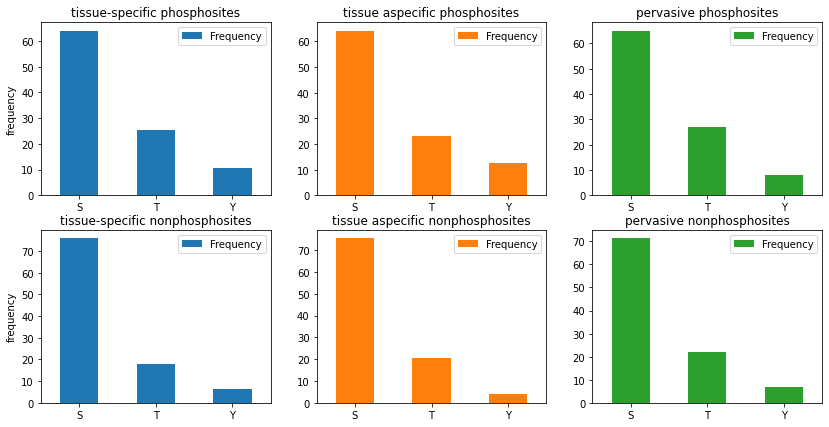

In [179]:
fig,ax = plt.subplots(2,3)

tspec_sites_Psites_plotSTY.plot(ax = ax[0,0], kind = 'bar', x="residue", xlabel="", ylabel = 'frequency', figsize=(14, 7), rot=0).set_title("tissue-specific phosphosites")
taspec_sites_Psites_plotSTY.plot(ax = ax[0,1], kind = 'bar', x="residue", xlabel="", figsize=(14, 7), rot=0, color=["tab:orange"]).set_title("tissue aspecific phosphosites")
gen_sites_Psites_plotSTY.plot(ax = ax[0,2], kind = 'bar', x="residue", xlabel="", figsize=(14, 7), rot=0, color=["tab:green"]).set_title("pervasive phosphosites")
tspec_sites_nonPsites_plotSTY.plot(ax = ax[1,0], kind = 'bar', x="residue", xlabel="", ylabel = 'frequency', figsize=(14, 7), rot=0).set_title("tissue-specific nonphosphosites")
taspec_sites_nonPsites_plotSTY.plot(ax = ax[1,1], kind = 'bar', x="residue", xlabel="", figsize=(14, 7), rot=0, color=["tab:orange"]).set_title("tissue aspecific nonphosphosites")
gen_sites_nonPsites_plotSTY.plot(ax = ax[1,2], kind = 'bar', x="residue", xlabel="", figsize=(14, 7), rot=0, color=["tab:green"]).set_title("pervasive nonphosphosites")


#plt.savefig("Comparison of frequency STY.png", format="png", bbox_inches="tight")
plt.show()

In [180]:
print("tspec_sites mutated Psite region")
print(tspec_sites_Psites.shape[0])
print(tspec_sites_Psites["Variant category"].value_counts())
print("taspec_sites mutated Psite region")
print(taspec_sites_Psites.shape[0])
print(taspec_sites_Psites["Variant category"].value_counts())
print("pervasively_sites mutated Psite region")
print(gen_sites_Psites.shape[0])
print(gen_sites_Psites["Variant category"].value_counts())

print("tspec_sites mutated nonPsite region")
print(tspec_sites_nonPsites.shape[0])
print(tspec_sites_nonPsites["Variant category"].value_counts())
print("taspec_sites mutated nonPsite region")
print(taspec_sites_nonPsites.shape[0])
print(taspec_sites_nonPsites["Variant category"].value_counts())
print("pervasively_sites mutated nonPsite region")
print(gen_sites_nonPsites.shape[0])
print(gen_sites_nonPsites["Variant category"].value_counts())

tspec_sites mutated Psite region
1261
LB/B    592
LP/P    482
US      187
Name: Variant category, dtype: int64
taspec_sites mutated Psite region
609
LB/B    289
LP/P    244
US       76
Name: Variant category, dtype: int64
pervasively_sites mutated Psite region
459
LB/B    274
LP/P    157
US       28
Name: Variant category, dtype: int64
tspec_sites mutated nonPsite region
3895
LB/B    1895
LP/P    1415
US       585
Name: Variant category, dtype: int64
taspec_sites mutated nonPsite region
1850
LP/P    818
LB/B    757
US      275
Name: Variant category, dtype: int64
pervasively_sites mutated nonPsite region
1372
LB/B    692
LP/P    567
US      113
Name: Variant category, dtype: int64


In [181]:
print("tspec_sites mutated Psite region")
print(tspec_sites_Psites["Variant category"].value_counts()[0]*100/tspec_sites_Psites.shape[0])
print(tspec_sites_Psites["Variant category"].value_counts()[1]*100/tspec_sites_Psites.shape[0])
print(tspec_sites_Psites["Variant category"].value_counts()[2]*100/tspec_sites_Psites.shape[0])
print("taspec_sites mutated Psite region")
print(taspec_sites_Psites["Variant category"].value_counts()[0]*100/taspec_sites_Psites.shape[0])
print(taspec_sites_Psites["Variant category"].value_counts()[1]*100/taspec_sites_Psites.shape[0])
print(taspec_sites_Psites["Variant category"].value_counts()[2]*100/taspec_sites_Psites.shape[0])
print("pervasively_sites mutated Psite region")
print(gen_sites_Psites["Variant category"].value_counts()[0]*100/gen_sites_Psites.shape[0])
print(gen_sites_Psites["Variant category"].value_counts()[1]*100/gen_sites_Psites.shape[0])
print(gen_sites_Psites["Variant category"].value_counts()[2]*100/gen_sites_Psites.shape[0])

print("tspec_sites mutated nonPsite region")
print(tspec_sites_nonPsites["Variant category"].value_counts()[0]*100/tspec_sites_nonPsites.shape[0])
print(tspec_sites_nonPsites["Variant category"].value_counts()[1]*100/tspec_sites_nonPsites.shape[0])
print(tspec_sites_nonPsites["Variant category"].value_counts()[2]*100/tspec_sites_nonPsites.shape[0])
print("taspec_sites mutated nonPsite region")
print(taspec_sites_nonPsites["Variant category"].value_counts()[0]*100/taspec_sites_nonPsites.shape[0])
print(taspec_sites_nonPsites["Variant category"].value_counts()[1]*100/taspec_sites_nonPsites.shape[0])
print(taspec_sites_nonPsites["Variant category"].value_counts()[2]*100/taspec_sites_nonPsites.shape[0])
print("pervasively_sites mutated nonPsite region")
print(gen_sites_nonPsites["Variant category"].value_counts()[0]*100/gen_sites_nonPsites.shape[0])
print(gen_sites_nonPsites["Variant category"].value_counts()[1]*100/gen_sites_nonPsites.shape[0])
print(gen_sites_nonPsites["Variant category"].value_counts()[2]*100/gen_sites_nonPsites.shape[0])

tspec_sites mutated Psite region
46.94686756542426
38.22363203806503
14.829500396510706
taspec_sites mutated Psite region
47.454844006568145
40.06568144499179
12.479474548440066
pervasively_sites mutated Psite region
59.694989106753816
34.20479302832244
6.1002178649237475
tspec_sites mutated nonPsite region
48.65211810012837
36.32862644415918
15.019255455712452
taspec_sites mutated nonPsite region
44.21621621621622
40.91891891891892
14.864864864864865
pervasively_sites mutated nonPsite region
50.43731778425656
41.326530612244895
8.236151603498543


In [182]:
tspec_sites_Psites_plotcons = pd.DataFrame({"Category": ["Benign","Pathogenic","US"]})
tspec_sites_Psites_plotcons["Frequency"] =  [tspec_sites_Psites["Variant category"].value_counts()[0]*100/tspec_sites_Psites.shape[0],
                                          tspec_sites_Psites["Variant category"].value_counts()[1]*100/tspec_sites_Psites.shape[0],
                                          tspec_sites_Psites["Variant category"].value_counts()[2]*100/tspec_sites_Psites.shape[0]]
taspec_sites_Psites_plotcons = pd.DataFrame({"Category": ["Benign","Pathogenic","US"]})
taspec_sites_Psites_plotcons["Frequency"] = [taspec_sites_Psites["Variant category"].value_counts()[0]*100/taspec_sites_Psites.shape[0],
                                          taspec_sites_Psites["Variant category"].value_counts()[1]*100/taspec_sites_Psites.shape[0],
                                          taspec_sites_Psites["Variant category"].value_counts()[2]*100/taspec_sites_Psites.shape[0]]
gen_sites_Psites_plotcons = pd.DataFrame({"Category": ["Benign","Pathogenic","US"]})
gen_sites_Psites_plotcons["Frequency"] = [gen_sites_Psites["Variant category"].value_counts()[0]*100/gen_sites_Psites.shape[0],
                                          gen_sites_Psites["Variant category"].value_counts()[1]*100/gen_sites_Psites.shape[0],
                                          gen_sites_Psites["Variant category"].value_counts()[2]*100/gen_sites_Psites.shape[0]]

tspec_sites_nonPsites_plotcons = pd.DataFrame({"Category": ["Benign","Pathogenic","US"]})
tspec_sites_nonPsites_plotcons["Frequency"] =  [tspec_sites_nonPsites["Variant category"].value_counts()[0]*100/tspec_sites_nonPsites.shape[0],
                                          tspec_sites_nonPsites["Variant category"].value_counts()[1]*100/tspec_sites_nonPsites.shape[0],
                                          tspec_sites_nonPsites["Variant category"].value_counts()[2]*100/tspec_sites_nonPsites.shape[0]]
taspec_sites_nonPsites_plotcons = pd.DataFrame({"Category": ["Benign","Pathogenic","US"]})
taspec_sites_nonPsites_plotcons["Frequency"] = [taspec_sites_nonPsites["Variant category"].value_counts()[1]*100/taspec_sites_nonPsites.shape[0],
                                          taspec_sites_nonPsites["Variant category"].value_counts()[0]*100/taspec_sites_nonPsites.shape[0],
                                          taspec_sites_nonPsites["Variant category"].value_counts()[2]*100/taspec_sites_nonPsites.shape[0]]
gen_sites_nonPsites_plotcons = pd.DataFrame({"Category": ["Benign","Pathogenic","US"]})
gen_sites_nonPsites_plotcons["Frequency"] = [gen_sites_nonPsites["Variant category"].value_counts()[0]*100/gen_sites_nonPsites.shape[0],
                                          gen_sites_nonPsites["Variant category"].value_counts()[1]*100/gen_sites_nonPsites.shape[0],
                                          gen_sites_nonPsites["Variant category"].value_counts()[2]*100/gen_sites_nonPsites.shape[0]]

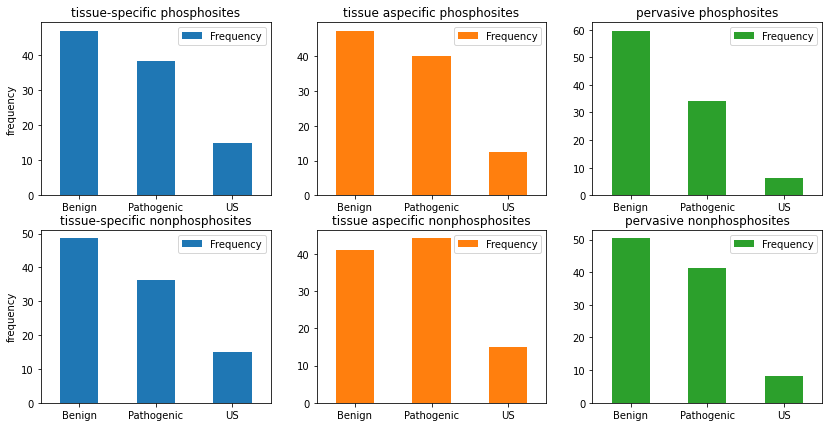

In [183]:
fig,ax = plt.subplots(2,3)

tspec_sites_Psites_plotcons.plot(ax = ax[0,0], kind = 'bar', x="Category", xlabel="", ylabel = 'frequency', figsize=(14, 7), rot=0).set_title("tissue-specific phosphosites")
taspec_sites_Psites_plotcons.plot(ax = ax[0,1], kind = 'bar', x="Category", xlabel="", figsize=(14, 7), rot=0, color=["tab:orange"]).set_title("tissue aspecific phosphosites")
gen_sites_Psites_plotcons.plot(ax = ax[0,2], kind = 'bar', x="Category", xlabel="", figsize=(14, 7), rot=0, color=["tab:green"]).set_title("pervasive phosphosites")
tspec_sites_nonPsites_plotcons.plot(ax = ax[1,0], kind = 'bar', x="Category", xlabel="", ylabel = 'frequency', figsize=(14, 7), rot=0).set_title("tissue-specific nonphosphosites")
taspec_sites_nonPsites_plotcons.plot(ax = ax[1,1], kind = 'bar', x="Category", xlabel="", figsize=(14, 7), rot=0, color=["tab:orange"]).set_title("tissue aspecific nonphosphosites")
gen_sites_nonPsites_plotcons.plot(ax = ax[1,2], kind = 'bar', x="Category", xlabel="", figsize=(14, 7), rot=0, color=["tab:green"]).set_title("pervasive nonphosphosites")


#plt.savefig("Comparison of frequency of annot.png", format="png", bbox_inches="tight")
plt.show()

In [184]:
print("tspec_sites mutated Psite region, per residue")
print(tspec_sites_Psites.shape[0])
print(tspec_sites_Psites[tspec_sites_Psites["modres_S"]==1]["Annotation"].value_counts())
print(tspec_sites_Psites[tspec_sites_Psites["modres_T"]==1]["Annotation"].value_counts())
print(tspec_sites_Psites[tspec_sites_Psites["modres_Y"]==1]["Annotation"].value_counts())
print("taspec_sites mutated Psite region")
print(taspec_sites_Psites.shape[0])
print(taspec_sites_Psites[taspec_sites_Psites["modres_S"]==1]["Annotation"].value_counts())
print(taspec_sites_Psites[taspec_sites_Psites["modres_T"]==1]["Annotation"].value_counts())
print(taspec_sites_Psites[taspec_sites_Psites["modres_Y"]==1]["Annotation"].value_counts())
print("pervasively_sites mutated Psite region")
print(gen_sites_Psites.shape[0])
print(gen_sites_Psites[gen_sites_Psites["modres_S"]==1]["Annotation"].value_counts())
print(gen_sites_Psites[gen_sites_Psites["modres_T"]==1]["Annotation"].value_counts())
print(gen_sites_Psites[gen_sites_Psites["modres_Y"]==1]["Annotation"].value_counts())

print("tspec_sites mutated nonPsite region")
print(tspec_sites_nonPsites.shape[0])
print(tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="S"]["Annotation"].value_counts())
print(tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="T"]["Annotation"].value_counts())
print(tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="Y"]["Annotation"].value_counts())
print("taspec_sites mutated nonPsite region")
print(taspec_sites_nonPsites.shape[0])
print(taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="S"]["Annotation"].value_counts())
print(taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="T"]["Annotation"].value_counts())
print(taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="Y"]["Annotation"].value_counts())
print("pervasively_sites mutated nonPsite region")
print(gen_sites_nonPsites.shape[0])
print(gen_sites_nonPsites[gen_sites_nonPsites["res"]=="S"]["Annotation"].value_counts())
print(gen_sites_nonPsites[gen_sites_nonPsites["res"]=="T"]["Annotation"].value_counts())
print(gen_sites_nonPsites[gen_sites_nonPsites["res"]=="Y"]["Annotation"].value_counts())

tspec_sites mutated Psite region, per residue
1261
(likely) Benign         363
(likely) Pathogenic     281
Unknown significance    127
Name: Annotation, dtype: int64
(likely) Benign         153
(likely) Pathogenic     138
Unknown significance     55
Name: Annotation, dtype: int64
(likely) Benign         76
(likely) Pathogenic     63
Unknown significance     5
Name: Annotation, dtype: int64
taspec_sites mutated Psite region
609
(likely) Benign         173
(likely) Pathogenic      88
Unknown significance     61
Name: Annotation, dtype: int64
(likely) Pathogenic     102
(likely) Benign          75
Unknown significance     11
Name: Annotation, dtype: int64
(likely) Pathogenic     54
(likely) Benign         41
Unknown significance     4
Name: Annotation, dtype: int64
pervasively_sites mutated Psite region
459
(likely) Benign         165
(likely) Pathogenic     110
Unknown significance     19
Name: Annotation, dtype: int64
(likely) Benign         87
(likely) Pathogenic     35
Unknown signifi

In [185]:
print("tspec_sites mutated Psite region, per residue")
print(tspec_sites_Psites.shape[0])
print(tspec_sites_Psites[tspec_sites_Psites["modres_S"]==1]["Annotation"].value_counts()[0]*100/tspec_sites_Psites[tspec_sites_Psites["modres_S"]==1].shape[0])
print(tspec_sites_Psites[tspec_sites_Psites["modres_S"]==1]["Annotation"].value_counts()[1]*100/tspec_sites_Psites[tspec_sites_Psites["modres_S"]==1].shape[0])
print(tspec_sites_Psites[tspec_sites_Psites["modres_S"]==1]["Annotation"].value_counts()[2]*100/tspec_sites_Psites[tspec_sites_Psites["modres_S"]==1].shape[0])

print(tspec_sites_Psites[tspec_sites_Psites["modres_T"]==1]["Annotation"].value_counts()[0]*100/tspec_sites_Psites[tspec_sites_Psites["modres_T"]==1].shape[0])
print(tspec_sites_Psites[tspec_sites_Psites["modres_T"]==1]["Annotation"].value_counts()[1]*100/tspec_sites_Psites[tspec_sites_Psites["modres_T"]==1].shape[0])
print(tspec_sites_Psites[tspec_sites_Psites["modres_T"]==1]["Annotation"].value_counts()[2]*100/tspec_sites_Psites[tspec_sites_Psites["modres_T"]==1].shape[0])

print(tspec_sites_Psites[tspec_sites_Psites["modres_Y"]==1]["Annotation"].value_counts()[1]*100/tspec_sites_Psites[tspec_sites_Psites["modres_Y"]==1].shape[0])
print(tspec_sites_Psites[tspec_sites_Psites["modres_Y"]==1]["Annotation"].value_counts()[0]*100/tspec_sites_Psites[tspec_sites_Psites["modres_Y"]==1].shape[0])
print(tspec_sites_Psites[tspec_sites_Psites["modres_Y"]==1]["Annotation"].value_counts()[2]*100/tspec_sites_Psites[tspec_sites_Psites["modres_Y"]==1].shape[0])


print("taspec_sites mutated Psite region")

print(taspec_sites_Psites[taspec_sites_Psites["modres_S"]==1]["Annotation"].value_counts()[0]*100/taspec_sites_Psites[taspec_sites_Psites["modres_S"]==1].shape[0])
print(taspec_sites_Psites[taspec_sites_Psites["modres_S"]==1]["Annotation"].value_counts()[1]*100/taspec_sites_Psites[taspec_sites_Psites["modres_S"]==1].shape[0])
print(taspec_sites_Psites[taspec_sites_Psites["modres_S"]==1]["Annotation"].value_counts()[2]*100/taspec_sites_Psites[taspec_sites_Psites["modres_S"]==1].shape[0])

print(taspec_sites_Psites[taspec_sites_Psites["modres_T"]==1]["Annotation"].value_counts()[1]*100/taspec_sites_Psites[taspec_sites_Psites["modres_T"]==1].shape[0])
print(taspec_sites_Psites[taspec_sites_Psites["modres_T"]==1]["Annotation"].value_counts()[0]*100/taspec_sites_Psites[taspec_sites_Psites["modres_T"]==1].shape[0])
print(taspec_sites_Psites[taspec_sites_Psites["modres_T"]==1]["Annotation"].value_counts()[2]*100/taspec_sites_Psites[taspec_sites_Psites["modres_T"]==1].shape[0])

print(taspec_sites_Psites[taspec_sites_Psites["modres_Y"]==1]["Annotation"].value_counts()[1]*100/taspec_sites_Psites[taspec_sites_Psites["modres_Y"]==1].shape[0])
print(taspec_sites_Psites[taspec_sites_Psites["modres_Y"]==1]["Annotation"].value_counts()[0]*100/taspec_sites_Psites[taspec_sites_Psites["modres_Y"]==1].shape[0])
print(taspec_sites_Psites[taspec_sites_Psites["modres_Y"]==1]["Annotation"].value_counts()[2]*100/taspec_sites_Psites[taspec_sites_Psites["modres_Y"]==1].shape[0])

print("pervasively_sites mutated Psite region")
print(gen_sites_Psites.shape[0])
print(gen_sites_Psites[gen_sites_Psites["modres_S"]==1]["Annotation"].value_counts()[0]*100/gen_sites_Psites[gen_sites_Psites["modres_S"]==1].shape[0])
print(gen_sites_Psites[gen_sites_Psites["modres_S"]==1]["Annotation"].value_counts()[1]*100/gen_sites_Psites[gen_sites_Psites["modres_S"]==1].shape[0])
print(gen_sites_Psites[gen_sites_Psites["modres_S"]==1]["Annotation"].value_counts()[2]*100/gen_sites_Psites[gen_sites_Psites["modres_S"]==1].shape[0])

print(gen_sites_Psites[gen_sites_Psites["modres_T"]==1]["Annotation"].value_counts()[0]*100/gen_sites_Psites[gen_sites_Psites["modres_T"]==1].shape[0])
print(gen_sites_Psites[gen_sites_Psites["modres_T"]==1]["Annotation"].value_counts()[1]*100/gen_sites_Psites[gen_sites_Psites["modres_T"]==1].shape[0])
print(gen_sites_Psites[gen_sites_Psites["modres_T"]==1]["Annotation"].value_counts()[2]*100/gen_sites_Psites[gen_sites_Psites["modres_T"]==1].shape[0])

print(gen_sites_Psites[gen_sites_Psites["modres_Y"]==1]["Annotation"].value_counts()[0]*100/gen_sites_Psites[gen_sites_Psites["modres_Y"]==1].shape[0])
print(gen_sites_Psites[gen_sites_Psites["modres_Y"]==1]["Annotation"].value_counts()[1]*100/gen_sites_Psites[gen_sites_Psites["modres_Y"]==1].shape[0])
print(gen_sites_Psites[gen_sites_Psites["modres_Y"]==1]["Annotation"].value_counts()[2]*100/gen_sites_Psites[gen_sites_Psites["modres_Y"]==1].shape[0])



print("tspec_sites mutated nonPsite region, per residue")
print(tspec_sites_nonPsites.shape[0])
print(tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="S"]["Annotation"].value_counts()[0]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="S"].shape[0])
print(tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="S"]["Annotation"].value_counts()[1]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="S"].shape[0])
print(tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="S"]["Annotation"].value_counts()[2]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="S"].shape[0])

print(tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="T"]["Annotation"].value_counts()[1]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="T"].shape[0])
print(tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="T"]["Annotation"].value_counts()[0]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="T"].shape[0])
print(tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="T"]["Annotation"].value_counts()[2]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="T"].shape[0])

print(tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="Y"]["Annotation"].value_counts()[1]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="Y"].shape[0])
print(tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="Y"]["Annotation"].value_counts()[0]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="Y"].shape[0])
print(tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="Y"]["Annotation"].value_counts()[2]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="Y"].shape[0])


print("taspec_sites mutated nonPsite region")

print(taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="S"]["Annotation"].value_counts()[0]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="S"].shape[0])
print(taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="S"]["Annotation"].value_counts()[1]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="S"].shape[0])
print(taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="S"]["Annotation"].value_counts()[2]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="S"].shape[0])

print(taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="T"]["Annotation"].value_counts()[1]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="T"].shape[0])
print(taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="T"]["Annotation"].value_counts()[0]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="T"].shape[0])
print(taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="T"]["Annotation"].value_counts()[2]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="T"].shape[0])

print(taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="Y"]["Annotation"].value_counts()[1]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="Y"].shape[0])
print(taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="Y"]["Annotation"].value_counts()[0]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="Y"].shape[0])
print(taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="Y"]["Annotation"].value_counts()[2]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="Y"].shape[0])

print("pervasively_sites mutated nonPsite region")
print(gen_sites_nonPsites.shape[0])
print(gen_sites_nonPsites[gen_sites_nonPsites["res"]=="S"]["Annotation"].value_counts()[0]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="S"].shape[0])
print(gen_sites_nonPsites[gen_sites_nonPsites["res"]=="S"]["Annotation"].value_counts()[1]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="S"].shape[0])
print(gen_sites_nonPsites[gen_sites_nonPsites["res"]=="S"]["Annotation"].value_counts()[2]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="S"].shape[0])

print(gen_sites_nonPsites[gen_sites_nonPsites["res"]=="T"]["Annotation"].value_counts()[1]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="T"].shape[0])
print(gen_sites_nonPsites[gen_sites_nonPsites["res"]=="T"]["Annotation"].value_counts()[0]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="T"].shape[0])
print(gen_sites_nonPsites[gen_sites_nonPsites["res"]=="T"]["Annotation"].value_counts()[2]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="T"].shape[0])

print(gen_sites_nonPsites[gen_sites_nonPsites["res"]=="Y"]["Annotation"].value_counts()[1]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="Y"].shape[0])
print(gen_sites_nonPsites[gen_sites_nonPsites["res"]=="Y"]["Annotation"].value_counts()[0]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="Y"].shape[0])
print(gen_sites_nonPsites[gen_sites_nonPsites["res"]=="Y"]["Annotation"].value_counts()[2]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="Y"].shape[0])

tspec_sites mutated Psite region, per residue
1261
47.08171206225681
36.4461738002594
16.472114137483786
44.21965317919075
39.884393063583815
15.895953757225433
43.75
52.77777777777778
3.4722222222222223
taspec_sites mutated Psite region
53.72670807453416
27.32919254658385
18.944099378881987
39.8936170212766
54.255319148936174
5.851063829787234
41.41414141414141
54.54545454545455
4.040404040404041
pervasively_sites mutated Psite region
459
56.12244897959184
37.414965986394556
6.462585034013605
67.44186046511628
27.131782945736433
5.426356589147287
61.111111111111114
33.333333333333336
5.555555555555555
tspec_sites mutated nonPsite region, per residue
3895
51.901669758812616
30.009276437847866
18.089053803339517
42.565845369583684
45.02973661852167
12.404418011894647
43.77224199288256
47.50889679715303
8.718861209964412
taspec_sites mutated nonPsite region
43.179587831207066
39.54857703631011
17.271835132482828
40.47244094488189
45.354330708661415
14.173228346456693
30.612244897959183
6

In [186]:
list_consequences = ["B", "P", "US"]

tspec_Psites_both = pd.DataFrame({"consequence": list_consequences})
tspec_Psites_both["all"] = [tspec_sites_Psites["Variant category"].value_counts()[0]*100/tspec_sites_Psites.shape[0],
                                          tspec_sites_Psites["Variant category"].value_counts()[1]*100/tspec_sites_Psites.shape[0],
                                          tspec_sites_Psites["Variant category"].value_counts()[2]*100/tspec_sites_Psites.shape[0]]
tspec_Psites_both["S"] = [tspec_sites_Psites[tspec_sites_Psites["modres_S"]==1]["Annotation"].value_counts()[0]*100/tspec_sites_Psites[tspec_sites_Psites["modres_S"]==1].shape[0],
                          tspec_sites_Psites[tspec_sites_Psites["modres_S"]==1]["Annotation"].value_counts()[1]*100/tspec_sites_Psites[tspec_sites_Psites["modres_S"]==1].shape[0],
                          tspec_sites_Psites[tspec_sites_Psites["modres_S"]==1]["Annotation"].value_counts()[2]*100/tspec_sites_Psites[tspec_sites_Psites["modres_S"]==1].shape[0]]

tspec_Psites_both["T"] = [tspec_sites_Psites[tspec_sites_Psites["modres_T"]==1]["Annotation"].value_counts()[0]*100/tspec_sites_Psites[tspec_sites_Psites["modres_T"]==1].shape[0],
                          tspec_sites_Psites[tspec_sites_Psites["modres_T"]==1]["Annotation"].value_counts()[1]*100/tspec_sites_Psites[tspec_sites_Psites["modres_T"]==1].shape[0],
                          tspec_sites_Psites[tspec_sites_Psites["modres_T"]==1]["Annotation"].value_counts()[2]*100/tspec_sites_Psites[tspec_sites_Psites["modres_T"]==1].shape[0]]

tspec_Psites_both["Y"] = [tspec_sites_Psites[tspec_sites_Psites["modres_Y"]==1]["Annotation"].value_counts()[0]*100/tspec_sites_Psites[tspec_sites_Psites["modres_Y"]==1].shape[0],
                          tspec_sites_Psites[tspec_sites_Psites["modres_Y"]==1]["Annotation"].value_counts()[1]*100/tspec_sites_Psites[tspec_sites_Psites["modres_Y"]==1].shape[0],
                          tspec_sites_Psites[tspec_sites_Psites["modres_Y"]==1]["Annotation"].value_counts()[2]*100/tspec_sites_Psites[tspec_sites_Psites["modres_Y"]==1].shape[0]]

taspec_Psites_both = pd.DataFrame({"consequence": list_consequences})
taspec_Psites_both["all"] = [taspec_sites_Psites["Variant category"].value_counts()[0]*100/taspec_sites_Psites.shape[0],
                                          taspec_sites_Psites["Variant category"].value_counts()[1]*100/taspec_sites_Psites.shape[0],
                                          taspec_sites_Psites["Variant category"].value_counts()[2]*100/taspec_sites_Psites.shape[0]]
taspec_Psites_both["S"] = [taspec_sites_Psites[taspec_sites_Psites["modres_S"]==1]["Annotation"].value_counts()[0]*100/taspec_sites_Psites[taspec_sites_Psites["modres_S"]==1].shape[0],
                      taspec_sites_Psites[taspec_sites_Psites["modres_S"]==1]["Annotation"].value_counts()[1]*100/taspec_sites_Psites[taspec_sites_Psites["modres_S"]==1].shape[0],
                      taspec_sites_Psites[taspec_sites_Psites["modres_S"]==1]["Annotation"].value_counts()[2]*100/taspec_sites_Psites[taspec_sites_Psites["modres_S"]==1].shape[0]]

taspec_Psites_both["T"] = [taspec_sites_Psites[taspec_sites_Psites["modres_T"]==1]["Annotation"].value_counts()[1]*100/taspec_sites_Psites[taspec_sites_Psites["modres_T"]==1].shape[0],
                      taspec_sites_Psites[taspec_sites_Psites["modres_T"]==1]["Annotation"].value_counts()[0]*100/taspec_sites_Psites[taspec_sites_Psites["modres_T"]==1].shape[0],
                      taspec_sites_Psites[taspec_sites_Psites["modres_T"]==1]["Annotation"].value_counts()[2]*100/taspec_sites_Psites[taspec_sites_Psites["modres_T"]==1].shape[0]]

taspec_Psites_both["Y"] = [taspec_sites_Psites[taspec_sites_Psites["modres_Y"]==1]["Annotation"].value_counts()[1]*100/taspec_sites_Psites[taspec_sites_Psites["modres_Y"]==1].shape[0],
                      taspec_sites_Psites[taspec_sites_Psites["modres_Y"]==1]["Annotation"].value_counts()[0]*100/taspec_sites_Psites[taspec_sites_Psites["modres_Y"]==1].shape[0],
                      taspec_sites_Psites[taspec_sites_Psites["modres_Y"]==1]["Annotation"].value_counts()[2]*100/taspec_sites_Psites[taspec_sites_Psites["modres_Y"]==1].shape[0]]

pervasive_Psites_both = pd.DataFrame({"consequence": list_consequences})
pervasive_Psites_both["all"] = [gen_sites_Psites["Variant category"].value_counts()[0]*100/gen_sites_Psites.shape[0],
                                          gen_sites_Psites["Variant category"].value_counts()[1]*100/gen_sites_Psites.shape[0],
                                          gen_sites_Psites["Variant category"].value_counts()[2]*100/gen_sites_Psites.shape[0]]
pervasive_Psites_both["S"] = [gen_sites_Psites[gen_sites_Psites["modres_S"]==1]["Annotation"].value_counts()[0]*100/gen_sites_Psites[gen_sites_Psites["modres_S"]==1].shape[0],
                              gen_sites_Psites[gen_sites_Psites["modres_S"]==1]["Annotation"].value_counts()[1]*100/gen_sites_Psites[gen_sites_Psites["modres_S"]==1].shape[0],
                              gen_sites_Psites[gen_sites_Psites["modres_S"]==1]["Annotation"].value_counts()[2]*100/gen_sites_Psites[gen_sites_Psites["modres_S"]==1].shape[0]]

pervasive_Psites_both["T"] = [gen_sites_Psites[gen_sites_Psites["modres_T"]==1]["Annotation"].value_counts()[0]*100/gen_sites_Psites[gen_sites_Psites["modres_T"]==1].shape[0],
                              gen_sites_Psites[gen_sites_Psites["modres_T"]==1]["Annotation"].value_counts()[1]*100/gen_sites_Psites[gen_sites_Psites["modres_T"]==1].shape[0],
                              gen_sites_Psites[gen_sites_Psites["modres_T"]==1]["Annotation"].value_counts()[2]*100/gen_sites_Psites[gen_sites_Psites["modres_T"]==1].shape[0]]

pervasive_Psites_both["Y"] = [gen_sites_Psites[gen_sites_Psites["modres_Y"]==1]["Annotation"].value_counts()[0]*100/gen_sites_Psites[gen_sites_Psites["modres_Y"]==1].shape[0],
                              gen_sites_Psites[gen_sites_Psites["modres_Y"]==1]["Annotation"].value_counts()[1]*100/gen_sites_Psites[gen_sites_Psites["modres_Y"]==1].shape[0],
                              gen_sites_Psites[gen_sites_Psites["modres_Y"]==1]["Annotation"].value_counts()[2]*100/gen_sites_Psites[gen_sites_Psites["modres_Y"]==1].shape[0]]
pervasive_Psites_both

,consequence,all,S,T,Y
0,B,59.694989,56.122449,67.441860,61.111111
1,P,34.204793,37.414966,27.131783,33.333333
2,US,6.100218,6.462585,5.426357,5.555556


In [187]:
tspec_nonPsites_both = pd.DataFrame({"consequence": list_consequences})
tspec_nonPsites_both["all"] = [tspec_sites_nonPsites["Variant category"].value_counts()[0]*100/tspec_sites_nonPsites.shape[0],
                                          tspec_sites_nonPsites["Variant category"].value_counts()[1]*100/tspec_sites_nonPsites.shape[0],
                                          tspec_sites_nonPsites["Variant category"].value_counts()[2]*100/tspec_sites_nonPsites.shape[0]]
tspec_nonPsites_both["S"] = [tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="S"]["Annotation"].value_counts()[0]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="S"].shape[0],
                             tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="S"]["Annotation"].value_counts()[1]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="S"].shape[0],
                             tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="S"]["Annotation"].value_counts()[2]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="S"].shape[0]]

tspec_nonPsites_both["T"] = [tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="T"]["Annotation"].value_counts()[0]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="T"].shape[0],
                             tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="T"]["Annotation"].value_counts()[1]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="T"].shape[0],
                             tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="T"]["Annotation"].value_counts()[2]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="T"].shape[0]]

tspec_nonPsites_both["Y"] = [tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="Y"]["Annotation"].value_counts()[1]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="Y"].shape[0],
                             tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="Y"]["Annotation"].value_counts()[0]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="Y"].shape[0],
                             tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="Y"]["Annotation"].value_counts()[2]*100/tspec_sites_nonPsites[tspec_sites_nonPsites["res"]=="Y"].shape[0]]

taspec_nonPsites_both = pd.DataFrame({"consequence": list_consequences})
taspec_nonPsites_both["all"] = [taspec_sites_nonPsites["Variant category"].value_counts()[1]*100/taspec_sites_nonPsites.shape[0],
                                          taspec_sites_nonPsites["Variant category"].value_counts()[0]*100/taspec_sites_nonPsites.shape[0],
                                          taspec_sites_nonPsites["Variant category"].value_counts()[2]*100/taspec_sites_nonPsites.shape[0]]

taspec_nonPsites_both["S"] = [taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="S"]["Annotation"].value_counts()[0]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="S"].shape[0],
                              taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="S"]["Annotation"].value_counts()[1]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="S"].shape[0],
                              taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="S"]["Annotation"].value_counts()[2]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="S"].shape[0]]

taspec_nonPsites_both["T"] = [taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="T"]["Annotation"].value_counts()[1]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="T"].shape[0],
                              taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="T"]["Annotation"].value_counts()[0]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="T"].shape[0],
                              taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="T"]["Annotation"].value_counts()[2]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="T"].shape[0]]

taspec_nonPsites_both["Y"] = [taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="Y"]["Annotation"].value_counts()[1]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="Y"].shape[0],
                              taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="Y"]["Annotation"].value_counts()[0]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="Y"].shape[0],
                              taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="Y"]["Annotation"].value_counts()[2]*100/taspec_sites_nonPsites[taspec_sites_nonPsites["res"]=="Y"].shape[0]]

pervasive_nonPsites_both = pd.DataFrame({"consequence": list_consequences})
pervasive_nonPsites_both["all"] = [gen_sites_nonPsites["Variant category"].value_counts()[0]*100/gen_sites_nonPsites.shape[0],
                                          gen_sites_nonPsites["Variant category"].value_counts()[1]*100/gen_sites_nonPsites.shape[0],
                                          gen_sites_nonPsites["Variant category"].value_counts()[2]*100/gen_sites_nonPsites.shape[0]]

pervasive_nonPsites_both["S"] = [gen_sites_nonPsites[gen_sites_nonPsites["res"]=="S"]["Annotation"].value_counts()[0]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="S"].shape[0],
                                 gen_sites_nonPsites[gen_sites_nonPsites["res"]=="S"]["Annotation"].value_counts()[1]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="S"].shape[0],
                                 gen_sites_nonPsites[gen_sites_nonPsites["res"]=="S"]["Annotation"].value_counts()[2]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="S"].shape[0]]

pervasive_nonPsites_both["T"] = [gen_sites_nonPsites[gen_sites_nonPsites["res"]=="T"]["Annotation"].value_counts()[1]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="T"].shape[0],
                                 gen_sites_nonPsites[gen_sites_nonPsites["res"]=="T"]["Annotation"].value_counts()[0]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="T"].shape[0],
                                 gen_sites_nonPsites[gen_sites_nonPsites["res"]=="T"]["Annotation"].value_counts()[2]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="T"].shape[0]]

pervasive_nonPsites_both["Y"] = [gen_sites_nonPsites[gen_sites_nonPsites["res"]=="Y"]["Annotation"].value_counts()[1]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="Y"].shape[0],
                                 gen_sites_nonPsites[gen_sites_nonPsites["res"]=="Y"]["Annotation"].value_counts()[0]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="Y"].shape[0],
                                 gen_sites_nonPsites[gen_sites_nonPsites["res"]=="Y"]["Annotation"].value_counts()[2]*100/gen_sites_nonPsites[gen_sites_nonPsites["res"]=="Y"].shape[0]]

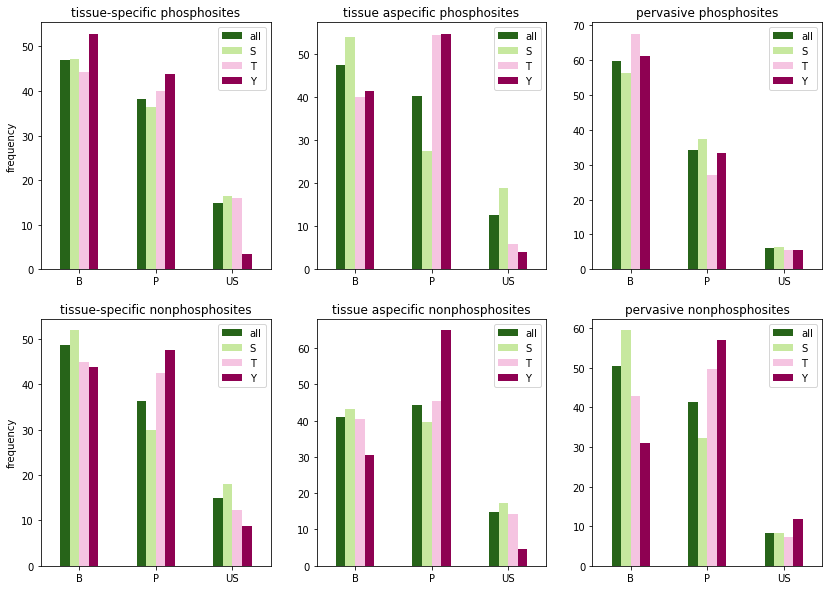

In [188]:
fig,ax = plt.subplots(2,3)

tspec_Psites_both.plot(ax = ax[0,0], kind = 'bar', x="consequence", xlabel="", ylabel = 'frequency', figsize=(14, 10), rot=0, colormap="PiYG_r").set_title("tissue-specific phosphosites")
taspec_Psites_both.plot(ax = ax[0,1], kind = 'bar', x="consequence", xlabel="", figsize=(14, 10), rot=0, colormap="PiYG_r").set_title("tissue aspecific phosphosites")
pervasive_Psites_both.plot(ax = ax[0,2], kind = 'bar', x="consequence", xlabel="", figsize=(14, 10), rot=0, colormap="PiYG_r").set_title("pervasive phosphosites")
tspec_nonPsites_both.plot(ax = ax[1,0], kind = 'bar', x="consequence", xlabel="", ylabel = 'frequency', figsize=(14, 10), rot=0, colormap="PiYG_r").set_title("tissue-specific nonphosphosites")
taspec_nonPsites_both.plot(ax = ax[1,1], kind = 'bar', x="consequence", xlabel="", figsize=(14, 10), rot=0, colormap="PiYG_r").set_title("tissue aspecific nonphosphosites")
pervasive_nonPsites_both.plot(ax = ax[1,2], kind = 'bar', x="consequence", xlabel="", figsize=(14, 10), rot=0, colormap="PiYG_r").set_title("pervasive nonphosphosites")


#plt.savefig("Humsavar_comparison STY-annot.png", format="png", bbox_inches="tight")
plt.show()